In [1]:
# All Includes

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  # Version 1.0.0 (some previous versions are used in past commits)
from sklearn import metrics

import os

In [2]:
# Useful Constants

# Those are separate normalised input features for the neural network
INPUT_SIGNAL_TYPES = [
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    "10",
    "11",
    "12",
    "13",
    "14",
    "15",
    "16",
    "17",
    "18",
    "19",
    "20",
    "21",
    "22",
    "23",
    "24",
    "25",
    "26",
    "27",
    "28",
    "29",
    "30",
    "31",
    "32",
    "33",
    "34",
    "35",
    "36",
    "37",
    "38",
    "39",
    "40",
    "41"
]

# Output classes to learn how to classify
LABELS = [
    "add", 
    "bill", 
    "bit", 
    "coffee", 
    "cup", 
    "drinks",
    "eat",
    "give",
    "good",
    "greentea",
    "half",
    "hot",
    "howmany",
    "ice",
    "me",
    "menu",
    "money",
    "no",
    "one",
    "straw",
    "sugar",
    "szcancel",
    "thanks",
    "think",
    "toilet",
    "waiter",
    "want",
    "where",
    "you",
    "zstart",
    "0",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
    "10",
    "20",
    "30",
    "40",
    "50",
    "60",
    "70",
    "80",
    "90",
    "100",
    "liquor", #酒
    "wine",
    "tapwater", #自来水
    "milk",
    "hotchocolate",
    "juice",
    "beer",
    "coke",
    "whitetea",
    "mineralwater",
    "redwine",
    "blacktea",
    "total",
    "napkin",
    "this",
    "breakfast",
    "goodbye",
    "have",
    "tip",
    "like",
    "lunch",
    "wei", #位
    "dinner",
    "recommend",
    "spoon",
    "what",
    "person",
    "please",
    "take",
    "without",
    "look",
    "or",
    "welcome",
    "and",
    "drink",
    "sorry",
    "tableware", #餐具
    "glass",
    "help",
    "1oclock",
    "2oclock",
    "3oclock",
    "4oclock",
    "5oclock",
    "6oclock",
    "7oclock",
    "8oclock",
    "9oclock",
    "10oclock",
    "11oclock",
    "12oclock",
    "reservation"
] 


## Let's start by downloading the data: 

## Preparing dataset:

In [3]:
TRAIN = "train/"
TEST = "test/"
DATASET_PATH = "data/Dataset_1_2_1/"


# Load "X" (the neural network's training and testing inputs)

def load_X(X_signals_paths):
    X_signals = []
    
    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        
        print(signal_type_path)
        
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()
    
    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
    DATASET_PATH + TRAIN + "Inertial Signals/" + signal + ".txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    DATASET_PATH + TEST + "Inertial Signals/" + signal + ".txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]], 
        dtype=np.int32
    )
    file.close()
    
    # Substract 1 to each output class for friendly 0-based indexing 
    return y_ - 1

y_train_path = DATASET_PATH + TRAIN + "y_train.txt"
y_test_path = DATASET_PATH + TEST + "y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)


data/Dataset_1_2_1/train/Inertial Signals/0.txt
data/Dataset_1_2_1/train/Inertial Signals/1.txt
data/Dataset_1_2_1/train/Inertial Signals/2.txt
data/Dataset_1_2_1/train/Inertial Signals/3.txt
data/Dataset_1_2_1/train/Inertial Signals/4.txt
data/Dataset_1_2_1/train/Inertial Signals/5.txt
data/Dataset_1_2_1/train/Inertial Signals/6.txt
data/Dataset_1_2_1/train/Inertial Signals/7.txt
data/Dataset_1_2_1/train/Inertial Signals/8.txt
data/Dataset_1_2_1/train/Inertial Signals/9.txt
data/Dataset_1_2_1/train/Inertial Signals/10.txt
data/Dataset_1_2_1/train/Inertial Signals/11.txt
data/Dataset_1_2_1/train/Inertial Signals/12.txt
data/Dataset_1_2_1/train/Inertial Signals/13.txt
data/Dataset_1_2_1/train/Inertial Signals/14.txt
data/Dataset_1_2_1/train/Inertial Signals/15.txt
data/Dataset_1_2_1/train/Inertial Signals/16.txt
data/Dataset_1_2_1/train/Inertial Signals/17.txt
data/Dataset_1_2_1/train/Inertial Signals/18.txt
data/Dataset_1_2_1/train/Inertial Signals/19.txt
data/Dataset_1_2_1/train/Inert

## Additionnal Parameters:

Here are some core parameter definitions for the training. 

For example, the whole neural network's structure could be summarised by enumerating those parameters and the fact that two LSTM are used one on top of another (stacked) output-to-input as hidden layers through time steps. 

In [4]:
# Input Data 

training_data_count = len(X_train)  # 7352 training series (with 50% overlap between each serie)
test_data_count = len(X_test)  # 2947 testing series
n_steps = len(X_train[0])  # 128 timesteps per series
n_input = len(X_train[0][0])  # 9 input parameters per timestep


# LSTM Neural Network's internal structure

n_hidden = 64 # Hidden layer num of features
n_classes = 101 # Total classes (should go up, or should go down)


# Training 

learning_rate = 0.00001
lambda_loss_amount = 0.001
training_iters = training_data_count * 2500 # Loop 300 times on the dataset
batch_size = 1500
display_iter = 1000  # To show test set accuracy during training


# Some debugging info

print("Some useful info to get an insight on dataset's shape and normalisation:")
print("(X shape, y shape, every X's mean, every X's standard deviation)")
print(X_test.shape, y_test.shape, np.mean(X_test), np.std(X_test))
print("The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.")


Some useful info to get an insight on dataset's shape and normalisation:
(X shape, y shape, every X's mean, every X's standard deviation)
(3358, 128, 42) (3358, 1) -5.095609 50.289627
The dataset is therefore properly normalised, as expected, but not yet one-hot encoded.


## Utility functions for training:

In [5]:
def LSTM_RNN(_X, _weights, _biases):
    # Function returns a tensorflow LSTM (RNN) artificial neural network from given parameters. 
    # Moreover, two LSTM cells are stacked which adds deepness to the neural network. 
    # Note, some code of this notebook is inspired from an slightly different 
    # RNN architecture used on another dataset, some of the credits goes to 
    # "aymericdamien" under the MIT license.

    # (NOTE: This step could be greatly optimised by shaping the dataset once
    # input shape: (batch_size, n_steps, n_input)
    _X = tf.transpose(_X, [1, 0, 2])  # permute n_steps and batch_size
    # Reshape to prepare input to hidden activation
    _X = tf.reshape(_X, [-1, n_input]) 
    # new shape: (n_steps*batch_size, n_input)
    
    # ReLU activation, thanks to Yu Zhao for adding this improvement here:
    _X = tf.nn.relu(tf.matmul(_X, _weights['hidden']) + _biases['hidden'])
    # Split data because rnn cell needs a list of inputs for the RNN inner loop
    _X = tf.split(_X, n_steps, 0) 
    # new shape: n_steps * (batch_size, n_hidden)

    # Define two stacked LSTM cells (two recurrent layers deep) with tensorflow
    lstm_cell_1 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cell_2 = tf.contrib.rnn.BasicLSTMCell(n_hidden, forget_bias=1.0, state_is_tuple=True)
    lstm_cells = tf.contrib.rnn.MultiRNNCell([lstm_cell_1, lstm_cell_2], state_is_tuple=True)
    # Get LSTM cell output
    outputs, states = tf.contrib.rnn.static_rnn(lstm_cells, _X, dtype=tf.float32)

    # Get last time step's output feature for a "many-to-one" style classifier, 
    # as in the image describing RNNs at the top of this page
    lstm_last_output = outputs[-1]
    
    # Linear activation
    return tf.matmul(lstm_last_output, _weights['out']) + _biases['out']


def extract_batch_size(_train, step, batch_size):
    # Function to fetch a "batch_size" amount of data from "(X|y)_train" data. 
    
    shape = list(_train.shape)
    shape[0] = batch_size
    batch_s = np.empty(shape)

    for i in range(batch_size):
        # Loop index
        index = ((step-1)*batch_size + i) % len(_train)
        batch_s[i] = _train[index] 

    return batch_s


def one_hot(y_, n_classes=n_classes):
    # Function to encode neural one-hot output labels from number indexes 
    # e.g.: 
    # one_hot(y_=[[5], [0], [3]], n_classes=6):
    #     return [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]
    
    y_ = y_.reshape(len(y_))
    return np.eye(n_classes)[np.array(y_, dtype=np.int32)]  # Returns FLOATS


## Let's get serious and build the neural network:

In [6]:

# Graph input/output
x = tf.placeholder(tf.float32, [None, n_steps, n_input],name='input_x')
y = tf.placeholder(tf.float32, [None, n_classes],name='inpu_y')

# Graph weights
weights = {
    'hidden': tf.Variable(tf.random_normal([n_input, n_hidden])), # Hidden layer weights
    'out': tf.Variable(tf.random_normal([n_hidden, n_classes], mean=1.0))
}
biases = {
    'hidden': tf.Variable(tf.random_normal([n_hidden])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

pred = LSTM_RNN(x, weights, biases)

# Loss, optimizer and evaluation
l2 = lambda_loss_amount * sum(
    tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables()
) # L2 loss prevents this overkill neural network to overfit the data
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=pred)) + l2 # Softmax loss
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) # Adam Optimizer

correct_pred = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Hooray, now train the neural network:

In [7]:
# To keep track of training's performance
test_losses = []
test_accuracies = []
train_losses = []
train_accuracies = []

# Launch the graph
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
init = tf.global_variables_initializer()
sess.run(init)

# Perform Training steps with "batch_size" amount of example data at each loop
step = 1
while step * batch_size <= training_iters:
    batch_xs =         extract_batch_size(X_train, step, batch_size)
    batch_ys = one_hot(extract_batch_size(y_train, step, batch_size))

    # Fit training using batch data
    _, loss, acc = sess.run(
        [optimizer, cost, accuracy],
        feed_dict={
            x: batch_xs, 
            y: batch_ys
        }
    )
    train_losses.append(loss)
    train_accuracies.append(acc)
    
    # Evaluate network only at some steps for faster training: 
    if (step*batch_size % display_iter == 0) or (step == 1) or (step * batch_size > training_iters):
        
        # To not spam console, show training accuracy/loss in this "if"
        print("Training iter #" + str(step*batch_size) + \
              ":   Batch Loss = " + "{:.6f}".format(loss) + \
              ", Accuracy = {}".format(acc))
        
        # Evaluation on the test set (no learning made here - just evaluation for diagnosis)
        loss, acc = sess.run(
            [cost, accuracy], 
            feed_dict={
                x: X_test,
                y: one_hot(y_test)
            }
        )
        test_losses.append(loss)
        test_accuracies.append(acc)
        print("PERFORMANCE ON TEST SET: " + \
              "Batch Loss = {}".format(loss) + \
              ", Accuracy = {}".format(acc))

    step += 1

print("Optimization Finished!")

# Accuracy for test data

one_hot_predictions, accuracy, final_loss = sess.run(
    [pred, accuracy, cost],
    feed_dict={
        x: X_test,
        y: one_hot(y_test)
    }
)

test_losses.append(final_loss)
test_accuracies.append(accuracy)

print("FINAL RESULT: " + \
      "Batch Loss = {}".format(final_loss) + \
      ", Accuracy = {}".format(accuracy))


Training iter #1500:   Batch Loss = 14.782017, Accuracy = 0.013333333656191826
PERFORMANCE ON TEST SET: Batch Loss = 14.77249526977539, Accuracy = 0.012507445178925991
Training iter #3000:   Batch Loss = 14.843967, Accuracy = 0.012000000104308128
PERFORMANCE ON TEST SET: Batch Loss = 14.767631530761719, Accuracy = 0.012507445178925991
Training iter #6000:   Batch Loss = 14.757189, Accuracy = 0.01733333244919777
PERFORMANCE ON TEST SET: Batch Loss = 14.75874137878418, Accuracy = 0.012507445178925991
Training iter #9000:   Batch Loss = 14.808714, Accuracy = 0.015333333052694798
PERFORMANCE ON TEST SET: Batch Loss = 14.750635147094727, Accuracy = 0.012507445178925991
Training iter #12000:   Batch Loss = 14.797735, Accuracy = 0.004000000189989805
PERFORMANCE ON TEST SET: Batch Loss = 14.742091178894043, Accuracy = 0.012507445178925991
Training iter #15000:   Batch Loss = 14.715063, Accuracy = 0.013333333656191826
PERFORMANCE ON TEST SET: Batch Loss = 14.733450889587402, Accuracy = 0.012507

Training iter #147000:   Batch Loss = 14.376858, Accuracy = 0.012666666880249977
PERFORMANCE ON TEST SET: Batch Loss = 14.433679580688477, Accuracy = 0.01697438955307007
Training iter #150000:   Batch Loss = 14.426044, Accuracy = 0.01066666655242443
PERFORMANCE ON TEST SET: Batch Loss = 14.427679061889648, Accuracy = 0.017272185534238815
Training iter #153000:   Batch Loss = 14.309346, Accuracy = 0.017999999225139618
PERFORMANCE ON TEST SET: Batch Loss = 14.421730041503906, Accuracy = 0.017272185534238815
Training iter #156000:   Batch Loss = 14.355025, Accuracy = 0.007333333138376474
PERFORMANCE ON TEST SET: Batch Loss = 14.415919303894043, Accuracy = 0.017569981515407562
Training iter #159000:   Batch Loss = 14.548758, Accuracy = 0.007333333138376474
PERFORMANCE ON TEST SET: Batch Loss = 14.410045623779297, Accuracy = 0.01786777935922146
Training iter #162000:   Batch Loss = 14.373463, Accuracy = 0.0273333340883255
PERFORMANCE ON TEST SET: Batch Loss = 14.403999328613281, Accuracy = 

Training iter #294000:   Batch Loss = 14.077900, Accuracy = 0.014666666276752949
PERFORMANCE ON TEST SET: Batch Loss = 14.171911239624023, Accuracy = 0.020845741033554077
Training iter #297000:   Batch Loss = 14.162217, Accuracy = 0.01133333332836628
PERFORMANCE ON TEST SET: Batch Loss = 14.166937828063965, Accuracy = 0.020845741033554077
Training iter #300000:   Batch Loss = 13.973831, Accuracy = 0.019999999552965164
PERFORMANCE ON TEST SET: Batch Loss = 14.162130355834961, Accuracy = 0.021143537014722824
Training iter #303000:   Batch Loss = 14.260658, Accuracy = 0.01733333244919777
PERFORMANCE ON TEST SET: Batch Loss = 14.157777786254883, Accuracy = 0.021143537014722824
Training iter #306000:   Batch Loss = 14.132139, Accuracy = 0.02199999988079071
PERFORMANCE ON TEST SET: Batch Loss = 14.153092384338379, Accuracy = 0.021143537014722824
Training iter #309000:   Batch Loss = 14.016766, Accuracy = 0.03799999877810478
PERFORMANCE ON TEST SET: Batch Loss = 14.148260116577148, Accuracy =

Training iter #441000:   Batch Loss = 13.789915, Accuracy = 0.04600000008940697
PERFORMANCE ON TEST SET: Batch Loss = 13.943159103393555, Accuracy = 0.02322811260819435
Training iter #444000:   Batch Loss = 13.832371, Accuracy = 0.03333333507180214
PERFORMANCE ON TEST SET: Batch Loss = 13.939069747924805, Accuracy = 0.02322811260819435
Training iter #447000:   Batch Loss = 13.892411, Accuracy = 0.018666666001081467
PERFORMANCE ON TEST SET: Batch Loss = 13.934985160827637, Accuracy = 0.02322811260819435
Training iter #450000:   Batch Loss = 14.078363, Accuracy = 0.02199999988079071
PERFORMANCE ON TEST SET: Batch Loss = 13.930371284484863, Accuracy = 0.02322811260819435
Training iter #453000:   Batch Loss = 13.909798, Accuracy = 0.02666666731238365
PERFORMANCE ON TEST SET: Batch Loss = 13.92624568939209, Accuracy = 0.02322811260819435
Training iter #456000:   Batch Loss = 13.762177, Accuracy = 0.02800000086426735
PERFORMANCE ON TEST SET: Batch Loss = 13.921817779541016, Accuracy = 0.0232

Training iter #588000:   Batch Loss = 13.656946, Accuracy = 0.03999999910593033
PERFORMANCE ON TEST SET: Batch Loss = 13.74167251586914, Accuracy = 0.027397260069847107
Training iter #591000:   Batch Loss = 13.685785, Accuracy = 0.04399999976158142
PERFORMANCE ON TEST SET: Batch Loss = 13.737854957580566, Accuracy = 0.027397260069847107
Training iter #594000:   Batch Loss = 13.753641, Accuracy = 0.015333333052694798
PERFORMANCE ON TEST SET: Batch Loss = 13.73404598236084, Accuracy = 0.027397260069847107
Training iter #597000:   Batch Loss = 13.703855, Accuracy = 0.017999999225139618
PERFORMANCE ON TEST SET: Batch Loss = 13.7301607131958, Accuracy = 0.027397260069847107
Training iter #600000:   Batch Loss = 13.582519, Accuracy = 0.03933333232998848
PERFORMANCE ON TEST SET: Batch Loss = 13.72643756866455, Accuracy = 0.027397260069847107
Training iter #603000:   Batch Loss = 13.522692, Accuracy = 0.02199999988079071
PERFORMANCE ON TEST SET: Batch Loss = 13.72259521484375, Accuracy = 0.027

Training iter #735000:   Batch Loss = 13.501670, Accuracy = 0.03999999910593033
PERFORMANCE ON TEST SET: Batch Loss = 13.563222885131836, Accuracy = 0.03186420351266861
Training iter #738000:   Batch Loss = 13.335213, Accuracy = 0.03933333232998848
PERFORMANCE ON TEST SET: Batch Loss = 13.559670448303223, Accuracy = 0.03186420351266861
Training iter #741000:   Batch Loss = 13.539690, Accuracy = 0.02666666731238365
PERFORMANCE ON TEST SET: Batch Loss = 13.556142807006836, Accuracy = 0.03186420351266861
Training iter #744000:   Batch Loss = 13.484793, Accuracy = 0.0273333340883255
PERFORMANCE ON TEST SET: Batch Loss = 13.55266284942627, Accuracy = 0.03186420351266861
Training iter #747000:   Batch Loss = 13.504732, Accuracy = 0.025333333760499954
PERFORMANCE ON TEST SET: Batch Loss = 13.54922866821289, Accuracy = 0.03186420351266861
Training iter #750000:   Batch Loss = 13.197315, Accuracy = 0.06866666674613953
PERFORMANCE ON TEST SET: Batch Loss = 13.54580307006836, Accuracy = 0.0321619

Training iter #882000:   Batch Loss = 13.278439, Accuracy = 0.03266666829586029
PERFORMANCE ON TEST SET: Batch Loss = 13.393027305603027, Accuracy = 0.037820130586624146
Training iter #885000:   Batch Loss = 13.153035, Accuracy = 0.030666666105389595
PERFORMANCE ON TEST SET: Batch Loss = 13.389694213867188, Accuracy = 0.037820130586624146
Training iter #888000:   Batch Loss = 13.301056, Accuracy = 0.035999998450279236
PERFORMANCE ON TEST SET: Batch Loss = 13.386260032653809, Accuracy = 0.0375223346054554
Training iter #891000:   Batch Loss = 13.306382, Accuracy = 0.023333333432674408
PERFORMANCE ON TEST SET: Batch Loss = 13.382835388183594, Accuracy = 0.037820130586624146
Training iter #894000:   Batch Loss = 13.562590, Accuracy = 0.03400000184774399
PERFORMANCE ON TEST SET: Batch Loss = 13.379554748535156, Accuracy = 0.037820130586624146
Training iter #897000:   Batch Loss = 13.166496, Accuracy = 0.07733333110809326
PERFORMANCE ON TEST SET: Batch Loss = 13.376333236694336, Accuracy = 

Training iter #1029000:   Batch Loss = 13.298625, Accuracy = 0.03133333474397659
PERFORMANCE ON TEST SET: Batch Loss = 13.238481521606445, Accuracy = 0.04377605766057968
Training iter #1032000:   Batch Loss = 12.885097, Accuracy = 0.0820000022649765
PERFORMANCE ON TEST SET: Batch Loss = 13.235605239868164, Accuracy = 0.044371649622917175
Training iter #1035000:   Batch Loss = 13.100892, Accuracy = 0.06466666609048843
PERFORMANCE ON TEST SET: Batch Loss = 13.232673645019531, Accuracy = 0.044371649622917175
Training iter #1038000:   Batch Loss = 13.184526, Accuracy = 0.03400000184774399
PERFORMANCE ON TEST SET: Batch Loss = 13.229673385620117, Accuracy = 0.044371649622917175
Training iter #1041000:   Batch Loss = 13.388087, Accuracy = 0.02666666731238365
PERFORMANCE ON TEST SET: Batch Loss = 13.226789474487305, Accuracy = 0.04466944560408592
Training iter #1044000:   Batch Loss = 13.157803, Accuracy = 0.052666667848825455
PERFORMANCE ON TEST SET: Batch Loss = 13.22391414642334, Accuracy 

Training iter #1176000:   Batch Loss = 13.374081, Accuracy = 0.03733333200216293
PERFORMANCE ON TEST SET: Batch Loss = 13.09721851348877, Accuracy = 0.053603336215019226
Training iter #1179000:   Batch Loss = 12.817909, Accuracy = 0.09466666728258133
PERFORMANCE ON TEST SET: Batch Loss = 13.094537734985352, Accuracy = 0.053603336215019226
Training iter #1182000:   Batch Loss = 12.741248, Accuracy = 0.09266666322946548
PERFORMANCE ON TEST SET: Batch Loss = 13.091879844665527, Accuracy = 0.053603336215019226
Training iter #1185000:   Batch Loss = 13.050682, Accuracy = 0.04533333331346512
PERFORMANCE ON TEST SET: Batch Loss = 13.088866233825684, Accuracy = 0.05390113219618797
Training iter #1188000:   Batch Loss = 13.106563, Accuracy = 0.02666666731238365
PERFORMANCE ON TEST SET: Batch Loss = 13.086081504821777, Accuracy = 0.05390113219618797
Training iter #1191000:   Batch Loss = 12.971450, Accuracy = 0.04066666588187218
PERFORMANCE ON TEST SET: Batch Loss = 13.083410263061523, Accuracy 

Training iter #1323000:   Batch Loss = 13.107225, Accuracy = 0.03400000184774399
PERFORMANCE ON TEST SET: Batch Loss = 12.967944145202637, Accuracy = 0.062239427119493484
Training iter #1326000:   Batch Loss = 12.881114, Accuracy = 0.06466666609048843
PERFORMANCE ON TEST SET: Batch Loss = 12.965314865112305, Accuracy = 0.06253722310066223
Training iter #1329000:   Batch Loss = 12.731508, Accuracy = 0.04933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 12.962690353393555, Accuracy = 0.06283502280712128
Training iter #1332000:   Batch Loss = 12.851210, Accuracy = 0.07066666334867477
PERFORMANCE ON TEST SET: Batch Loss = 12.959897994995117, Accuracy = 0.06283502280712128
Training iter #1335000:   Batch Loss = 12.960124, Accuracy = 0.03999999910593033
PERFORMANCE ON TEST SET: Batch Loss = 12.957002639770508, Accuracy = 0.06283502280712128
Training iter #1338000:   Batch Loss = 13.045839, Accuracy = 0.0560000017285347
PERFORMANCE ON TEST SET: Batch Loss = 12.95431900024414, Accuracy = 0

Training iter #1470000:   Batch Loss = 12.853609, Accuracy = 0.046666666865348816
PERFORMANCE ON TEST SET: Batch Loss = 12.841108322143555, Accuracy = 0.0699821338057518
Training iter #1473000:   Batch Loss = 12.787749, Accuracy = 0.06666667014360428
PERFORMANCE ON TEST SET: Batch Loss = 12.83868408203125, Accuracy = 0.0699821338057518
Training iter #1476000:   Batch Loss = 12.725461, Accuracy = 0.04533333331346512
PERFORMANCE ON TEST SET: Batch Loss = 12.83626651763916, Accuracy = 0.0705777257680893
Training iter #1479000:   Batch Loss = 12.621250, Accuracy = 0.13066667318344116
PERFORMANCE ON TEST SET: Batch Loss = 12.833744049072266, Accuracy = 0.0705777257680893
Training iter #1482000:   Batch Loss = 12.739216, Accuracy = 0.06666667014360428
PERFORMANCE ON TEST SET: Batch Loss = 12.831180572509766, Accuracy = 0.0705777257680893
Training iter #1485000:   Batch Loss = 13.054159, Accuracy = 0.052000001072883606
PERFORMANCE ON TEST SET: Batch Loss = 12.828727722167969, Accuracy = 0.070

Training iter #1617000:   Batch Loss = 12.746740, Accuracy = 0.06400000303983688
PERFORMANCE ON TEST SET: Batch Loss = 12.724004745483398, Accuracy = 0.07742703706026077
Training iter #1620000:   Batch Loss = 12.831650, Accuracy = 0.0846666693687439
PERFORMANCE ON TEST SET: Batch Loss = 12.721616744995117, Accuracy = 0.07742703706026077
Training iter #1623000:   Batch Loss = 12.533091, Accuracy = 0.10866666585206985
PERFORMANCE ON TEST SET: Batch Loss = 12.719346046447754, Accuracy = 0.07742703706026077
Training iter #1626000:   Batch Loss = 12.464268, Accuracy = 0.1393333375453949
PERFORMANCE ON TEST SET: Batch Loss = 12.716994285583496, Accuracy = 0.07742703706026077
Training iter #1629000:   Batch Loss = 12.625830, Accuracy = 0.0806666687130928
PERFORMANCE ON TEST SET: Batch Loss = 12.714599609375, Accuracy = 0.07742703706026077
Training iter #1632000:   Batch Loss = 12.839903, Accuracy = 0.05133333429694176
PERFORMANCE ON TEST SET: Batch Loss = 12.712181091308594, Accuracy = 0.0774

Training iter #1764000:   Batch Loss = 12.569157, Accuracy = 0.0793333351612091
PERFORMANCE ON TEST SET: Batch Loss = 12.613733291625977, Accuracy = 0.08487194776535034
Training iter #1767000:   Batch Loss = 12.882426, Accuracy = 0.06066666543483734
PERFORMANCE ON TEST SET: Batch Loss = 12.611544609069824, Accuracy = 0.08576533943414688
Training iter #1770000:   Batch Loss = 12.440523, Accuracy = 0.1120000034570694
PERFORMANCE ON TEST SET: Batch Loss = 12.609403610229492, Accuracy = 0.08606313169002533
Training iter #1773000:   Batch Loss = 12.250954, Accuracy = 0.10999999940395355
PERFORMANCE ON TEST SET: Batch Loss = 12.607183456420898, Accuracy = 0.08784990757703781
Training iter #1776000:   Batch Loss = 12.558516, Accuracy = 0.08133333176374435
PERFORMANCE ON TEST SET: Batch Loss = 12.604913711547852, Accuracy = 0.08814770728349686
Training iter #1779000:   Batch Loss = 12.618719, Accuracy = 0.07266666740179062
PERFORMANCE ON TEST SET: Batch Loss = 12.602673530578613, Accuracy = 0.

Training iter #1911000:   Batch Loss = 12.376822, Accuracy = 0.10000000149011612
PERFORMANCE ON TEST SET: Batch Loss = 12.505083084106445, Accuracy = 0.09380583465099335
Training iter #1914000:   Batch Loss = 12.555315, Accuracy = 0.07533333450555801
PERFORMANCE ON TEST SET: Batch Loss = 12.502545356750488, Accuracy = 0.09380583465099335
Training iter #1917000:   Batch Loss = 12.395544, Accuracy = 0.12266666442155838
PERFORMANCE ON TEST SET: Batch Loss = 12.500299453735352, Accuracy = 0.09380583465099335
Training iter #1920000:   Batch Loss = 12.137800, Accuracy = 0.09066666662693024
PERFORMANCE ON TEST SET: Batch Loss = 12.497989654541016, Accuracy = 0.09410363435745239
Training iter #1923000:   Batch Loss = 12.377216, Accuracy = 0.11266666650772095
PERFORMANCE ON TEST SET: Batch Loss = 12.495512008666992, Accuracy = 0.09410363435745239
Training iter #1926000:   Batch Loss = 12.496288, Accuracy = 0.09266666322946548
PERFORMANCE ON TEST SET: Batch Loss = 12.493183135986328, Accuracy = 

Training iter #2058000:   Batch Loss = 12.274445, Accuracy = 0.11866666376590729
PERFORMANCE ON TEST SET: Batch Loss = 12.398937225341797, Accuracy = 0.1024419292807579
Training iter #2061000:   Batch Loss = 12.425608, Accuracy = 0.08399999886751175
PERFORMANCE ON TEST SET: Batch Loss = 12.396856307983398, Accuracy = 0.10273972898721695
Training iter #2064000:   Batch Loss = 12.263085, Accuracy = 0.12266666442155838
PERFORMANCE ON TEST SET: Batch Loss = 12.394779205322266, Accuracy = 0.1030375212430954
Training iter #2067000:   Batch Loss = 12.014595, Accuracy = 0.15399999916553497
PERFORMANCE ON TEST SET: Batch Loss = 12.392712593078613, Accuracy = 0.10333532094955444
Training iter #2070000:   Batch Loss = 12.131788, Accuracy = 0.15000000596046448
PERFORMANCE ON TEST SET: Batch Loss = 12.390604019165039, Accuracy = 0.10393091291189194
Training iter #2073000:   Batch Loss = 12.300465, Accuracy = 0.09733333438634872
PERFORMANCE ON TEST SET: Batch Loss = 12.388513565063477, Accuracy = 0.

Training iter #2205000:   Batch Loss = 12.094084, Accuracy = 0.15066666901111603
PERFORMANCE ON TEST SET: Batch Loss = 12.295787811279297, Accuracy = 0.11286479979753494
Training iter #2208000:   Batch Loss = 12.314288, Accuracy = 0.10466666519641876
PERFORMANCE ON TEST SET: Batch Loss = 12.29364013671875, Accuracy = 0.11286479979753494
Training iter #2211000:   Batch Loss = 12.513998, Accuracy = 0.1080000028014183
PERFORMANCE ON TEST SET: Batch Loss = 12.2915620803833, Accuracy = 0.11286479979753494
Training iter #2214000:   Batch Loss = 12.042998, Accuracy = 0.15133333206176758
PERFORMANCE ON TEST SET: Batch Loss = 12.28958511352539, Accuracy = 0.11316259950399399
Training iter #2217000:   Batch Loss = 12.064426, Accuracy = 0.16066665947437286
PERFORMANCE ON TEST SET: Batch Loss = 12.287473678588867, Accuracy = 0.11316259950399399
Training iter #2220000:   Batch Loss = 12.166530, Accuracy = 0.11866666376590729
PERFORMANCE ON TEST SET: Batch Loss = 12.28532600402832, Accuracy = 0.1134

Training iter #2352000:   Batch Loss = 11.993902, Accuracy = 0.1679999977350235
PERFORMANCE ON TEST SET: Batch Loss = 12.197269439697266, Accuracy = 0.12269207835197449
Training iter #2355000:   Batch Loss = 12.080149, Accuracy = 0.13866665959358215
PERFORMANCE ON TEST SET: Batch Loss = 12.195127487182617, Accuracy = 0.12239427864551544
Training iter #2358000:   Batch Loss = 12.431719, Accuracy = 0.10000000149011612
PERFORMANCE ON TEST SET: Batch Loss = 12.193052291870117, Accuracy = 0.12298987805843353
Training iter #2361000:   Batch Loss = 12.148657, Accuracy = 0.12533333897590637
PERFORMANCE ON TEST SET: Batch Loss = 12.190969467163086, Accuracy = 0.12298987805843353
Training iter #2364000:   Batch Loss = 11.807439, Accuracy = 0.14666666090488434
PERFORMANCE ON TEST SET: Batch Loss = 12.18903923034668, Accuracy = 0.12298987805843353
Training iter #2367000:   Batch Loss = 12.058180, Accuracy = 0.13199999928474426
PERFORMANCE ON TEST SET: Batch Loss = 12.186975479125977, Accuracy = 0.

Training iter #2499000:   Batch Loss = 11.808053, Accuracy = 0.1693333387374878
PERFORMANCE ON TEST SET: Batch Loss = 12.099567413330078, Accuracy = 0.13192376494407654
Training iter #2502000:   Batch Loss = 11.982655, Accuracy = 0.1420000046491623
PERFORMANCE ON TEST SET: Batch Loss = 12.09695816040039, Accuracy = 0.13222156465053558
Training iter #2505000:   Batch Loss = 12.172592, Accuracy = 0.1080000028014183
PERFORMANCE ON TEST SET: Batch Loss = 12.094886779785156, Accuracy = 0.13251934945583344
Training iter #2508000:   Batch Loss = 12.083132, Accuracy = 0.14866666495800018
PERFORMANCE ON TEST SET: Batch Loss = 12.092878341674805, Accuracy = 0.13341274857521057
Training iter #2511000:   Batch Loss = 11.672782, Accuracy = 0.12666666507720947
PERFORMANCE ON TEST SET: Batch Loss = 12.090848922729492, Accuracy = 0.13371054828166962
Training iter #2514000:   Batch Loss = 11.866239, Accuracy = 0.17599999904632568
PERFORMANCE ON TEST SET: Batch Loss = 12.088871955871582, Accuracy = 0.13

Training iter #2646000:   Batch Loss = 11.653177, Accuracy = 0.1353333294391632
PERFORMANCE ON TEST SET: Batch Loss = 12.001033782958984, Accuracy = 0.14621798694133759
Training iter #2649000:   Batch Loss = 11.840095, Accuracy = 0.164000004529953
PERFORMANCE ON TEST SET: Batch Loss = 11.999103546142578, Accuracy = 0.14681358635425568
Training iter #2652000:   Batch Loss = 12.117798, Accuracy = 0.11533333361148834
PERFORMANCE ON TEST SET: Batch Loss = 11.997251510620117, Accuracy = 0.14651578664779663
Training iter #2655000:   Batch Loss = 12.029954, Accuracy = 0.16333332657814026
PERFORMANCE ON TEST SET: Batch Loss = 11.995441436767578, Accuracy = 0.14651578664779663
Training iter #2658000:   Batch Loss = 11.565042, Accuracy = 0.19066666066646576
PERFORMANCE ON TEST SET: Batch Loss = 11.993557929992676, Accuracy = 0.14711137115955353
Training iter #2661000:   Batch Loss = 11.763750, Accuracy = 0.18733333051204681
PERFORMANCE ON TEST SET: Batch Loss = 11.99162483215332, Accuracy = 0.14

Training iter #2793000:   Batch Loss = 11.684997, Accuracy = 0.13066667318344116
PERFORMANCE ON TEST SET: Batch Loss = 11.907057762145996, Accuracy = 0.16170339286327362
Training iter #2796000:   Batch Loss = 11.709376, Accuracy = 0.20733332633972168
PERFORMANCE ON TEST SET: Batch Loss = 11.905136108398438, Accuracy = 0.16170339286327362
Training iter #2799000:   Batch Loss = 11.822929, Accuracy = 0.164000004529953
PERFORMANCE ON TEST SET: Batch Loss = 11.903371810913086, Accuracy = 0.1628945767879486
Training iter #2802000:   Batch Loss = 12.202347, Accuracy = 0.13600000739097595
PERFORMANCE ON TEST SET: Batch Loss = 11.90151596069336, Accuracy = 0.1628945767879486
Training iter #2805000:   Batch Loss = 11.538933, Accuracy = 0.19733333587646484
PERFORMANCE ON TEST SET: Batch Loss = 11.89967155456543, Accuracy = 0.16319237649440765
Training iter #2808000:   Batch Loss = 11.475576, Accuracy = 0.1940000057220459
PERFORMANCE ON TEST SET: Batch Loss = 11.897692680358887, Accuracy = 0.16349

Training iter #2940000:   Batch Loss = 11.592524, Accuracy = 0.18466666340827942
PERFORMANCE ON TEST SET: Batch Loss = 11.816215515136719, Accuracy = 0.17659321427345276
Training iter #2943000:   Batch Loss = 11.519076, Accuracy = 0.20866666734218597
PERFORMANCE ON TEST SET: Batch Loss = 11.814393997192383, Accuracy = 0.17718879878520966
Training iter #2946000:   Batch Loss = 11.541262, Accuracy = 0.2293333262205124
PERFORMANCE ON TEST SET: Batch Loss = 11.812515258789062, Accuracy = 0.1780821979045868
Training iter #2949000:   Batch Loss = 12.001243, Accuracy = 0.1393333375453949
PERFORMANCE ON TEST SET: Batch Loss = 11.810686111450195, Accuracy = 0.17837998270988464
Training iter #2952000:   Batch Loss = 11.728535, Accuracy = 0.15533334016799927
PERFORMANCE ON TEST SET: Batch Loss = 11.808956146240234, Accuracy = 0.17897558212280273
Training iter #2955000:   Batch Loss = 11.451448, Accuracy = 0.15466666221618652
PERFORMANCE ON TEST SET: Batch Loss = 11.807032585144043, Accuracy = 0.1

Training iter #3087000:   Batch Loss = 11.459381, Accuracy = 0.20933333039283752
PERFORMANCE ON TEST SET: Batch Loss = 11.726308822631836, Accuracy = 0.19297200441360474
Training iter #3090000:   Batch Loss = 11.300913, Accuracy = 0.19333332777023315
PERFORMANCE ON TEST SET: Batch Loss = 11.724481582641602, Accuracy = 0.19356760382652283
Training iter #3093000:   Batch Loss = 11.679595, Accuracy = 0.1886666715145111
PERFORMANCE ON TEST SET: Batch Loss = 11.722606658935547, Accuracy = 0.19386538863182068
Training iter #3096000:   Batch Loss = 11.829727, Accuracy = 0.15800000727176666
PERFORMANCE ON TEST SET: Batch Loss = 11.72077751159668, Accuracy = 0.19416318833827972
Training iter #3099000:   Batch Loss = 11.691061, Accuracy = 0.21533332765102386
PERFORMANCE ON TEST SET: Batch Loss = 11.71902847290039, Accuracy = 0.19416318833827972
Training iter #3102000:   Batch Loss = 11.450472, Accuracy = 0.16733333468437195
PERFORMANCE ON TEST SET: Batch Loss = 11.717244148254395, Accuracy = 0.1

Training iter #3234000:   Batch Loss = 11.537146, Accuracy = 0.218666672706604
PERFORMANCE ON TEST SET: Batch Loss = 11.636216163635254, Accuracy = 0.2111375778913498
Training iter #3237000:   Batch Loss = 11.127132, Accuracy = 0.21466666460037231
PERFORMANCE ON TEST SET: Batch Loss = 11.634469032287598, Accuracy = 0.21173317730426788
Training iter #3240000:   Batch Loss = 11.463934, Accuracy = 0.23866666853427887
PERFORMANCE ON TEST SET: Batch Loss = 11.63268756866455, Accuracy = 0.21203097701072693
Training iter #3243000:   Batch Loss = 11.769947, Accuracy = 0.17733334004878998
PERFORMANCE ON TEST SET: Batch Loss = 11.63076400756836, Accuracy = 0.21203097701072693
Training iter #3246000:   Batch Loss = 11.744406, Accuracy = 0.20666666328907013
PERFORMANCE ON TEST SET: Batch Loss = 11.628868103027344, Accuracy = 0.21203097701072693
Training iter #3249000:   Batch Loss = 11.397173, Accuracy = 0.24400000274181366
PERFORMANCE ON TEST SET: Batch Loss = 11.627016067504883, Accuracy = 0.213

Training iter #3381000:   Batch Loss = 11.489246, Accuracy = 0.23666666448116302
PERFORMANCE ON TEST SET: Batch Loss = 11.549603462219238, Accuracy = 0.22811196744441986
Training iter #3384000:   Batch Loss = 11.115008, Accuracy = 0.2826666533946991
PERFORMANCE ON TEST SET: Batch Loss = 11.547901153564453, Accuracy = 0.2284097671508789
Training iter #3387000:   Batch Loss = 11.260712, Accuracy = 0.2540000081062317
PERFORMANCE ON TEST SET: Batch Loss = 11.546217918395996, Accuracy = 0.2284097671508789
Training iter #3390000:   Batch Loss = 11.455834, Accuracy = 0.2240000069141388
PERFORMANCE ON TEST SET: Batch Loss = 11.544448852539062, Accuracy = 0.22870756685733795
Training iter #3393000:   Batch Loss = 11.858651, Accuracy = 0.17733334004878998
PERFORMANCE ON TEST SET: Batch Loss = 11.542709350585938, Accuracy = 0.22870756685733795
Training iter #3396000:   Batch Loss = 11.334641, Accuracy = 0.2720000147819519
PERFORMANCE ON TEST SET: Batch Loss = 11.54098129272461, Accuracy = 0.22900

Training iter #3528000:   Batch Loss = 11.697256, Accuracy = 0.218666672706604
PERFORMANCE ON TEST SET: Batch Loss = 11.464214324951172, Accuracy = 0.2435973733663559
Training iter #3531000:   Batch Loss = 11.195055, Accuracy = 0.28866666555404663
PERFORMANCE ON TEST SET: Batch Loss = 11.462447166442871, Accuracy = 0.2435973733663559
Training iter #3534000:   Batch Loss = 11.175756, Accuracy = 0.27000001072883606
PERFORMANCE ON TEST SET: Batch Loss = 11.460681915283203, Accuracy = 0.24449077248573303
Training iter #3537000:   Batch Loss = 11.230742, Accuracy = 0.27799999713897705
PERFORMANCE ON TEST SET: Batch Loss = 11.458893775939941, Accuracy = 0.24508635699748993
Training iter #3540000:   Batch Loss = 11.578473, Accuracy = 0.2133333384990692
PERFORMANCE ON TEST SET: Batch Loss = 11.457164764404297, Accuracy = 0.24538415670394897
Training iter #3543000:   Batch Loss = 11.394908, Accuracy = 0.25733333826065063
PERFORMANCE ON TEST SET: Batch Loss = 11.455554962158203, Accuracy = 0.245

Training iter #3675000:   Batch Loss = 11.756140, Accuracy = 0.21533332765102386
PERFORMANCE ON TEST SET: Batch Loss = 11.380701065063477, Accuracy = 0.25670042634010315
Training iter #3678000:   Batch Loss = 11.319403, Accuracy = 0.281333327293396
PERFORMANCE ON TEST SET: Batch Loss = 11.379068374633789, Accuracy = 0.25670042634010315
Training iter #3681000:   Batch Loss = 10.966653, Accuracy = 0.2893333435058594
PERFORMANCE ON TEST SET: Batch Loss = 11.377619743347168, Accuracy = 0.25670042634010315
Training iter #3684000:   Batch Loss = 11.227015, Accuracy = 0.30266666412353516
PERFORMANCE ON TEST SET: Batch Loss = 11.375995635986328, Accuracy = 0.25670042634010315
Training iter #3687000:   Batch Loss = 11.508577, Accuracy = 0.21266666054725647
PERFORMANCE ON TEST SET: Batch Loss = 11.374320983886719, Accuracy = 0.25670042634010315
Training iter #3690000:   Batch Loss = 11.252823, Accuracy = 0.26733332872390747
PERFORMANCE ON TEST SET: Batch Loss = 11.372727394104004, Accuracy = 0.2

Training iter #3822000:   Batch Loss = 11.409315, Accuracy = 0.23733332753181458
PERFORMANCE ON TEST SET: Batch Loss = 11.299245834350586, Accuracy = 0.27010124921798706
Training iter #3825000:   Batch Loss = 11.358534, Accuracy = 0.2626666724681854
PERFORMANCE ON TEST SET: Batch Loss = 11.297529220581055, Accuracy = 0.27069684863090515
Training iter #3828000:   Batch Loss = 10.764387, Accuracy = 0.33399999141693115
PERFORMANCE ON TEST SET: Batch Loss = 11.295812606811523, Accuracy = 0.27129244804382324
Training iter #3831000:   Batch Loss = 11.061266, Accuracy = 0.3153333365917206
PERFORMANCE ON TEST SET: Batch Loss = 11.294235229492188, Accuracy = 0.27188801765441895
Training iter #3834000:   Batch Loss = 11.343268, Accuracy = 0.25600001215934753
PERFORMANCE ON TEST SET: Batch Loss = 11.292499542236328, Accuracy = 0.27248361706733704
Training iter #3837000:   Batch Loss = 11.543375, Accuracy = 0.24199999868869781
PERFORMANCE ON TEST SET: Batch Loss = 11.290763854980469, Accuracy = 0.

Training iter #3969000:   Batch Loss = 11.431510, Accuracy = 0.2213333398103714
PERFORMANCE ON TEST SET: Batch Loss = 11.213549613952637, Accuracy = 0.2855866551399231
Training iter #3972000:   Batch Loss = 11.191771, Accuracy = 0.2933333218097687
PERFORMANCE ON TEST SET: Batch Loss = 11.211867332458496, Accuracy = 0.28588446974754333
Training iter #3975000:   Batch Loss = 10.771209, Accuracy = 0.35066667199134827
PERFORMANCE ON TEST SET: Batch Loss = 11.210230827331543, Accuracy = 0.2867778539657593
Training iter #3978000:   Batch Loss = 10.981921, Accuracy = 0.2966666519641876
PERFORMANCE ON TEST SET: Batch Loss = 11.20862102508545, Accuracy = 0.28648003935813904
Training iter #3981000:   Batch Loss = 11.016796, Accuracy = 0.32600000500679016
PERFORMANCE ON TEST SET: Batch Loss = 11.206969261169434, Accuracy = 0.28707563877105713
Training iter #3984000:   Batch Loss = 11.526190, Accuracy = 0.2433333396911621
PERFORMANCE ON TEST SET: Batch Loss = 11.205490112304688, Accuracy = 0.28737

Training iter #4116000:   Batch Loss = 11.117720, Accuracy = 0.29600000381469727
PERFORMANCE ON TEST SET: Batch Loss = 11.129514694213867, Accuracy = 0.2983919084072113
Training iter #4119000:   Batch Loss = 11.449534, Accuracy = 0.2593333423137665
PERFORMANCE ON TEST SET: Batch Loss = 11.12781047821045, Accuracy = 0.298987478017807
Training iter #4122000:   Batch Loss = 10.694876, Accuracy = 0.4233333468437195
PERFORMANCE ON TEST SET: Batch Loss = 11.126174926757812, Accuracy = 0.298987478017807
Training iter #4125000:   Batch Loss = 10.804646, Accuracy = 0.35333332419395447
PERFORMANCE ON TEST SET: Batch Loss = 11.124584197998047, Accuracy = 0.298987478017807
Training iter #4128000:   Batch Loss = 10.957329, Accuracy = 0.3199999928474426
PERFORMANCE ON TEST SET: Batch Loss = 11.122783660888672, Accuracy = 0.298987478017807
Training iter #4131000:   Batch Loss = 11.268432, Accuracy = 0.25600001215934753
PERFORMANCE ON TEST SET: Batch Loss = 11.121014595031738, Accuracy = 0.29898747801

Training iter #4263000:   Batch Loss = 10.728781, Accuracy = 0.3726666569709778
PERFORMANCE ON TEST SET: Batch Loss = 11.046100616455078, Accuracy = 0.3123883306980133
Training iter #4266000:   Batch Loss = 11.278328, Accuracy = 0.28866666555404663
PERFORMANCE ON TEST SET: Batch Loss = 11.044450759887695, Accuracy = 0.3129839301109314
Training iter #4269000:   Batch Loss = 11.024397, Accuracy = 0.33000001311302185
PERFORMANCE ON TEST SET: Batch Loss = 11.04275894165039, Accuracy = 0.3129839301109314
Training iter #4272000:   Batch Loss = 10.588908, Accuracy = 0.38066667318344116
PERFORMANCE ON TEST SET: Batch Loss = 11.041136741638184, Accuracy = 0.3159618675708771
Training iter #4275000:   Batch Loss = 10.833012, Accuracy = 0.3473333418369293
PERFORMANCE ON TEST SET: Batch Loss = 11.039441108703613, Accuracy = 0.3159618675708771
Training iter #4278000:   Batch Loss = 11.231481, Accuracy = 0.2473333328962326
PERFORMANCE ON TEST SET: Batch Loss = 11.037580490112305, Accuracy = 0.3162596

Training iter #4410000:   Batch Loss = 10.870735, Accuracy = 0.32733333110809326
PERFORMANCE ON TEST SET: Batch Loss = 10.963386535644531, Accuracy = 0.33502084016799927
Training iter #4413000:   Batch Loss = 11.075242, Accuracy = 0.2866666615009308
PERFORMANCE ON TEST SET: Batch Loss = 10.96155834197998, Accuracy = 0.33561643958091736
Training iter #4416000:   Batch Loss = 11.002424, Accuracy = 0.32466667890548706
PERFORMANCE ON TEST SET: Batch Loss = 10.959810256958008, Accuracy = 0.33561643958091736
Training iter #4419000:   Batch Loss = 10.633929, Accuracy = 0.36533331871032715
PERFORMANCE ON TEST SET: Batch Loss = 10.958123207092285, Accuracy = 0.33561643958091736
Training iter #4422000:   Batch Loss = 10.728539, Accuracy = 0.38999998569488525
PERFORMANCE ON TEST SET: Batch Loss = 10.956341743469238, Accuracy = 0.33561643958091736
Training iter #4425000:   Batch Loss = 10.877423, Accuracy = 0.33399999141693115
PERFORMANCE ON TEST SET: Batch Loss = 10.954493522644043, Accuracy = 0.

Training iter #4557000:   Batch Loss = 10.648636, Accuracy = 0.38999998569488525
PERFORMANCE ON TEST SET: Batch Loss = 10.878238677978516, Accuracy = 0.3525908291339874
Training iter #4560000:   Batch Loss = 11.023691, Accuracy = 0.28999999165534973
PERFORMANCE ON TEST SET: Batch Loss = 10.876445770263672, Accuracy = 0.3531864285469055
Training iter #4563000:   Batch Loss = 11.013732, Accuracy = 0.3173333406448364
PERFORMANCE ON TEST SET: Batch Loss = 10.874783515930176, Accuracy = 0.3531864285469055
Training iter #4566000:   Batch Loss = 10.584815, Accuracy = 0.421999990940094
PERFORMANCE ON TEST SET: Batch Loss = 10.87313461303711, Accuracy = 0.35407981276512146
Training iter #4569000:   Batch Loss = 10.564440, Accuracy = 0.4193333387374878
PERFORMANCE ON TEST SET: Batch Loss = 10.871539115905762, Accuracy = 0.3549731969833374
Training iter #4572000:   Batch Loss = 10.518820, Accuracy = 0.4033333361148834
PERFORMANCE ON TEST SET: Batch Loss = 10.869793891906738, Accuracy = 0.35527098

Training iter #4704000:   Batch Loss = 10.466601, Accuracy = 0.43933331966400146
PERFORMANCE ON TEST SET: Batch Loss = 10.795403480529785, Accuracy = 0.37105420231819153
Training iter #4707000:   Batch Loss = 10.687201, Accuracy = 0.3646666705608368
PERFORMANCE ON TEST SET: Batch Loss = 10.793757438659668, Accuracy = 0.3716498017311096
Training iter #4710000:   Batch Loss = 11.159694, Accuracy = 0.3033333420753479
PERFORMANCE ON TEST SET: Batch Loss = 10.792121887207031, Accuracy = 0.3722453713417053
Training iter #4713000:   Batch Loss = 10.457341, Accuracy = 0.47200000286102295
PERFORMANCE ON TEST SET: Batch Loss = 10.790584564208984, Accuracy = 0.37254318594932556
Training iter #4716000:   Batch Loss = 10.306056, Accuracy = 0.46266666054725647
PERFORMANCE ON TEST SET: Batch Loss = 10.789018630981445, Accuracy = 0.37313878536224365
Training iter #4719000:   Batch Loss = 10.698315, Accuracy = 0.3726666569709778
PERFORMANCE ON TEST SET: Batch Loss = 10.787338256835938, Accuracy = 0.373

Training iter #4851000:   Batch Loss = 10.420910, Accuracy = 0.46666666865348816
PERFORMANCE ON TEST SET: Batch Loss = 10.717863082885742, Accuracy = 0.3880285918712616
Training iter #4854000:   Batch Loss = 10.414522, Accuracy = 0.43666666746139526
PERFORMANCE ON TEST SET: Batch Loss = 10.716333389282227, Accuracy = 0.38832637667655945
Training iter #4857000:   Batch Loss = 10.879065, Accuracy = 0.3479999899864197
PERFORMANCE ON TEST SET: Batch Loss = 10.714807510375977, Accuracy = 0.3892197608947754
Training iter #4860000:   Batch Loss = 10.635158, Accuracy = 0.4059999883174896
PERFORMANCE ON TEST SET: Batch Loss = 10.713181495666504, Accuracy = 0.3898153603076935
Training iter #4863000:   Batch Loss = 10.187759, Accuracy = 0.5053333044052124
PERFORMANCE ON TEST SET: Batch Loss = 10.711583137512207, Accuracy = 0.3898153603076935
Training iter #4866000:   Batch Loss = 10.511020, Accuracy = 0.414000004529953
PERFORMANCE ON TEST SET: Batch Loss = 10.710025787353516, Accuracy = 0.3904109

Training iter #4998000:   Batch Loss = 10.173079, Accuracy = 0.49799999594688416
PERFORMANCE ON TEST SET: Batch Loss = 10.64095687866211, Accuracy = 0.40500298142433167
Training iter #5001000:   Batch Loss = 10.501282, Accuracy = 0.4300000071525574
PERFORMANCE ON TEST SET: Batch Loss = 10.639413833618164, Accuracy = 0.40559858083724976
Training iter #5004000:   Batch Loss = 10.805053, Accuracy = 0.3440000116825104
PERFORMANCE ON TEST SET: Batch Loss = 10.637975692749023, Accuracy = 0.40738534927368164
Training iter #5007000:   Batch Loss = 10.634020, Accuracy = 0.3866666555404663
PERFORMANCE ON TEST SET: Batch Loss = 10.636503219604492, Accuracy = 0.40798094868659973
Training iter #5010000:   Batch Loss = 10.170517, Accuracy = 0.5613333582878113
PERFORMANCE ON TEST SET: Batch Loss = 10.634963035583496, Accuracy = 0.40798094868659973
Training iter #5013000:   Batch Loss = 10.330743, Accuracy = 0.4673333466053009
PERFORMANCE ON TEST SET: Batch Loss = 10.633384704589844, Accuracy = 0.4079

Training iter #5145000:   Batch Loss = 10.080166, Accuracy = 0.5400000214576721
PERFORMANCE ON TEST SET: Batch Loss = 10.566515922546387, Accuracy = 0.42197737097740173
Training iter #5148000:   Batch Loss = 10.271582, Accuracy = 0.4846666753292084
PERFORMANCE ON TEST SET: Batch Loss = 10.56513786315918, Accuracy = 0.42197737097740173
Training iter #5151000:   Batch Loss = 10.646967, Accuracy = 0.390666663646698
PERFORMANCE ON TEST SET: Batch Loss = 10.56368637084961, Accuracy = 0.42197737097740173
Training iter #5154000:   Batch Loss = 10.838439, Accuracy = 0.3466666638851166
PERFORMANCE ON TEST SET: Batch Loss = 10.562170028686523, Accuracy = 0.4228707551956177
Training iter #5157000:   Batch Loss = 10.188738, Accuracy = 0.5413333177566528
PERFORMANCE ON TEST SET: Batch Loss = 10.560619354248047, Accuracy = 0.4237641394138336
Training iter #5160000:   Batch Loss = 10.245041, Accuracy = 0.5146666765213013
PERFORMANCE ON TEST SET: Batch Loss = 10.559087753295898, Accuracy = 0.423764139

Training iter #5292000:   Batch Loss = 9.982812, Accuracy = 0.6046666502952576
PERFORMANCE ON TEST SET: Batch Loss = 10.493515014648438, Accuracy = 0.44192972779273987
Training iter #5295000:   Batch Loss = 10.177990, Accuracy = 0.5120000243186951
PERFORMANCE ON TEST SET: Batch Loss = 10.491886138916016, Accuracy = 0.44252532720565796
Training iter #5298000:   Batch Loss = 10.237902, Accuracy = 0.48533332347869873
PERFORMANCE ON TEST SET: Batch Loss = 10.490470886230469, Accuracy = 0.44252532720565796
Training iter #5301000:   Batch Loss = 10.903432, Accuracy = 0.3466666638851166
PERFORMANCE ON TEST SET: Batch Loss = 10.489038467407227, Accuracy = 0.4428231120109558
Training iter #5304000:   Batch Loss = 10.326511, Accuracy = 0.48133334517478943
PERFORMANCE ON TEST SET: Batch Loss = 10.4876127243042, Accuracy = 0.44312089681625366
Training iter #5307000:   Batch Loss = 10.022135, Accuracy = 0.5419999957084656
PERFORMANCE ON TEST SET: Batch Loss = 10.486126899719238, Accuracy = 0.443716

Training iter #5439000:   Batch Loss = 9.997780, Accuracy = 0.6046666502952576
PERFORMANCE ON TEST SET: Batch Loss = 10.42212963104248, Accuracy = 0.4612864851951599
Training iter #5442000:   Batch Loss = 10.121545, Accuracy = 0.5266666412353516
PERFORMANCE ON TEST SET: Batch Loss = 10.420669555664062, Accuracy = 0.46158427000045776
Training iter #5445000:   Batch Loss = 10.146758, Accuracy = 0.49533334374427795
PERFORMANCE ON TEST SET: Batch Loss = 10.419242858886719, Accuracy = 0.461882084608078
Training iter #5448000:   Batch Loss = 10.575135, Accuracy = 0.39933332800865173
PERFORMANCE ON TEST SET: Batch Loss = 10.417696952819824, Accuracy = 0.46217986941337585
Training iter #5451000:   Batch Loss = 10.548903, Accuracy = 0.4180000126361847
PERFORMANCE ON TEST SET: Batch Loss = 10.416168212890625, Accuracy = 0.4630732536315918
Training iter #5454000:   Batch Loss = 9.862347, Accuracy = 0.6119999885559082
PERFORMANCE ON TEST SET: Batch Loss = 10.41464614868164, Accuracy = 0.4633710682

Training iter #5586000:   Batch Loss = 10.318029, Accuracy = 0.4713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 10.348921775817871, Accuracy = 0.4764741063117981
Training iter #5589000:   Batch Loss = 9.784940, Accuracy = 0.6153333187103271
PERFORMANCE ON TEST SET: Batch Loss = 10.347423553466797, Accuracy = 0.47736749053001404
Training iter #5592000:   Batch Loss = 10.134831, Accuracy = 0.49799999594688416
PERFORMANCE ON TEST SET: Batch Loss = 10.346185684204102, Accuracy = 0.4776652753353119
Training iter #5595000:   Batch Loss = 10.612783, Accuracy = 0.4020000100135803
PERFORMANCE ON TEST SET: Batch Loss = 10.344764709472656, Accuracy = 0.47796306014060974
Training iter #5598000:   Batch Loss = 10.363322, Accuracy = 0.4480000138282776
PERFORMANCE ON TEST SET: Batch Loss = 10.34338092803955, Accuracy = 0.47855865955352783
Training iter #5601000:   Batch Loss = 9.876235, Accuracy = 0.625333309173584
PERFORMANCE ON TEST SET: Batch Loss = 10.341650009155273, Accuracy = 0.478856474

Training iter #5733000:   Batch Loss = 10.339872, Accuracy = 0.46666666865348816
PERFORMANCE ON TEST SET: Batch Loss = 10.278349876403809, Accuracy = 0.4904705286026001
Training iter #5736000:   Batch Loss = 9.810305, Accuracy = 0.6259999871253967
PERFORMANCE ON TEST SET: Batch Loss = 10.27699089050293, Accuracy = 0.49136391282081604
Training iter #5739000:   Batch Loss = 10.038657, Accuracy = 0.54666668176651
PERFORMANCE ON TEST SET: Batch Loss = 10.275613784790039, Accuracy = 0.49136391282081604
Training iter #5742000:   Batch Loss = 10.279427, Accuracy = 0.4959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 10.274245262145996, Accuracy = 0.4916616976261139
Training iter #5745000:   Batch Loss = 10.621330, Accuracy = 0.3893333375453949
PERFORMANCE ON TEST SET: Batch Loss = 10.272807121276855, Accuracy = 0.49195951223373413
Training iter #5748000:   Batch Loss = 9.810913, Accuracy = 0.6506666541099548
PERFORMANCE ON TEST SET: Batch Loss = 10.27138900756836, Accuracy = 0.49285289645

Training iter #5883000:   Batch Loss = 9.765666, Accuracy = 0.656000018119812
PERFORMANCE ON TEST SET: Batch Loss = 10.210722923278809, Accuracy = 0.5068492889404297
Training iter #5886000:   Batch Loss = 9.879659, Accuracy = 0.6140000224113464
PERFORMANCE ON TEST SET: Batch Loss = 10.209391593933105, Accuracy = 0.507742702960968
Training iter #5889000:   Batch Loss = 9.836978, Accuracy = 0.5759999752044678
PERFORMANCE ON TEST SET: Batch Loss = 10.208060264587402, Accuracy = 0.5086361169815063
Training iter #5892000:   Batch Loss = 10.461521, Accuracy = 0.4320000112056732
PERFORMANCE ON TEST SET: Batch Loss = 10.206652641296387, Accuracy = 0.5095294713973999
Training iter #5895000:   Batch Loss = 10.157158, Accuracy = 0.5013333559036255
PERFORMANCE ON TEST SET: Batch Loss = 10.20521354675293, Accuracy = 0.5110184550285339
Training iter #5898000:   Batch Loss = 9.720799, Accuracy = 0.6439999938011169
PERFORMANCE ON TEST SET: Batch Loss = 10.20382308959961, Accuracy = 0.5116140842437744


Training iter #6030000:   Batch Loss = 9.720006, Accuracy = 0.6506666541099548
PERFORMANCE ON TEST SET: Batch Loss = 10.144577026367188, Accuracy = 0.5238236784934998
Training iter #6033000:   Batch Loss = 9.646146, Accuracy = 0.6639999747276306
PERFORMANCE ON TEST SET: Batch Loss = 10.143256187438965, Accuracy = 0.5241215229034424
Training iter #6036000:   Batch Loss = 10.002957, Accuracy = 0.531333327293396
PERFORMANCE ON TEST SET: Batch Loss = 10.142049789428711, Accuracy = 0.5244193077087402
Training iter #6039000:   Batch Loss = 10.254416, Accuracy = 0.4753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 10.140795707702637, Accuracy = 0.5253126621246338
Training iter #6042000:   Batch Loss = 10.215198, Accuracy = 0.5006666779518127
PERFORMANCE ON TEST SET: Batch Loss = 10.139446258544922, Accuracy = 0.5253126621246338
Training iter #6045000:   Batch Loss = 9.761850, Accuracy = 0.624666690826416
PERFORMANCE ON TEST SET: Batch Loss = 10.138079643249512, Accuracy = 0.52650386095047

Training iter #6180000:   Batch Loss = 9.548181, Accuracy = 0.6880000233650208
PERFORMANCE ON TEST SET: Batch Loss = 10.078325271606445, Accuracy = 0.541989266872406
Training iter #6183000:   Batch Loss = 9.857061, Accuracy = 0.5826666951179504
PERFORMANCE ON TEST SET: Batch Loss = 10.07689380645752, Accuracy = 0.5431804656982422
Training iter #6186000:   Batch Loss = 10.235142, Accuracy = 0.4819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 10.075481414794922, Accuracy = 0.54347825050354
Training iter #6189000:   Batch Loss = 10.245955, Accuracy = 0.4713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 10.074094772338867, Accuracy = 0.54347825050354
Training iter #6192000:   Batch Loss = 9.708597, Accuracy = 0.6546666622161865
PERFORMANCE ON TEST SET: Batch Loss = 10.072721481323242, Accuracy = 0.54347825050354
Training iter #6195000:   Batch Loss = 9.745924, Accuracy = 0.6426666378974915
PERFORMANCE ON TEST SET: Batch Loss = 10.071355819702148, Accuracy = 0.54347825050354
Traini

Training iter #6330000:   Batch Loss = 9.696197, Accuracy = 0.6399999856948853
PERFORMANCE ON TEST SET: Batch Loss = 10.013157844543457, Accuracy = 0.5586658716201782
Training iter #6333000:   Batch Loss = 9.890779, Accuracy = 0.5586666464805603
PERFORMANCE ON TEST SET: Batch Loss = 10.011940956115723, Accuracy = 0.5589636564254761
Training iter #6336000:   Batch Loss = 10.400639, Accuracy = 0.42933332920074463
PERFORMANCE ON TEST SET: Batch Loss = 10.010661125183105, Accuracy = 0.5586658716201782
Training iter #6339000:   Batch Loss = 9.635545, Accuracy = 0.6600000262260437
PERFORMANCE ON TEST SET: Batch Loss = 10.009368896484375, Accuracy = 0.5583680868148804
Training iter #6342000:   Batch Loss = 9.492961, Accuracy = 0.7080000042915344
PERFORMANCE ON TEST SET: Batch Loss = 10.008094787597656, Accuracy = 0.5592614412307739
Training iter #6345000:   Batch Loss = 9.872824, Accuracy = 0.5666666626930237
PERFORMANCE ON TEST SET: Batch Loss = 10.006781578063965, Accuracy = 0.5601548552513

Training iter #6480000:   Batch Loss = 9.588694, Accuracy = 0.6366666555404663
PERFORMANCE ON TEST SET: Batch Loss = 9.949753761291504, Accuracy = 0.5708755254745483
Training iter #6483000:   Batch Loss = 10.114288, Accuracy = 0.5093333125114441
PERFORMANCE ON TEST SET: Batch Loss = 9.948568344116211, Accuracy = 0.571471095085144
Training iter #6486000:   Batch Loss = 9.879234, Accuracy = 0.590666651725769
PERFORMANCE ON TEST SET: Batch Loss = 9.947308540344238, Accuracy = 0.5720667243003845
Training iter #6489000:   Batch Loss = 9.419953, Accuracy = 0.718666672706604
PERFORMANCE ON TEST SET: Batch Loss = 9.946123123168945, Accuracy = 0.5720667243003845
Training iter #6492000:   Batch Loss = 9.759086, Accuracy = 0.6140000224113464
PERFORMANCE ON TEST SET: Batch Loss = 9.944965362548828, Accuracy = 0.5723645091056824
Training iter #6495000:   Batch Loss = 10.127905, Accuracy = 0.49533334374427795
PERFORMANCE ON TEST SET: Batch Loss = 9.943934440612793, Accuracy = 0.5726622939109802
Trai

Training iter #6630000:   Batch Loss = 10.043383, Accuracy = 0.5226666927337646
PERFORMANCE ON TEST SET: Batch Loss = 9.888018608093262, Accuracy = 0.585467517375946
Training iter #6633000:   Batch Loss = 9.919554, Accuracy = 0.5673333406448364
PERFORMANCE ON TEST SET: Batch Loss = 9.886897087097168, Accuracy = 0.585467517375946
Training iter #6636000:   Batch Loss = 9.398678, Accuracy = 0.7519999742507935
PERFORMANCE ON TEST SET: Batch Loss = 9.885841369628906, Accuracy = 0.5848719477653503
Training iter #6639000:   Batch Loss = 9.573030, Accuracy = 0.6700000166893005
PERFORMANCE ON TEST SET: Batch Loss = 9.884700775146484, Accuracy = 0.585467517375946
Training iter #6642000:   Batch Loss = 9.730383, Accuracy = 0.5926666855812073
PERFORMANCE ON TEST SET: Batch Loss = 9.883467674255371, Accuracy = 0.5863609313964844
Training iter #6645000:   Batch Loss = 10.213999, Accuracy = 0.4580000042915344
PERFORMANCE ON TEST SET: Batch Loss = 9.882115364074707, Accuracy = 0.5866587162017822
Train

Training iter #6780000:   Batch Loss = 10.100426, Accuracy = 0.4906666576862335
PERFORMANCE ON TEST SET: Batch Loss = 9.82882308959961, Accuracy = 0.5976771712303162
Training iter #6783000:   Batch Loss = 9.385575, Accuracy = 0.7279999852180481
PERFORMANCE ON TEST SET: Batch Loss = 9.827640533447266, Accuracy = 0.5976771712303162
Training iter #6786000:   Batch Loss = 9.484968, Accuracy = 0.7053333520889282
PERFORMANCE ON TEST SET: Batch Loss = 9.826560974121094, Accuracy = 0.597974956035614
Training iter #6789000:   Batch Loss = 9.471189, Accuracy = 0.6653333306312561
PERFORMANCE ON TEST SET: Batch Loss = 9.82561206817627, Accuracy = 0.5982728004455566
Training iter #6792000:   Batch Loss = 9.975380, Accuracy = 0.5353333353996277
PERFORMANCE ON TEST SET: Batch Loss = 9.824605941772461, Accuracy = 0.5982728004455566
Training iter #6795000:   Batch Loss = 9.788110, Accuracy = 0.6000000238418579
PERFORMANCE ON TEST SET: Batch Loss = 9.823622703552246, Accuracy = 0.597974956035614
Trainin

Training iter #6930000:   Batch Loss = 9.526278, Accuracy = 0.671999990940094
PERFORMANCE ON TEST SET: Batch Loss = 9.773014068603516, Accuracy = 0.6042287349700928
Training iter #6933000:   Batch Loss = 9.302118, Accuracy = 0.7480000257492065
PERFORMANCE ON TEST SET: Batch Loss = 9.771869659423828, Accuracy = 0.6045265197753906
Training iter #6936000:   Batch Loss = 9.631382, Accuracy = 0.6546666622161865
PERFORMANCE ON TEST SET: Batch Loss = 9.770798683166504, Accuracy = 0.6039308905601501
Training iter #6939000:   Batch Loss = 9.938581, Accuracy = 0.5379999876022339
PERFORMANCE ON TEST SET: Batch Loss = 9.769838333129883, Accuracy = 0.6042287349700928
Training iter #6942000:   Batch Loss = 9.736071, Accuracy = 0.5960000157356262
PERFORMANCE ON TEST SET: Batch Loss = 9.768889427185059, Accuracy = 0.6045265197753906
Training iter #6945000:   Batch Loss = 9.274487, Accuracy = 0.768666684627533
PERFORMANCE ON TEST SET: Batch Loss = 9.76777458190918, Accuracy = 0.6051220893859863
Trainin

Training iter #7080000:   Batch Loss = 9.193591, Accuracy = 0.7760000228881836
PERFORMANCE ON TEST SET: Batch Loss = 9.719350814819336, Accuracy = 0.6149493455886841
Training iter #7083000:   Batch Loss = 9.462221, Accuracy = 0.690666675567627
PERFORMANCE ON TEST SET: Batch Loss = 9.718374252319336, Accuracy = 0.6149493455886841
Training iter #7086000:   Batch Loss = 9.779578, Accuracy = 0.5799999833106995
PERFORMANCE ON TEST SET: Batch Loss = 9.71748161315918, Accuracy = 0.6149493455886841
Training iter #7089000:   Batch Loss = 9.959148, Accuracy = 0.5213333368301392
PERFORMANCE ON TEST SET: Batch Loss = 9.716604232788086, Accuracy = 0.6152471899986267
Training iter #7092000:   Batch Loss = 9.220098, Accuracy = 0.7706666588783264
PERFORMANCE ON TEST SET: Batch Loss = 9.715603828430176, Accuracy = 0.6152471899986267
Training iter #7095000:   Batch Loss = 9.367502, Accuracy = 0.7193333506584167
PERFORMANCE ON TEST SET: Batch Loss = 9.714524269104004, Accuracy = 0.6149493455886841
Traini

Training iter #7230000:   Batch Loss = 9.374463, Accuracy = 0.7086666822433472
PERFORMANCE ON TEST SET: Batch Loss = 9.666784286499023, Accuracy = 0.6277546286582947
Training iter #7233000:   Batch Loss = 9.410501, Accuracy = 0.6733333468437195
PERFORMANCE ON TEST SET: Batch Loss = 9.665667533874512, Accuracy = 0.6280524134635925
Training iter #7236000:   Batch Loss = 9.989790, Accuracy = 0.515333354473114
PERFORMANCE ON TEST SET: Batch Loss = 9.66457748413086, Accuracy = 0.6280524134635925
Training iter #7239000:   Batch Loss = 9.454370, Accuracy = 0.6886666417121887
PERFORMANCE ON TEST SET: Batch Loss = 9.663321495056152, Accuracy = 0.6289458274841309
Training iter #7242000:   Batch Loss = 9.185738, Accuracy = 0.7799999713897705
PERFORMANCE ON TEST SET: Batch Loss = 9.662104606628418, Accuracy = 0.6289458274841309
Training iter #7245000:   Batch Loss = 9.475293, Accuracy = 0.6866666674613953
PERFORMANCE ON TEST SET: Batch Loss = 9.66099739074707, Accuracy = 0.6289458274841309
Trainin

Training iter #7380000:   Batch Loss = 9.389204, Accuracy = 0.699999988079071
PERFORMANCE ON TEST SET: Batch Loss = 9.616220474243164, Accuracy = 0.6369863152503967
Training iter #7383000:   Batch Loss = 9.748460, Accuracy = 0.5706666707992554
PERFORMANCE ON TEST SET: Batch Loss = 9.61523151397705, Accuracy = 0.6375818848609924
Training iter #7386000:   Batch Loss = 9.712942, Accuracy = 0.5926666855812073
PERFORMANCE ON TEST SET: Batch Loss = 9.614287376403809, Accuracy = 0.6372841000556946
Training iter #7389000:   Batch Loss = 9.073915, Accuracy = 0.79666668176651
PERFORMANCE ON TEST SET: Batch Loss = 9.613070487976074, Accuracy = 0.6372841000556946
Training iter #7392000:   Batch Loss = 9.336637, Accuracy = 0.734666645526886
PERFORMANCE ON TEST SET: Batch Loss = 9.612016677856445, Accuracy = 0.6378796696662903
Training iter #7395000:   Batch Loss = 9.644520, Accuracy = 0.6200000047683716
PERFORMANCE ON TEST SET: Batch Loss = 9.610970497131348, Accuracy = 0.6378796696662903
Training 

Training iter #7530000:   Batch Loss = 9.765791, Accuracy = 0.5693333148956299
PERFORMANCE ON TEST SET: Batch Loss = 9.565980911254883, Accuracy = 0.6468135714530945
Training iter #7533000:   Batch Loss = 9.642882, Accuracy = 0.5839999914169312
PERFORMANCE ON TEST SET: Batch Loss = 9.564913749694824, Accuracy = 0.6477069854736328
Training iter #7536000:   Batch Loss = 9.079697, Accuracy = 0.7953333258628845
PERFORMANCE ON TEST SET: Batch Loss = 9.564092636108398, Accuracy = 0.6477069854736328
Training iter #7539000:   Batch Loss = 9.261004, Accuracy = 0.7459999918937683
PERFORMANCE ON TEST SET: Batch Loss = 9.56298828125, Accuracy = 0.6477069854736328
Training iter #7542000:   Batch Loss = 9.272074, Accuracy = 0.7213333249092102
PERFORMANCE ON TEST SET: Batch Loss = 9.562173843383789, Accuracy = 0.6480047702789307
Training iter #7545000:   Batch Loss = 9.856478, Accuracy = 0.5566666722297668
PERFORMANCE ON TEST SET: Batch Loss = 9.56131649017334, Accuracy = 0.6477069854736328
Training 

Training iter #7680000:   Batch Loss = 9.846241, Accuracy = 0.5433333516120911
PERFORMANCE ON TEST SET: Batch Loss = 9.517746925354004, Accuracy = 0.6557474732398987
Training iter #7683000:   Batch Loss = 8.969332, Accuracy = 0.8220000267028809
PERFORMANCE ON TEST SET: Batch Loss = 9.516818046569824, Accuracy = 0.6560452580451965
Training iter #7686000:   Batch Loss = 9.058004, Accuracy = 0.7886666655540466
PERFORMANCE ON TEST SET: Batch Loss = 9.515741348266602, Accuracy = 0.6557474732398987
Training iter #7689000:   Batch Loss = 9.326734, Accuracy = 0.7200000286102295
PERFORMANCE ON TEST SET: Batch Loss = 9.514726638793945, Accuracy = 0.6554496884346008
Training iter #7692000:   Batch Loss = 9.599918, Accuracy = 0.6060000061988831
PERFORMANCE ON TEST SET: Batch Loss = 9.513805389404297, Accuracy = 0.6557474732398987
Training iter #7695000:   Batch Loss = 9.614838, Accuracy = 0.5993333458900452
PERFORMANCE ON TEST SET: Batch Loss = 9.51296329498291, Accuracy = 0.6557474732398987
Train

Training iter #7830000:   Batch Loss = 9.319755, Accuracy = 0.7133333086967468
PERFORMANCE ON TEST SET: Batch Loss = 9.47194766998291, Accuracy = 0.6611077785491943
Training iter #7833000:   Batch Loss = 8.991697, Accuracy = 0.8073333501815796
PERFORMANCE ON TEST SET: Batch Loss = 9.471012115478516, Accuracy = 0.6611077785491943
Training iter #7836000:   Batch Loss = 9.289021, Accuracy = 0.7260000109672546
PERFORMANCE ON TEST SET: Batch Loss = 9.470061302185059, Accuracy = 0.661405622959137
Training iter #7839000:   Batch Loss = 9.665761, Accuracy = 0.5953333377838135
PERFORMANCE ON TEST SET: Batch Loss = 9.469124794006348, Accuracy = 0.661405622959137
Training iter #7842000:   Batch Loss = 9.608663, Accuracy = 0.5899999737739563
PERFORMANCE ON TEST SET: Batch Loss = 9.468245506286621, Accuracy = 0.661405622959137
Training iter #7845000:   Batch Loss = 8.941152, Accuracy = 0.8199999928474426
PERFORMANCE ON TEST SET: Batch Loss = 9.467376708984375, Accuracy = 0.6620011925697327
Training

Training iter #7980000:   Batch Loss = 8.979717, Accuracy = 0.8053333163261414
PERFORMANCE ON TEST SET: Batch Loss = 9.426767349243164, Accuracy = 0.6715306639671326
Training iter #7983000:   Batch Loss = 9.143915, Accuracy = 0.7573333382606506
PERFORMANCE ON TEST SET: Batch Loss = 9.425870895385742, Accuracy = 0.672126293182373
Training iter #7986000:   Batch Loss = 9.310543, Accuracy = 0.6986666917800903
PERFORMANCE ON TEST SET: Batch Loss = 9.425004005432129, Accuracy = 0.672126293182373
Training iter #7989000:   Batch Loss = 9.739430, Accuracy = 0.5586666464805603
PERFORMANCE ON TEST SET: Batch Loss = 9.424079895019531, Accuracy = 0.6718284487724304
Training iter #7992000:   Batch Loss = 8.907590, Accuracy = 0.8333333134651184
PERFORMANCE ON TEST SET: Batch Loss = 9.423232078552246, Accuracy = 0.6715306639671326
Training iter #7995000:   Batch Loss = 8.914425, Accuracy = 0.8113333582878113
PERFORMANCE ON TEST SET: Batch Loss = 9.422379493713379, Accuracy = 0.6715306639671326
Traini

Training iter #8130000:   Batch Loss = 9.064135, Accuracy = 0.7726666927337646
PERFORMANCE ON TEST SET: Batch Loss = 9.38292121887207, Accuracy = 0.6777843832969666
Training iter #8133000:   Batch Loss = 9.042207, Accuracy = 0.7673333287239075
PERFORMANCE ON TEST SET: Batch Loss = 9.382283210754395, Accuracy = 0.6777843832969666
Training iter #8136000:   Batch Loss = 9.509173, Accuracy = 0.6286666393280029
PERFORMANCE ON TEST SET: Batch Loss = 9.381612777709961, Accuracy = 0.6771888136863708
Training iter #8139000:   Batch Loss = 9.281928, Accuracy = 0.7126666903495789
PERFORMANCE ON TEST SET: Batch Loss = 9.380792617797852, Accuracy = 0.6774865984916687
Training iter #8142000:   Batch Loss = 8.879648, Accuracy = 0.828000009059906
PERFORMANCE ON TEST SET: Batch Loss = 9.379926681518555, Accuracy = 0.6777843832969666
Training iter #8145000:   Batch Loss = 9.198050, Accuracy = 0.737333357334137
PERFORMANCE ON TEST SET: Batch Loss = 9.379085540771484, Accuracy = 0.6780821681022644
Trainin

Training iter #8280000:   Batch Loss = 9.167376, Accuracy = 0.7540000081062317
PERFORMANCE ON TEST SET: Batch Loss = 9.340970039367676, Accuracy = 0.6837403178215027
Training iter #8283000:   Batch Loss = 9.407948, Accuracy = 0.6486666798591614
PERFORMANCE ON TEST SET: Batch Loss = 9.34012222290039, Accuracy = 0.6837403178215027
Training iter #8286000:   Batch Loss = 9.349785, Accuracy = 0.6573333144187927
PERFORMANCE ON TEST SET: Batch Loss = 9.339254379272461, Accuracy = 0.6837403178215027
Training iter #8289000:   Batch Loss = 8.869481, Accuracy = 0.8220000267028809
PERFORMANCE ON TEST SET: Batch Loss = 9.338403701782227, Accuracy = 0.6834425330162048
Training iter #8292000:   Batch Loss = 9.071353, Accuracy = 0.7639999985694885
PERFORMANCE ON TEST SET: Batch Loss = 9.337593078613281, Accuracy = 0.6840381026268005
Training iter #8295000:   Batch Loss = 9.182416, Accuracy = 0.7213333249092102
PERFORMANCE ON TEST SET: Batch Loss = 9.33681583404541, Accuracy = 0.6837403178215027
Traini

Training iter #8430000:   Batch Loss = 9.398243, Accuracy = 0.6499999761581421
PERFORMANCE ON TEST SET: Batch Loss = 9.299281120300293, Accuracy = 0.6899940371513367
Training iter #8433000:   Batch Loss = 9.475277, Accuracy = 0.6060000061988831
PERFORMANCE ON TEST SET: Batch Loss = 9.298469543457031, Accuracy = 0.6899940371513367
Training iter #8436000:   Batch Loss = 8.768166, Accuracy = 0.8413333296775818
PERFORMANCE ON TEST SET: Batch Loss = 9.297735214233398, Accuracy = 0.6899940371513367
Training iter #8439000:   Batch Loss = 8.954042, Accuracy = 0.7893333435058594
PERFORMANCE ON TEST SET: Batch Loss = 9.29697036743164, Accuracy = 0.690887451171875
Training iter #8442000:   Batch Loss = 8.936615, Accuracy = 0.7906666398048401
PERFORMANCE ON TEST SET: Batch Loss = 9.296154022216797, Accuracy = 0.690887451171875
Training iter #8445000:   Batch Loss = 9.373218, Accuracy = 0.6539999842643738
PERFORMANCE ON TEST SET: Batch Loss = 9.295356750488281, Accuracy = 0.6911852359771729
Trainin

Training iter #8580000:   Batch Loss = 9.553851, Accuracy = 0.5860000252723694
PERFORMANCE ON TEST SET: Batch Loss = 9.261527061462402, Accuracy = 0.6992257237434387
Training iter #8583000:   Batch Loss = 8.907955, Accuracy = 0.8080000281333923
PERFORMANCE ON TEST SET: Batch Loss = 9.260786056518555, Accuracy = 0.698630154132843
Training iter #8586000:   Batch Loss = 8.777188, Accuracy = 0.8366666436195374
PERFORMANCE ON TEST SET: Batch Loss = 9.26002311706543, Accuracy = 0.6992257237434387
Training iter #8589000:   Batch Loss = 9.090574, Accuracy = 0.765999972820282
PERFORMANCE ON TEST SET: Batch Loss = 9.259227752685547, Accuracy = 0.6992257237434387
Training iter #8592000:   Batch Loss = 9.336113, Accuracy = 0.6633333563804626
PERFORMANCE ON TEST SET: Batch Loss = 9.25847053527832, Accuracy = 0.7007147073745728
Training iter #8595000:   Batch Loss = 9.273888, Accuracy = 0.6806666851043701
PERFORMANCE ON TEST SET: Batch Loss = 9.257781982421875, Accuracy = 0.7010124921798706
Training

Training iter #8730000:   Batch Loss = 9.215929, Accuracy = 0.7073333263397217
PERFORMANCE ON TEST SET: Batch Loss = 9.224905967712402, Accuracy = 0.7105419635772705
Training iter #8733000:   Batch Loss = 8.769347, Accuracy = 0.8353333473205566
PERFORMANCE ON TEST SET: Batch Loss = 9.224189758300781, Accuracy = 0.7102441787719727
Training iter #8736000:   Batch Loss = 9.009433, Accuracy = 0.7726666927337646
PERFORMANCE ON TEST SET: Batch Loss = 9.223689079284668, Accuracy = 0.7105419635772705
Training iter #8739000:   Batch Loss = 9.322362, Accuracy = 0.6620000004768372
PERFORMANCE ON TEST SET: Batch Loss = 9.223024368286133, Accuracy = 0.7102441787719727
Training iter #8742000:   Batch Loss = 9.382881, Accuracy = 0.6266666650772095
PERFORMANCE ON TEST SET: Batch Loss = 9.222005844116211, Accuracy = 0.7108398079872131
Training iter #8745000:   Batch Loss = 8.693629, Accuracy = 0.8619999885559082
PERFORMANCE ON TEST SET: Batch Loss = 9.221126556396484, Accuracy = 0.711137592792511
Train

Training iter #8880000:   Batch Loss = 8.650958, Accuracy = 0.8619999885559082
PERFORMANCE ON TEST SET: Batch Loss = 9.189332008361816, Accuracy = 0.7185825109481812
Training iter #8883000:   Batch Loss = 8.859636, Accuracy = 0.800000011920929
PERFORMANCE ON TEST SET: Batch Loss = 9.188615798950195, Accuracy = 0.718880295753479
Training iter #8886000:   Batch Loss = 8.929171, Accuracy = 0.7760000228881836
PERFORMANCE ON TEST SET: Batch Loss = 9.187868118286133, Accuracy = 0.7200714945793152
Training iter #8889000:   Batch Loss = 9.494048, Accuracy = 0.5986666679382324
PERFORMANCE ON TEST SET: Batch Loss = 9.18707275390625, Accuracy = 0.7194758653640747
Training iter #8892000:   Batch Loss = 8.880373, Accuracy = 0.8153333067893982
PERFORMANCE ON TEST SET: Batch Loss = 9.186296463012695, Accuracy = 0.7194758653640747
Training iter #8895000:   Batch Loss = 8.675071, Accuracy = 0.8533333539962769
PERFORMANCE ON TEST SET: Batch Loss = 9.185412406921387, Accuracy = 0.7209648489952087
Trainin

Training iter #9030000:   Batch Loss = 8.784784, Accuracy = 0.8166666626930237
PERFORMANCE ON TEST SET: Batch Loss = 9.154472351074219, Accuracy = 0.7304943203926086
Training iter #9033000:   Batch Loss = 8.847052, Accuracy = 0.8046666383743286
PERFORMANCE ON TEST SET: Batch Loss = 9.1537446975708, Accuracy = 0.7304943203926086
Training iter #9036000:   Batch Loss = 9.181443, Accuracy = 0.7006666660308838
PERFORMANCE ON TEST SET: Batch Loss = 9.153019905090332, Accuracy = 0.731387734413147
Training iter #9039000:   Batch Loss = 9.203609, Accuracy = 0.7073333263397217
PERFORMANCE ON TEST SET: Batch Loss = 9.152382850646973, Accuracy = 0.7319833040237427
Training iter #9042000:   Batch Loss = 8.701855, Accuracy = 0.8733333349227905
PERFORMANCE ON TEST SET: Batch Loss = 9.151750564575195, Accuracy = 0.7319833040237427
Training iter #9045000:   Batch Loss = 8.879954, Accuracy = 0.7973333597183228
PERFORMANCE ON TEST SET: Batch Loss = 9.150999069213867, Accuracy = 0.7322811484336853
Trainin

Training iter #9180000:   Batch Loss = 8.906310, Accuracy = 0.7893333435058594
PERFORMANCE ON TEST SET: Batch Loss = 9.121357917785645, Accuracy = 0.7346634864807129
Training iter #9183000:   Batch Loss = 9.256149, Accuracy = 0.6740000247955322
PERFORMANCE ON TEST SET: Batch Loss = 9.120584487915039, Accuracy = 0.7346634864807129
Training iter #9186000:   Batch Loss = 9.098078, Accuracy = 0.7173333168029785
PERFORMANCE ON TEST SET: Batch Loss = 9.119893074035645, Accuracy = 0.7346634864807129
Training iter #9189000:   Batch Loss = 8.594472, Accuracy = 0.8973333239555359
PERFORMANCE ON TEST SET: Batch Loss = 9.119260787963867, Accuracy = 0.734365701675415
Training iter #9192000:   Batch Loss = 8.785863, Accuracy = 0.8226666450500488
PERFORMANCE ON TEST SET: Batch Loss = 9.118572235107422, Accuracy = 0.7349612712860107
Training iter #9195000:   Batch Loss = 8.843006, Accuracy = 0.8026666641235352
PERFORMANCE ON TEST SET: Batch Loss = 9.117914199829102, Accuracy = 0.7352590560913086
Train

Training iter #9330000:   Batch Loss = 9.040756, Accuracy = 0.7413333058357239
PERFORMANCE ON TEST SET: Batch Loss = 9.088822364807129, Accuracy = 0.739130437374115
Training iter #9333000:   Batch Loss = 9.232191, Accuracy = 0.6766666769981384
PERFORMANCE ON TEST SET: Batch Loss = 9.088293075561523, Accuracy = 0.7388326525688171
Training iter #9336000:   Batch Loss = 8.542578, Accuracy = 0.9120000004768372
PERFORMANCE ON TEST SET: Batch Loss = 9.087791442871094, Accuracy = 0.7385348677635193
Training iter #9339000:   Batch Loss = 8.669127, Accuracy = 0.8446666598320007
PERFORMANCE ON TEST SET: Batch Loss = 9.087203979492188, Accuracy = 0.7385348677635193
Training iter #9342000:   Batch Loss = 8.824848, Accuracy = 0.7986666560173035
PERFORMANCE ON TEST SET: Batch Loss = 9.086448669433594, Accuracy = 0.7388326525688171
Training iter #9345000:   Batch Loss = 9.130058, Accuracy = 0.7020000219345093
PERFORMANCE ON TEST SET: Batch Loss = 9.08578872680664, Accuracy = 0.739130437374115
Trainin

Training iter #9480000:   Batch Loss = 9.167872, Accuracy = 0.6833333373069763
PERFORMANCE ON TEST SET: Batch Loss = 9.058263778686523, Accuracy = 0.7430017590522766
Training iter #9483000:   Batch Loss = 8.858064, Accuracy = 0.8080000281333923
PERFORMANCE ON TEST SET: Batch Loss = 9.057827949523926, Accuracy = 0.7432996034622192
Training iter #9486000:   Batch Loss = 8.559480, Accuracy = 0.8960000276565552
PERFORMANCE ON TEST SET: Batch Loss = 9.057291030883789, Accuracy = 0.7432996034622192
Training iter #9489000:   Batch Loss = 8.840921, Accuracy = 0.7926666736602783
PERFORMANCE ON TEST SET: Batch Loss = 9.056680679321289, Accuracy = 0.7430017590522766
Training iter #9492000:   Batch Loss = 9.169221, Accuracy = 0.6893333196640015
PERFORMANCE ON TEST SET: Batch Loss = 9.05614948272705, Accuracy = 0.7430017590522766
Training iter #9495000:   Batch Loss = 9.023634, Accuracy = 0.7233333587646484
PERFORMANCE ON TEST SET: Batch Loss = 9.055663108825684, Accuracy = 0.7432996034622192
Train

Training iter #9630000:   Batch Loss = 8.984771, Accuracy = 0.7386666536331177
PERFORMANCE ON TEST SET: Batch Loss = 9.028108596801758, Accuracy = 0.7459797263145447
Training iter #9633000:   Batch Loss = 8.568202, Accuracy = 0.8999999761581421
PERFORMANCE ON TEST SET: Batch Loss = 9.027595520019531, Accuracy = 0.7459797263145447
Training iter #9636000:   Batch Loss = 8.728045, Accuracy = 0.8186666369438171
PERFORMANCE ON TEST SET: Batch Loss = 9.02698802947998, Accuracy = 0.7459797263145447
Training iter #9639000:   Batch Loss = 8.956025, Accuracy = 0.7553333044052124
PERFORMANCE ON TEST SET: Batch Loss = 9.026778221130371, Accuracy = 0.7459797263145447
Training iter #9642000:   Batch Loss = 9.183055, Accuracy = 0.6926666498184204
PERFORMANCE ON TEST SET: Batch Loss = 9.026421546936035, Accuracy = 0.7462775707244873
Training iter #9645000:   Batch Loss = 8.493588, Accuracy = 0.9100000262260437
PERFORMANCE ON TEST SET: Batch Loss = 9.026092529296875, Accuracy = 0.7465753555297852
Train

Training iter #9780000:   Batch Loss = 8.475252, Accuracy = 0.9153333306312561
PERFORMANCE ON TEST SET: Batch Loss = 8.99921989440918, Accuracy = 0.7498511075973511
Training iter #9783000:   Batch Loss = 8.636374, Accuracy = 0.8506666421890259
PERFORMANCE ON TEST SET: Batch Loss = 8.998566627502441, Accuracy = 0.7498511075973511
Training iter #9786000:   Batch Loss = 8.621142, Accuracy = 0.843999981880188
PERFORMANCE ON TEST SET: Batch Loss = 8.997933387756348, Accuracy = 0.7498511075973511
Training iter #9789000:   Batch Loss = 9.080873, Accuracy = 0.7053333520889282
PERFORMANCE ON TEST SET: Batch Loss = 8.997308731079102, Accuracy = 0.7492555379867554
Training iter #9792000:   Batch Loss = 8.794919, Accuracy = 0.8106666803359985
PERFORMANCE ON TEST SET: Batch Loss = 8.996864318847656, Accuracy = 0.7489576935768127
Training iter #9795000:   Batch Loss = 8.502687, Accuracy = 0.9066666960716248
PERFORMANCE ON TEST SET: Batch Loss = 8.996248245239258, Accuracy = 0.7501488924026489
Traini

Training iter #9930000:   Batch Loss = 8.484776, Accuracy = 0.9046666622161865
PERFORMANCE ON TEST SET: Batch Loss = 8.970545768737793, Accuracy = 0.7534246444702148
Training iter #9933000:   Batch Loss = 8.823708, Accuracy = 0.7793333530426025
PERFORMANCE ON TEST SET: Batch Loss = 8.970006942749023, Accuracy = 0.7534246444702148
Training iter #9936000:   Batch Loss = 8.930721, Accuracy = 0.7480000257492065
PERFORMANCE ON TEST SET: Batch Loss = 8.96940803527832, Accuracy = 0.7537224292755127
Training iter #9939000:   Batch Loss = 8.910773, Accuracy = 0.7526666522026062
PERFORMANCE ON TEST SET: Batch Loss = 8.968962669372559, Accuracy = 0.7534246444702148
Training iter #9942000:   Batch Loss = 8.495839, Accuracy = 0.906000018119812
PERFORMANCE ON TEST SET: Batch Loss = 8.968429565429688, Accuracy = 0.7534246444702148
Training iter #9945000:   Batch Loss = 8.673281, Accuracy = 0.8326666951179504
PERFORMANCE ON TEST SET: Batch Loss = 8.967771530151367, Accuracy = 0.7534246444702148
Traini

Training iter #10080000:   Batch Loss = 8.728224, Accuracy = 0.8133333325386047
PERFORMANCE ON TEST SET: Batch Loss = 8.942292213439941, Accuracy = 0.7581893801689148
Training iter #10083000:   Batch Loss = 8.979352, Accuracy = 0.7266666889190674
PERFORMANCE ON TEST SET: Batch Loss = 8.941712379455566, Accuracy = 0.7575938105583191
Training iter #10086000:   Batch Loss = 8.962479, Accuracy = 0.734000027179718
PERFORMANCE ON TEST SET: Batch Loss = 8.941166877746582, Accuracy = 0.7572960257530212
Training iter #10089000:   Batch Loss = 8.427094, Accuracy = 0.9160000085830688
PERFORMANCE ON TEST SET: Batch Loss = 8.940567016601562, Accuracy = 0.7575938105583191
Training iter #10092000:   Batch Loss = 8.576457, Accuracy = 0.859333336353302
PERFORMANCE ON TEST SET: Batch Loss = 8.939835548400879, Accuracy = 0.7575938105583191
Training iter #10095000:   Batch Loss = 8.559701, Accuracy = 0.8539999723434448
PERFORMANCE ON TEST SET: Batch Loss = 8.939229965209961, Accuracy = 0.7575938105583191


Training iter #10230000:   Batch Loss = 8.725268, Accuracy = 0.79666668176651
PERFORMANCE ON TEST SET: Batch Loss = 8.914655685424805, Accuracy = 0.762358546257019
Training iter #10233000:   Batch Loss = 9.104275, Accuracy = 0.70333331823349
PERFORMANCE ON TEST SET: Batch Loss = 8.913993835449219, Accuracy = 0.7611673474311829
Training iter #10236000:   Batch Loss = 8.533534, Accuracy = 0.8813333511352539
PERFORMANCE ON TEST SET: Batch Loss = 8.913361549377441, Accuracy = 0.7620607614517212
Training iter #10239000:   Batch Loss = 8.417703, Accuracy = 0.9100000262260437
PERFORMANCE ON TEST SET: Batch Loss = 8.912561416625977, Accuracy = 0.7626563310623169
Training iter #10242000:   Batch Loss = 8.728446, Accuracy = 0.809333324432373
PERFORMANCE ON TEST SET: Batch Loss = 8.91203498840332, Accuracy = 0.7626563310623169
Training iter #10245000:   Batch Loss = 8.874989, Accuracy = 0.7586666941642761
PERFORMANCE ON TEST SET: Batch Loss = 8.911534309387207, Accuracy = 0.7626563310623169
Train

Training iter #10380000:   Batch Loss = 8.845859, Accuracy = 0.7766666412353516
PERFORMANCE ON TEST SET: Batch Loss = 8.887795448303223, Accuracy = 0.7677188515663147
Training iter #10383000:   Batch Loss = 8.742825, Accuracy = 0.8153333067893982
PERFORMANCE ON TEST SET: Batch Loss = 8.887412071228027, Accuracy = 0.7683144807815552
Training iter #10386000:   Batch Loss = 8.428927, Accuracy = 0.909333348274231
PERFORMANCE ON TEST SET: Batch Loss = 8.886860847473145, Accuracy = 0.767123281955719
Training iter #10389000:   Batch Loss = 8.712792, Accuracy = 0.8146666884422302
PERFORMANCE ON TEST SET: Batch Loss = 8.886404037475586, Accuracy = 0.7677188515663147
Training iter #10392000:   Batch Loss = 8.922887, Accuracy = 0.734666645526886
PERFORMANCE ON TEST SET: Batch Loss = 8.886061668395996, Accuracy = 0.7683144807815552
Training iter #10395000:   Batch Loss = 8.906897, Accuracy = 0.7540000081062317
PERFORMANCE ON TEST SET: Batch Loss = 8.88577651977539, Accuracy = 0.7680166959762573
Tr

Training iter #10530000:   Batch Loss = 8.745400, Accuracy = 0.7940000295639038
PERFORMANCE ON TEST SET: Batch Loss = 8.861939430236816, Accuracy = 0.7706968188285828
Training iter #10533000:   Batch Loss = 8.342537, Accuracy = 0.9253333210945129
PERFORMANCE ON TEST SET: Batch Loss = 8.861488342285156, Accuracy = 0.7703990340232849
Training iter #10536000:   Batch Loss = 8.538235, Accuracy = 0.8600000143051147
PERFORMANCE ON TEST SET: Batch Loss = 8.86091423034668, Accuracy = 0.7703990340232849
Training iter #10539000:   Batch Loss = 8.644586, Accuracy = 0.8173333406448364
PERFORMANCE ON TEST SET: Batch Loss = 8.86021614074707, Accuracy = 0.7706968188285828
Training iter #10542000:   Batch Loss = 8.980021, Accuracy = 0.7279999852180481
PERFORMANCE ON TEST SET: Batch Loss = 8.859729766845703, Accuracy = 0.7706968188285828
Training iter #10545000:   Batch Loss = 8.486291, Accuracy = 0.8820000290870667
PERFORMANCE ON TEST SET: Batch Loss = 8.859275817871094, Accuracy = 0.7706968188285828


Training iter #10680000:   Batch Loss = 8.278739, Accuracy = 0.9419999718666077
PERFORMANCE ON TEST SET: Batch Loss = 8.833514213562012, Accuracy = 0.7745682001113892
Training iter #10683000:   Batch Loss = 8.464183, Accuracy = 0.8759999871253967
PERFORMANCE ON TEST SET: Batch Loss = 8.832830429077148, Accuracy = 0.7745682001113892
Training iter #10686000:   Batch Loss = 8.511427, Accuracy = 0.8560000061988831
PERFORMANCE ON TEST SET: Batch Loss = 8.832772254943848, Accuracy = 0.7745682001113892
Training iter #10689000:   Batch Loss = 8.785283, Accuracy = 0.7793333530426025
PERFORMANCE ON TEST SET: Batch Loss = 8.832100868225098, Accuracy = 0.7751637697219849
Training iter #10692000:   Batch Loss = 8.675165, Accuracy = 0.8159999847412109
PERFORMANCE ON TEST SET: Batch Loss = 8.831707954406738, Accuracy = 0.774865984916687
Training iter #10695000:   Batch Loss = 8.380339, Accuracy = 0.9106666445732117
PERFORMANCE ON TEST SET: Batch Loss = 8.831082344055176, Accuracy = 0.7751637697219849

Training iter #10830000:   Batch Loss = 8.347572, Accuracy = 0.9113333225250244
PERFORMANCE ON TEST SET: Batch Loss = 8.810173034667969, Accuracy = 0.7790351510047913
Training iter #10833000:   Batch Loss = 8.647182, Accuracy = 0.8246666789054871
PERFORMANCE ON TEST SET: Batch Loss = 8.809502601623535, Accuracy = 0.7790351510047913
Training iter #10836000:   Batch Loss = 8.804037, Accuracy = 0.7519999742507935
PERFORMANCE ON TEST SET: Batch Loss = 8.809016227722168, Accuracy = 0.7793329358100891
Training iter #10839000:   Batch Loss = 8.670272, Accuracy = 0.809333324432373
PERFORMANCE ON TEST SET: Batch Loss = 8.808457374572754, Accuracy = 0.779630720615387
Training iter #10842000:   Batch Loss = 8.280007, Accuracy = 0.9346666932106018
PERFORMANCE ON TEST SET: Batch Loss = 8.807867050170898, Accuracy = 0.779630720615387
Training iter #10845000:   Batch Loss = 8.477972, Accuracy = 0.8733333349227905
PERFORMANCE ON TEST SET: Batch Loss = 8.807168006896973, Accuracy = 0.7793329358100891
T

Training iter #10980000:   Batch Loss = 8.501850, Accuracy = 0.8546666502952576
PERFORMANCE ON TEST SET: Batch Loss = 8.784401893615723, Accuracy = 0.7820131182670593
Training iter #10983000:   Batch Loss = 8.720894, Accuracy = 0.7853333353996277
PERFORMANCE ON TEST SET: Batch Loss = 8.7838773727417, Accuracy = 0.7820131182670593
Training iter #10986000:   Batch Loss = 8.781856, Accuracy = 0.781333327293396
PERFORMANCE ON TEST SET: Batch Loss = 8.78331184387207, Accuracy = 0.7820131182670593
Training iter #10989000:   Batch Loss = 8.221499, Accuracy = 0.9440000057220459
PERFORMANCE ON TEST SET: Batch Loss = 8.782657623291016, Accuracy = 0.7817153334617615
Training iter #10992000:   Batch Loss = 8.400448, Accuracy = 0.9039999842643738
PERFORMANCE ON TEST SET: Batch Loss = 8.782140731811523, Accuracy = 0.7814174890518188
Training iter #10995000:   Batch Loss = 8.520945, Accuracy = 0.8493333458900452
PERFORMANCE ON TEST SET: Batch Loss = 8.781672477722168, Accuracy = 0.7817153334617615
Tr

Training iter #11130000:   Batch Loss = 8.490990, Accuracy = 0.8493333458900452
PERFORMANCE ON TEST SET: Batch Loss = 8.75881290435791, Accuracy = 0.7849910855293274
Training iter #11133000:   Batch Loss = 8.816156, Accuracy = 0.7506666779518127
PERFORMANCE ON TEST SET: Batch Loss = 8.75836181640625, Accuracy = 0.7852888703346252
Training iter #11136000:   Batch Loss = 8.465193, Accuracy = 0.8759999871253967
PERFORMANCE ON TEST SET: Batch Loss = 8.75798511505127, Accuracy = 0.7855866551399231
Training iter #11139000:   Batch Loss = 8.293806, Accuracy = 0.9253333210945129
PERFORMANCE ON TEST SET: Batch Loss = 8.757411003112793, Accuracy = 0.785884439945221
Training iter #11142000:   Batch Loss = 8.545816, Accuracy = 0.840666651725769
PERFORMANCE ON TEST SET: Batch Loss = 8.756842613220215, Accuracy = 0.7864800691604614
Training iter #11145000:   Batch Loss = 8.774242, Accuracy = 0.7599999904632568
PERFORMANCE ON TEST SET: Batch Loss = 8.756185531616211, Accuracy = 0.7864800691604614
Tra

Training iter #11280000:   Batch Loss = 8.666732, Accuracy = 0.7886666655540466
PERFORMANCE ON TEST SET: Batch Loss = 8.73529052734375, Accuracy = 0.787373423576355
Training iter #11283000:   Batch Loss = 8.665869, Accuracy = 0.8066666722297668
PERFORMANCE ON TEST SET: Batch Loss = 8.734912872314453, Accuracy = 0.787373423576355
Training iter #11286000:   Batch Loss = 8.307564, Accuracy = 0.9233333468437195
PERFORMANCE ON TEST SET: Batch Loss = 8.734416961669922, Accuracy = 0.787373423576355
Training iter #11289000:   Batch Loss = 8.435348, Accuracy = 0.8706666827201843
PERFORMANCE ON TEST SET: Batch Loss = 8.733916282653809, Accuracy = 0.7876712083816528
Training iter #11292000:   Batch Loss = 8.625976, Accuracy = 0.8146666884422302
PERFORMANCE ON TEST SET: Batch Loss = 8.733404159545898, Accuracy = 0.7876712083816528
Training iter #11295000:   Batch Loss = 8.721704, Accuracy = 0.7900000214576721
PERFORMANCE ON TEST SET: Batch Loss = 8.732986450195312, Accuracy = 0.7876712083816528
Tr

Training iter #11430000:   Batch Loss = 8.635492, Accuracy = 0.8133333325386047
PERFORMANCE ON TEST SET: Batch Loss = 8.710236549377441, Accuracy = 0.7927337884902954
Training iter #11433000:   Batch Loss = 8.214496, Accuracy = 0.9346666932106018
PERFORMANCE ON TEST SET: Batch Loss = 8.709677696228027, Accuracy = 0.7927337884902954
Training iter #11436000:   Batch Loss = 8.370892, Accuracy = 0.9013333320617676
PERFORMANCE ON TEST SET: Batch Loss = 8.709043502807617, Accuracy = 0.7933293581008911
Training iter #11439000:   Batch Loss = 8.420713, Accuracy = 0.8659999966621399
PERFORMANCE ON TEST SET: Batch Loss = 8.708494186401367, Accuracy = 0.7933293581008911
Training iter #11442000:   Batch Loss = 8.743843, Accuracy = 0.7633333206176758
PERFORMANCE ON TEST SET: Batch Loss = 8.707992553710938, Accuracy = 0.793627142906189
Training iter #11445000:   Batch Loss = 8.440950, Accuracy = 0.8786666393280029
PERFORMANCE ON TEST SET: Batch Loss = 8.707548141479492, Accuracy = 0.793627142906189


Training iter #11580000:   Batch Loss = 8.226920, Accuracy = 0.9233333468437195
PERFORMANCE ON TEST SET: Batch Loss = 8.687896728515625, Accuracy = 0.796605110168457
Training iter #11583000:   Batch Loss = 8.247386, Accuracy = 0.9300000071525574
PERFORMANCE ON TEST SET: Batch Loss = 8.687217712402344, Accuracy = 0.796605110168457
Training iter #11586000:   Batch Loss = 8.510411, Accuracy = 0.8326666951179504
PERFORMANCE ON TEST SET: Batch Loss = 8.686906814575195, Accuracy = 0.7963073253631592
Training iter #11589000:   Batch Loss = 8.584972, Accuracy = 0.8066666722297668
PERFORMANCE ON TEST SET: Batch Loss = 8.686530113220215, Accuracy = 0.7963073253631592
Training iter #11592000:   Batch Loss = 8.582804, Accuracy = 0.8226666450500488
PERFORMANCE ON TEST SET: Batch Loss = 8.686248779296875, Accuracy = 0.796605110168457
Training iter #11595000:   Batch Loss = 8.246970, Accuracy = 0.9300000071525574
PERFORMANCE ON TEST SET: Batch Loss = 8.68590259552002, Accuracy = 0.796605110168457
Tra

Training iter #11730000:   Batch Loss = 8.229162, Accuracy = 0.9333333373069763
PERFORMANCE ON TEST SET: Batch Loss = 8.666705131530762, Accuracy = 0.7983918786048889
Training iter #11733000:   Batch Loss = 8.459559, Accuracy = 0.8479999899864197
PERFORMANCE ON TEST SET: Batch Loss = 8.666237831115723, Accuracy = 0.7983918786048889
Training iter #11736000:   Batch Loss = 8.629536, Accuracy = 0.8100000023841858
PERFORMANCE ON TEST SET: Batch Loss = 8.665756225585938, Accuracy = 0.7986897230148315
Training iter #11739000:   Batch Loss = 8.595858, Accuracy = 0.8213333487510681
PERFORMANCE ON TEST SET: Batch Loss = 8.665376663208008, Accuracy = 0.7989875078201294
Training iter #11742000:   Batch Loss = 8.174240, Accuracy = 0.937333345413208
PERFORMANCE ON TEST SET: Batch Loss = 8.664794921875, Accuracy = 0.799880862236023
Training iter #11745000:   Batch Loss = 8.329555, Accuracy = 0.906000018119812
PERFORMANCE ON TEST SET: Batch Loss = 8.664237022399902, Accuracy = 0.7992852926254272
Trai

Training iter #11880000:   Batch Loss = 8.336649, Accuracy = 0.8913333415985107
PERFORMANCE ON TEST SET: Batch Loss = 8.645402908325195, Accuracy = 0.8055390119552612
Training iter #11883000:   Batch Loss = 8.429915, Accuracy = 0.8640000224113464
PERFORMANCE ON TEST SET: Batch Loss = 8.645187377929688, Accuracy = 0.8058367967605591
Training iter #11886000:   Batch Loss = 8.697772, Accuracy = 0.781333327293396
PERFORMANCE ON TEST SET: Batch Loss = 8.6448392868042, Accuracy = 0.8058367967605591
Training iter #11889000:   Batch Loss = 8.202863, Accuracy = 0.9259999990463257
PERFORMANCE ON TEST SET: Batch Loss = 8.64455795288086, Accuracy = 0.8058367967605591
Training iter #11892000:   Batch Loss = 8.196340, Accuracy = 0.9366666674613953
PERFORMANCE ON TEST SET: Batch Loss = 8.64420223236084, Accuracy = 0.8058367967605591
Training iter #11895000:   Batch Loss = 8.475425, Accuracy = 0.8386666774749756
PERFORMANCE ON TEST SET: Batch Loss = 8.643660545349121, Accuracy = 0.8058367967605591
Tra

Training iter #12030000:   Batch Loss = 8.311671, Accuracy = 0.8826666474342346
PERFORMANCE ON TEST SET: Batch Loss = 8.625865936279297, Accuracy = 0.8070279955863953
Training iter #12033000:   Batch Loss = 8.537452, Accuracy = 0.8186666369438171
PERFORMANCE ON TEST SET: Batch Loss = 8.625307083129883, Accuracy = 0.8073257803916931
Training iter #12036000:   Batch Loss = 8.405066, Accuracy = 0.8706666827201843
PERFORMANCE ON TEST SET: Batch Loss = 8.625, Accuracy = 0.8070279955863953
Training iter #12039000:   Batch Loss = 8.191124, Accuracy = 0.9359999895095825
PERFORMANCE ON TEST SET: Batch Loss = 8.624720573425293, Accuracy = 0.8070279955863953
Training iter #12042000:   Batch Loss = 8.418673, Accuracy = 0.8513333201408386
PERFORMANCE ON TEST SET: Batch Loss = 8.624435424804688, Accuracy = 0.8070279955863953
Training iter #12045000:   Batch Loss = 8.560933, Accuracy = 0.8273333311080933
PERFORMANCE ON TEST SET: Batch Loss = 8.624100685119629, Accuracy = 0.8070279955863953
Training i

Training iter #12180000:   Batch Loss = 8.483216, Accuracy = 0.8299999833106995
PERFORMANCE ON TEST SET: Batch Loss = 8.60694694519043, Accuracy = 0.8094103336334229
Training iter #12183000:   Batch Loss = 8.447038, Accuracy = 0.8539999723434448
PERFORMANCE ON TEST SET: Batch Loss = 8.606569290161133, Accuracy = 0.809112548828125
Training iter #12186000:   Batch Loss = 8.120475, Accuracy = 0.949999988079071
PERFORMANCE ON TEST SET: Batch Loss = 8.606315612792969, Accuracy = 0.809112548828125
Training iter #12189000:   Batch Loss = 8.306004, Accuracy = 0.8980000019073486
PERFORMANCE ON TEST SET: Batch Loss = 8.606053352355957, Accuracy = 0.8094103336334229
Training iter #12192000:   Batch Loss = 8.375332, Accuracy = 0.8700000047683716
PERFORMANCE ON TEST SET: Batch Loss = 8.605624198913574, Accuracy = 0.809112548828125
Training iter #12195000:   Batch Loss = 8.663414, Accuracy = 0.7766666412353516
PERFORMANCE ON TEST SET: Batch Loss = 8.60522174835205, Accuracy = 0.8094103336334229
Trai

Training iter #12330000:   Batch Loss = 8.533949, Accuracy = 0.8173333406448364
PERFORMANCE ON TEST SET: Batch Loss = 8.587815284729004, Accuracy = 0.8103037476539612
Training iter #12333000:   Batch Loss = 8.067456, Accuracy = 0.9526666402816772
PERFORMANCE ON TEST SET: Batch Loss = 8.587149620056152, Accuracy = 0.8103037476539612
Training iter #12336000:   Batch Loss = 8.205379, Accuracy = 0.9326666593551636
PERFORMANCE ON TEST SET: Batch Loss = 8.586636543273926, Accuracy = 0.8108993172645569
Training iter #12339000:   Batch Loss = 8.259336, Accuracy = 0.890666663646698
PERFORMANCE ON TEST SET: Batch Loss = 8.586094856262207, Accuracy = 0.8108993172645569
Training iter #12342000:   Batch Loss = 8.475044, Accuracy = 0.828000009059906
PERFORMANCE ON TEST SET: Batch Loss = 8.586024284362793, Accuracy = 0.8108993172645569
Training iter #12345000:   Batch Loss = 8.357288, Accuracy = 0.8766666650772095
PERFORMANCE ON TEST SET: Batch Loss = 8.585759162902832, Accuracy = 0.8108993172645569


Training iter #12480000:   Batch Loss = 8.233453, Accuracy = 0.909333348274231
PERFORMANCE ON TEST SET: Batch Loss = 8.57100772857666, Accuracy = 0.8123883008956909
Training iter #12483000:   Batch Loss = 8.116261, Accuracy = 0.949999988079071
PERFORMANCE ON TEST SET: Batch Loss = 8.570684432983398, Accuracy = 0.8129839301109314
Training iter #12486000:   Batch Loss = 8.370941, Accuracy = 0.8679999709129333
PERFORMANCE ON TEST SET: Batch Loss = 8.570540428161621, Accuracy = 0.8123883008956909
Training iter #12489000:   Batch Loss = 8.456449, Accuracy = 0.8326666951179504
PERFORMANCE ON TEST SET: Batch Loss = 8.570284843444824, Accuracy = 0.8126861453056335
Training iter #12492000:   Batch Loss = 8.416240, Accuracy = 0.8579999804496765
PERFORMANCE ON TEST SET: Batch Loss = 8.570175170898438, Accuracy = 0.8123883008956909
Training iter #12495000:   Batch Loss = 8.084481, Accuracy = 0.9466666579246521
PERFORMANCE ON TEST SET: Batch Loss = 8.570084571838379, Accuracy = 0.8120905160903931
T

Training iter #12630000:   Batch Loss = 8.146790, Accuracy = 0.9326666593551636
PERFORMANCE ON TEST SET: Batch Loss = 8.554122924804688, Accuracy = 0.8159618973731995
Training iter #12633000:   Batch Loss = 8.249283, Accuracy = 0.9020000100135803
PERFORMANCE ON TEST SET: Batch Loss = 8.55393123626709, Accuracy = 0.8162596821784973
Training iter #12636000:   Batch Loss = 8.433110, Accuracy = 0.8433333039283752
PERFORMANCE ON TEST SET: Batch Loss = 8.553630828857422, Accuracy = 0.8159618973731995
Training iter #12639000:   Batch Loss = 8.477530, Accuracy = 0.8233333230018616
PERFORMANCE ON TEST SET: Batch Loss = 8.553441047668457, Accuracy = 0.8156641125679016
Training iter #12642000:   Batch Loss = 8.053772, Accuracy = 0.9520000219345093
PERFORMANCE ON TEST SET: Batch Loss = 8.5532808303833, Accuracy = 0.8162596821784973
Training iter #12645000:   Batch Loss = 8.188523, Accuracy = 0.9306666851043701
PERFORMANCE ON TEST SET: Batch Loss = 8.553081512451172, Accuracy = 0.8162596821784973
T

Training iter #12780000:   Batch Loss = 8.204617, Accuracy = 0.9226666688919067
PERFORMANCE ON TEST SET: Batch Loss = 8.537477493286133, Accuracy = 0.8189398646354675
Training iter #12783000:   Batch Loss = 8.240849, Accuracy = 0.8886666893959045
PERFORMANCE ON TEST SET: Batch Loss = 8.537101745605469, Accuracy = 0.8189398646354675
Training iter #12786000:   Batch Loss = 8.525745, Accuracy = 0.8026666641235352
PERFORMANCE ON TEST SET: Batch Loss = 8.536826133728027, Accuracy = 0.8186420202255249
Training iter #12789000:   Batch Loss = 8.202657, Accuracy = 0.9126666784286499
PERFORMANCE ON TEST SET: Batch Loss = 8.53683853149414, Accuracy = 0.8189398646354675
Training iter #12792000:   Batch Loss = 8.082778, Accuracy = 0.9486666917800903
PERFORMANCE ON TEST SET: Batch Loss = 8.536914825439453, Accuracy = 0.8192376494407654
Training iter #12795000:   Batch Loss = 8.340028, Accuracy = 0.8713333606719971
PERFORMANCE ON TEST SET: Batch Loss = 8.536752700805664, Accuracy = 0.8189398646354675

Training iter #12930000:   Batch Loss = 8.243066, Accuracy = 0.8986666798591614
PERFORMANCE ON TEST SET: Batch Loss = 8.519715309143066, Accuracy = 0.8219178318977356
Training iter #12933000:   Batch Loss = 8.389037, Accuracy = 0.8426666855812073
PERFORMANCE ON TEST SET: Batch Loss = 8.52033805847168, Accuracy = 0.8219178318977356
Training iter #12936000:   Batch Loss = 8.379736, Accuracy = 0.8579999804496765
PERFORMANCE ON TEST SET: Batch Loss = 8.520317077636719, Accuracy = 0.8219178318977356
Training iter #12939000:   Batch Loss = 8.115393, Accuracy = 0.9353333115577698
PERFORMANCE ON TEST SET: Batch Loss = 8.519906997680664, Accuracy = 0.8219178318977356
Training iter #12942000:   Batch Loss = 8.199457, Accuracy = 0.9053333401679993
PERFORMANCE ON TEST SET: Batch Loss = 8.519436836242676, Accuracy = 0.821619987487793
Training iter #12945000:   Batch Loss = 8.361420, Accuracy = 0.8600000143051147
PERFORMANCE ON TEST SET: Batch Loss = 8.518950462341309, Accuracy = 0.8219178318977356


Training iter #13080000:   Batch Loss = 8.395576, Accuracy = 0.8479999899864197
PERFORMANCE ON TEST SET: Batch Loss = 8.504280090332031, Accuracy = 0.8251935839653015
Training iter #13083000:   Batch Loss = 8.298503, Accuracy = 0.8813333511352539
PERFORMANCE ON TEST SET: Batch Loss = 8.503744125366211, Accuracy = 0.8248957991600037
Training iter #13086000:   Batch Loss = 8.016081, Accuracy = 0.9559999704360962
PERFORMANCE ON TEST SET: Batch Loss = 8.503382682800293, Accuracy = 0.8248957991600037
Training iter #13089000:   Batch Loss = 8.161614, Accuracy = 0.9300000071525574
PERFORMANCE ON TEST SET: Batch Loss = 8.502964973449707, Accuracy = 0.8254913687705994
Training iter #13092000:   Batch Loss = 8.221180, Accuracy = 0.8933333158493042
PERFORMANCE ON TEST SET: Batch Loss = 8.502578735351562, Accuracy = 0.8254913687705994
Training iter #13095000:   Batch Loss = 8.454699, Accuracy = 0.8153333067893982
PERFORMANCE ON TEST SET: Batch Loss = 8.50253677368164, Accuracy = 0.8257891535758972

Training iter #13230000:   Batch Loss = 8.409844, Accuracy = 0.8346666693687439
PERFORMANCE ON TEST SET: Batch Loss = 8.48893928527832, Accuracy = 0.8266825675964355
Training iter #13233000:   Batch Loss = 8.005727, Accuracy = 0.9513333439826965
PERFORMANCE ON TEST SET: Batch Loss = 8.488792419433594, Accuracy = 0.8266825675964355
Training iter #13236000:   Batch Loss = 8.050895, Accuracy = 0.9566666483879089
PERFORMANCE ON TEST SET: Batch Loss = 8.488420486450195, Accuracy = 0.8266825675964355
Training iter #13239000:   Batch Loss = 8.239602, Accuracy = 0.8886666893959045
PERFORMANCE ON TEST SET: Batch Loss = 8.48773193359375, Accuracy = 0.8275759220123291
Training iter #13242000:   Batch Loss = 8.349215, Accuracy = 0.8533333539962769
PERFORMANCE ON TEST SET: Batch Loss = 8.487067222595215, Accuracy = 0.8275759220123291
Training iter #13245000:   Batch Loss = 8.339628, Accuracy = 0.8640000224113464
PERFORMANCE ON TEST SET: Batch Loss = 8.486645698547363, Accuracy = 0.8281715512275696


Training iter #13380000:   Batch Loss = 8.168680, Accuracy = 0.9113333225250244
PERFORMANCE ON TEST SET: Batch Loss = 8.472729682922363, Accuracy = 0.8287671208381653
Training iter #13383000:   Batch Loss = 8.043233, Accuracy = 0.9506666660308838
PERFORMANCE ON TEST SET: Batch Loss = 8.472376823425293, Accuracy = 0.8287671208381653
Training iter #13386000:   Batch Loss = 8.211546, Accuracy = 0.8939999938011169
PERFORMANCE ON TEST SET: Batch Loss = 8.471927642822266, Accuracy = 0.8287671208381653
Training iter #13389000:   Batch Loss = 8.337284, Accuracy = 0.8606666922569275
PERFORMANCE ON TEST SET: Batch Loss = 8.471776008605957, Accuracy = 0.8287671208381653
Training iter #13392000:   Batch Loss = 8.280870, Accuracy = 0.8799999952316284
PERFORMANCE ON TEST SET: Batch Loss = 8.47148609161377, Accuracy = 0.8290649056434631
Training iter #13395000:   Batch Loss = 8.001325, Accuracy = 0.9553333520889282
PERFORMANCE ON TEST SET: Batch Loss = 8.47113037109375, Accuracy = 0.8290649056434631


Training iter #13530000:   Batch Loss = 8.018558, Accuracy = 0.9566666483879089
PERFORMANCE ON TEST SET: Batch Loss = 8.456872940063477, Accuracy = 0.8311495184898376
Training iter #13533000:   Batch Loss = 8.127314, Accuracy = 0.9233333468437195
PERFORMANCE ON TEST SET: Batch Loss = 8.456857681274414, Accuracy = 0.8314473032951355
Training iter #13536000:   Batch Loss = 8.245985, Accuracy = 0.878000020980835
PERFORMANCE ON TEST SET: Batch Loss = 8.456717491149902, Accuracy = 0.8311495184898376
Training iter #13539000:   Batch Loss = 8.388183, Accuracy = 0.8393333554267883
PERFORMANCE ON TEST SET: Batch Loss = 8.456384658813477, Accuracy = 0.830851674079895
Training iter #13542000:   Batch Loss = 7.989836, Accuracy = 0.9539999961853027
PERFORMANCE ON TEST SET: Batch Loss = 8.456149101257324, Accuracy = 0.8311495184898376
Training iter #13545000:   Batch Loss = 8.002771, Accuracy = 0.9593333601951599
PERFORMANCE ON TEST SET: Batch Loss = 8.456103324890137, Accuracy = 0.830851674079895
T

Training iter #13680000:   Batch Loss = 8.075459, Accuracy = 0.940666675567627
PERFORMANCE ON TEST SET: Batch Loss = 8.44128704071045, Accuracy = 0.8335318565368652
Training iter #13683000:   Batch Loss = 8.096195, Accuracy = 0.9200000166893005
PERFORMANCE ON TEST SET: Batch Loss = 8.441241264343262, Accuracy = 0.8329362869262695
Training iter #13686000:   Batch Loss = 8.348837, Accuracy = 0.8420000076293945
PERFORMANCE ON TEST SET: Batch Loss = 8.441137313842773, Accuracy = 0.8332340717315674
Training iter #13689000:   Batch Loss = 8.142194, Accuracy = 0.9200000166893005
PERFORMANCE ON TEST SET: Batch Loss = 8.441004753112793, Accuracy = 0.8341274857521057
Training iter #13692000:   Batch Loss = 8.003532, Accuracy = 0.9573333263397217
PERFORMANCE ON TEST SET: Batch Loss = 8.44092845916748, Accuracy = 0.8338296413421631
Training iter #13695000:   Batch Loss = 8.183251, Accuracy = 0.8980000019073486
PERFORMANCE ON TEST SET: Batch Loss = 8.440563201904297, Accuracy = 0.8338296413421631
T

Training iter #13830000:   Batch Loss = 8.227071, Accuracy = 0.890666663646698
PERFORMANCE ON TEST SET: Batch Loss = 8.42768383026123, Accuracy = 0.835616409778595
Training iter #13833000:   Batch Loss = 8.237054, Accuracy = 0.8866666555404663
PERFORMANCE ON TEST SET: Batch Loss = 8.427389144897461, Accuracy = 0.8353186249732971
Training iter #13836000:   Batch Loss = 8.217734, Accuracy = 0.890666663646698
PERFORMANCE ON TEST SET: Batch Loss = 8.42697811126709, Accuracy = 0.835616409778595
Training iter #13839000:   Batch Loss = 7.971370, Accuracy = 0.9606666564941406
PERFORMANCE ON TEST SET: Batch Loss = 8.426727294921875, Accuracy = 0.8359142541885376
Training iter #13842000:   Batch Loss = 8.099421, Accuracy = 0.9259999990463257
PERFORMANCE ON TEST SET: Batch Loss = 8.426360130310059, Accuracy = 0.8362120389938354
Training iter #13845000:   Batch Loss = 8.187403, Accuracy = 0.8899999856948853
PERFORMANCE ON TEST SET: Batch Loss = 8.425926208496094, Accuracy = 0.8365098237991333
Trai

Training iter #13980000:   Batch Loss = 8.252764, Accuracy = 0.8813333511352539
PERFORMANCE ON TEST SET: Batch Loss = 8.412249565124512, Accuracy = 0.8397855758666992
Training iter #13983000:   Batch Loss = 8.270590, Accuracy = 0.8633333444595337
PERFORMANCE ON TEST SET: Batch Loss = 8.411895751953125, Accuracy = 0.8397855758666992
Training iter #13986000:   Batch Loss = 7.930827, Accuracy = 0.9633333086967468
PERFORMANCE ON TEST SET: Batch Loss = 8.411638259887695, Accuracy = 0.8400833606719971
Training iter #13989000:   Batch Loss = 8.028676, Accuracy = 0.9493333101272583
PERFORMANCE ON TEST SET: Batch Loss = 8.411373138427734, Accuracy = 0.8394877910614014
Training iter #13992000:   Batch Loss = 8.078415, Accuracy = 0.9226666688919067
PERFORMANCE ON TEST SET: Batch Loss = 8.411327362060547, Accuracy = 0.8403812050819397
Training iter #13995000:   Batch Loss = 8.275480, Accuracy = 0.8613333106040955
PERFORMANCE ON TEST SET: Batch Loss = 8.41104507446289, Accuracy = 0.8400833606719971

Training iter #14130000:   Batch Loss = 8.314997, Accuracy = 0.843999981880188
PERFORMANCE ON TEST SET: Batch Loss = 8.39707088470459, Accuracy = 0.8409767746925354
Training iter #14133000:   Batch Loss = 8.006892, Accuracy = 0.9380000233650208
PERFORMANCE ON TEST SET: Batch Loss = 8.397234916687012, Accuracy = 0.8412745594978333
Training iter #14136000:   Batch Loss = 7.953341, Accuracy = 0.9606666564941406
PERFORMANCE ON TEST SET: Batch Loss = 8.397148132324219, Accuracy = 0.8412745594978333
Training iter #14139000:   Batch Loss = 8.174177, Accuracy = 0.8999999761581421
PERFORMANCE ON TEST SET: Batch Loss = 8.396895408630371, Accuracy = 0.8412745594978333
Training iter #14142000:   Batch Loss = 8.199361, Accuracy = 0.8946666717529297
PERFORMANCE ON TEST SET: Batch Loss = 8.396538734436035, Accuracy = 0.8412745594978333
Training iter #14145000:   Batch Loss = 8.177093, Accuracy = 0.8999999761581421
PERFORMANCE ON TEST SET: Batch Loss = 8.395980834960938, Accuracy = 0.8415723443031311


Training iter #14280000:   Batch Loss = 8.126166, Accuracy = 0.9100000262260437
PERFORMANCE ON TEST SET: Batch Loss = 8.380135536193848, Accuracy = 0.8418701887130737
Training iter #14283000:   Batch Loss = 7.965562, Accuracy = 0.95333331823349
PERFORMANCE ON TEST SET: Batch Loss = 8.379974365234375, Accuracy = 0.8418701887130737
Training iter #14286000:   Batch Loss = 8.140489, Accuracy = 0.8973333239555359
PERFORMANCE ON TEST SET: Batch Loss = 8.37962818145752, Accuracy = 0.8421679735183716
Training iter #14289000:   Batch Loss = 8.212727, Accuracy = 0.8880000114440918
PERFORMANCE ON TEST SET: Batch Loss = 8.379692077636719, Accuracy = 0.8418701887130737
Training iter #14292000:   Batch Loss = 8.233843, Accuracy = 0.8640000224113464
PERFORMANCE ON TEST SET: Batch Loss = 8.379467964172363, Accuracy = 0.8421679735183716
Training iter #14295000:   Batch Loss = 7.892148, Accuracy = 0.9700000286102295
PERFORMANCE ON TEST SET: Batch Loss = 8.379292488098145, Accuracy = 0.8424657583236694
T

Training iter #14430000:   Batch Loss = 7.889328, Accuracy = 0.9673333168029785
PERFORMANCE ON TEST SET: Batch Loss = 8.36660385131836, Accuracy = 0.8442525267601013
Training iter #14433000:   Batch Loss = 8.043097, Accuracy = 0.9306666851043701
PERFORMANCE ON TEST SET: Batch Loss = 8.365659713745117, Accuracy = 0.844848096370697
Training iter #14436000:   Batch Loss = 8.076199, Accuracy = 0.9160000085830688
PERFORMANCE ON TEST SET: Batch Loss = 8.365524291992188, Accuracy = 0.8451459407806396
Training iter #14439000:   Batch Loss = 8.265976, Accuracy = 0.8613333106040955
PERFORMANCE ON TEST SET: Batch Loss = 8.365191459655762, Accuracy = 0.844848096370697
Training iter #14442000:   Batch Loss = 7.993540, Accuracy = 0.937333345413208
PERFORMANCE ON TEST SET: Batch Loss = 8.364474296569824, Accuracy = 0.844848096370697
Training iter #14445000:   Batch Loss = 7.924478, Accuracy = 0.9626666903495789
PERFORMANCE ON TEST SET: Batch Loss = 8.36406135559082, Accuracy = 0.844848096370697
Train

Training iter #14580000:   Batch Loss = 7.973311, Accuracy = 0.9520000219345093
PERFORMANCE ON TEST SET: Batch Loss = 8.351444244384766, Accuracy = 0.8466349244117737
Training iter #14583000:   Batch Loss = 8.065052, Accuracy = 0.9206666946411133
PERFORMANCE ON TEST SET: Batch Loss = 8.350998878479004, Accuracy = 0.8466349244117737
Training iter #14586000:   Batch Loss = 8.182468, Accuracy = 0.8886666893959045
PERFORMANCE ON TEST SET: Batch Loss = 8.350961685180664, Accuracy = 0.8469327092170715
Training iter #14589000:   Batch Loss = 8.103975, Accuracy = 0.9113333225250244
PERFORMANCE ON TEST SET: Batch Loss = 8.351067543029785, Accuracy = 0.8472304940223694
Training iter #14592000:   Batch Loss = 7.931937, Accuracy = 0.9580000042915344
PERFORMANCE ON TEST SET: Batch Loss = 8.350687980651855, Accuracy = 0.846337080001831
Training iter #14595000:   Batch Loss = 8.076821, Accuracy = 0.9086666703224182
PERFORMANCE ON TEST SET: Batch Loss = 8.350489616394043, Accuracy = 0.846337080001831


Training iter #14730000:   Batch Loss = 8.085606, Accuracy = 0.906000018119812
PERFORMANCE ON TEST SET: Batch Loss = 8.337666511535645, Accuracy = 0.8469327092170715
Training iter #14733000:   Batch Loss = 8.155372, Accuracy = 0.9026666879653931
PERFORMANCE ON TEST SET: Batch Loss = 8.337443351745605, Accuracy = 0.8469327092170715
Training iter #14736000:   Batch Loss = 8.104456, Accuracy = 0.903333306312561
PERFORMANCE ON TEST SET: Batch Loss = 8.336954116821289, Accuracy = 0.8466349244117737
Training iter #14739000:   Batch Loss = 7.854199, Accuracy = 0.972000002861023
PERFORMANCE ON TEST SET: Batch Loss = 8.3365478515625, Accuracy = 0.8466349244117737
Training iter #14742000:   Batch Loss = 8.002048, Accuracy = 0.9380000233650208
PERFORMANCE ON TEST SET: Batch Loss = 8.335765838623047, Accuracy = 0.8466349244117737
Training iter #14745000:   Batch Loss = 8.026597, Accuracy = 0.9253333210945129
PERFORMANCE ON TEST SET: Batch Loss = 8.33549976348877, Accuracy = 0.8469327092170715
Trai

Training iter #14880000:   Batch Loss = 8.100828, Accuracy = 0.9086666703224182
PERFORMANCE ON TEST SET: Batch Loss = 8.322720527648926, Accuracy = 0.8484216928482056
Training iter #14883000:   Batch Loss = 8.151864, Accuracy = 0.8893333077430725
PERFORMANCE ON TEST SET: Batch Loss = 8.322334289550781, Accuracy = 0.8484216928482056
Training iter #14886000:   Batch Loss = 7.829648, Accuracy = 0.9760000109672546
PERFORMANCE ON TEST SET: Batch Loss = 8.322022438049316, Accuracy = 0.8481239080429077
Training iter #14889000:   Batch Loss = 7.937984, Accuracy = 0.9573333263397217
PERFORMANCE ON TEST SET: Batch Loss = 8.321817398071289, Accuracy = 0.8484216928482056
Training iter #14892000:   Batch Loss = 8.038323, Accuracy = 0.9240000247955322
PERFORMANCE ON TEST SET: Batch Loss = 8.32129192352295, Accuracy = 0.8484216928482056
Training iter #14895000:   Batch Loss = 8.125168, Accuracy = 0.9013333320617676
PERFORMANCE ON TEST SET: Batch Loss = 8.32055950164795, Accuracy = 0.8484216928482056


Training iter #15030000:   Batch Loss = 8.197562, Accuracy = 0.8666666746139526
PERFORMANCE ON TEST SET: Batch Loss = 8.308589935302734, Accuracy = 0.8511018753051758
Training iter #15033000:   Batch Loss = 7.997461, Accuracy = 0.9293333292007446
PERFORMANCE ON TEST SET: Batch Loss = 8.308547019958496, Accuracy = 0.8505062460899353
Training iter #15036000:   Batch Loss = 7.877423, Accuracy = 0.9653333425521851
PERFORMANCE ON TEST SET: Batch Loss = 8.306513786315918, Accuracy = 0.8502084612846375
Training iter #15039000:   Batch Loss = 8.054645, Accuracy = 0.9079999923706055
PERFORMANCE ON TEST SET: Batch Loss = 8.3060941696167, Accuracy = 0.8508040308952332
Training iter #15042000:   Batch Loss = 8.125029, Accuracy = 0.9079999923706055
PERFORMANCE ON TEST SET: Batch Loss = 8.306072235107422, Accuracy = 0.8499106764793396
Training iter #15045000:   Batch Loss = 8.085554, Accuracy = 0.9066666960716248
PERFORMANCE ON TEST SET: Batch Loss = 8.30604076385498, Accuracy = 0.8496128916740417
T

Training iter #15180000:   Batch Loss = 8.084296, Accuracy = 0.909333348274231
PERFORMANCE ON TEST SET: Batch Loss = 8.29581356048584, Accuracy = 0.8516974449157715
Training iter #15183000:   Batch Loss = 7.893567, Accuracy = 0.9599999785423279
PERFORMANCE ON TEST SET: Batch Loss = 8.295280456542969, Accuracy = 0.8513996601104736
Training iter #15186000:   Batch Loss = 7.969528, Accuracy = 0.9353333115577698
PERFORMANCE ON TEST SET: Batch Loss = 8.294892311096191, Accuracy = 0.8508040308952332
Training iter #15189000:   Batch Loss = 8.060548, Accuracy = 0.9133333563804626
PERFORMANCE ON TEST SET: Batch Loss = 8.29466724395752, Accuracy = 0.8508040308952332
Training iter #15192000:   Batch Loss = 8.128691, Accuracy = 0.8886666893959045
PERFORMANCE ON TEST SET: Batch Loss = 8.294784545898438, Accuracy = 0.8508040308952332
Training iter #15195000:   Batch Loss = 7.816371, Accuracy = 0.9713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 8.295053482055664, Accuracy = 0.8508040308952332
T

Training iter #15330000:   Batch Loss = 7.822924, Accuracy = 0.9746666550636292
PERFORMANCE ON TEST SET: Batch Loss = 8.28327751159668, Accuracy = 0.8543776273727417
Training iter #15333000:   Batch Loss = 7.929596, Accuracy = 0.949999988079071
PERFORMANCE ON TEST SET: Batch Loss = 8.28270435333252, Accuracy = 0.8543776273727417
Training iter #15336000:   Batch Loss = 7.973181, Accuracy = 0.9353333115577698
PERFORMANCE ON TEST SET: Batch Loss = 8.282135009765625, Accuracy = 0.8546754121780396
Training iter #15339000:   Batch Loss = 8.139955, Accuracy = 0.8833333253860474
PERFORMANCE ON TEST SET: Batch Loss = 8.282055854797363, Accuracy = 0.8546754121780396
Training iter #15342000:   Batch Loss = 7.969630, Accuracy = 0.937333345413208
PERFORMANCE ON TEST SET: Batch Loss = 8.281333923339844, Accuracy = 0.8546754121780396
Training iter #15345000:   Batch Loss = 7.846686, Accuracy = 0.9660000205039978
PERFORMANCE ON TEST SET: Batch Loss = 8.281256675720215, Accuracy = 0.8546754121780396
Tr

Training iter #15480000:   Batch Loss = 7.832542, Accuracy = 0.9706666469573975
PERFORMANCE ON TEST SET: Batch Loss = 8.267324447631836, Accuracy = 0.8576533794403076
Training iter #15483000:   Batch Loss = 8.037342, Accuracy = 0.9100000262260437
PERFORMANCE ON TEST SET: Batch Loss = 8.266818046569824, Accuracy = 0.8579511642456055
Training iter #15486000:   Batch Loss = 8.040041, Accuracy = 0.9279999732971191
PERFORMANCE ON TEST SET: Batch Loss = 8.266425132751465, Accuracy = 0.8570577502250671
Training iter #15489000:   Batch Loss = 8.032417, Accuracy = 0.921999990940094
PERFORMANCE ON TEST SET: Batch Loss = 8.26601791381836, Accuracy = 0.8564621806144714
Training iter #15492000:   Batch Loss = 7.842996, Accuracy = 0.9706666469573975
PERFORMANCE ON TEST SET: Batch Loss = 8.265863418579102, Accuracy = 0.8564621806144714
Training iter #15495000:   Batch Loss = 7.937521, Accuracy = 0.937333345413208
PERFORMANCE ON TEST SET: Batch Loss = 8.26548957824707, Accuracy = 0.8564621806144714
Tr

Training iter #15630000:   Batch Loss = 8.001109, Accuracy = 0.9153333306312561
PERFORMANCE ON TEST SET: Batch Loss = 8.253270149230957, Accuracy = 0.8591423630714417
Training iter #15633000:   Batch Loss = 8.054871, Accuracy = 0.9200000166893005
PERFORMANCE ON TEST SET: Batch Loss = 8.25313949584961, Accuracy = 0.8588445782661438
Training iter #15636000:   Batch Loss = 8.039407, Accuracy = 0.9113333225250244
PERFORMANCE ON TEST SET: Batch Loss = 8.252737998962402, Accuracy = 0.8591423630714417
Training iter #15639000:   Batch Loss = 7.802482, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 8.25248908996582, Accuracy = 0.8582489490509033
Training iter #15642000:   Batch Loss = 7.897403, Accuracy = 0.9539999961853027
PERFORMANCE ON TEST SET: Batch Loss = 8.25168514251709, Accuracy = 0.8588445782661438
Training iter #15645000:   Batch Loss = 7.908175, Accuracy = 0.9506666660308838
PERFORMANCE ON TEST SET: Batch Loss = 8.251751899719238, Accuracy = 0.8588445782661438
T

Training iter #15780000:   Batch Loss = 7.942224, Accuracy = 0.9366666674613953
PERFORMANCE ON TEST SET: Batch Loss = 8.238344192504883, Accuracy = 0.8615247011184692
Training iter #15783000:   Batch Loss = 8.130753, Accuracy = 0.8820000290870667
PERFORMANCE ON TEST SET: Batch Loss = 8.238177299499512, Accuracy = 0.8615247011184692
Training iter #15786000:   Batch Loss = 7.822056, Accuracy = 0.9653333425521851
PERFORMANCE ON TEST SET: Batch Loss = 8.238131523132324, Accuracy = 0.8612269163131714
Training iter #15789000:   Batch Loss = 7.810031, Accuracy = 0.9739999771118164
PERFORMANCE ON TEST SET: Batch Loss = 8.238258361816406, Accuracy = 0.8612269163131714
Training iter #15792000:   Batch Loss = 8.013509, Accuracy = 0.9139999747276306
PERFORMANCE ON TEST SET: Batch Loss = 8.237732887268066, Accuracy = 0.8609291315078735
Training iter #15795000:   Batch Loss = 8.014688, Accuracy = 0.9266666769981384
PERFORMANCE ON TEST SET: Batch Loss = 8.237090110778809, Accuracy = 0.861226916313171

Training iter #15930000:   Batch Loss = 8.047574, Accuracy = 0.9086666703224182
PERFORMANCE ON TEST SET: Batch Loss = 8.228055953979492, Accuracy = 0.8612269163131714
Training iter #15933000:   Batch Loss = 7.942653, Accuracy = 0.937333345413208
PERFORMANCE ON TEST SET: Batch Loss = 8.22729778289795, Accuracy = 0.8612269163131714
Training iter #15936000:   Batch Loss = 7.818399, Accuracy = 0.9666666388511658
PERFORMANCE ON TEST SET: Batch Loss = 8.226516723632812, Accuracy = 0.8612269163131714
Training iter #15939000:   Batch Loss = 7.966121, Accuracy = 0.9226666688919067
PERFORMANCE ON TEST SET: Batch Loss = 8.22594928741455, Accuracy = 0.8609291315078735
Training iter #15942000:   Batch Loss = 8.016379, Accuracy = 0.9259999990463257
PERFORMANCE ON TEST SET: Batch Loss = 8.225608825683594, Accuracy = 0.8615247011184692
Training iter #15945000:   Batch Loss = 8.028343, Accuracy = 0.9079999923706055
PERFORMANCE ON TEST SET: Batch Loss = 8.226465225219727, Accuracy = 0.8618224859237671
T

Training iter #16080000:   Batch Loss = 7.989694, Accuracy = 0.9206666946411133
PERFORMANCE ON TEST SET: Batch Loss = 8.216155052185059, Accuracy = 0.8624181151390076
Training iter #16083000:   Batch Loss = 7.772090, Accuracy = 0.9746666550636292
PERFORMANCE ON TEST SET: Batch Loss = 8.21526050567627, Accuracy = 0.8630136847496033
Training iter #16086000:   Batch Loss = 7.882438, Accuracy = 0.9440000057220459
PERFORMANCE ON TEST SET: Batch Loss = 8.214681625366211, Accuracy = 0.8636093139648438
Training iter #16089000:   Batch Loss = 7.923895, Accuracy = 0.9346666932106018
PERFORMANCE ON TEST SET: Batch Loss = 8.214325904846191, Accuracy = 0.8633114695549011
Training iter #16092000:   Batch Loss = 8.106224, Accuracy = 0.8826666474342346
PERFORMANCE ON TEST SET: Batch Loss = 8.214017868041992, Accuracy = 0.8636093139648438
Training iter #16095000:   Batch Loss = 7.811534, Accuracy = 0.9633333086967468
PERFORMANCE ON TEST SET: Batch Loss = 8.213809967041016, Accuracy = 0.8639070987701416

Training iter #16230000:   Batch Loss = 7.741316, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 8.204048156738281, Accuracy = 0.8648004531860352
Training iter #16233000:   Batch Loss = 7.820300, Accuracy = 0.9660000205039978
PERFORMANCE ON TEST SET: Batch Loss = 8.203948020935059, Accuracy = 0.8645026683807373
Training iter #16236000:   Batch Loss = 7.872686, Accuracy = 0.9493333101272583
PERFORMANCE ON TEST SET: Batch Loss = 8.203741073608398, Accuracy = 0.8645026683807373
Training iter #16239000:   Batch Loss = 8.015533, Accuracy = 0.9160000085830688
PERFORMANCE ON TEST SET: Batch Loss = 8.203548431396484, Accuracy = 0.8645026683807373
Training iter #16242000:   Batch Loss = 7.923658, Accuracy = 0.9366666674613953
PERFORMANCE ON TEST SET: Batch Loss = 8.203455924987793, Accuracy = 0.8648004531860352
Training iter #16245000:   Batch Loss = 7.808225, Accuracy = 0.9653333425521851
PERFORMANCE ON TEST SET: Batch Loss = 8.20326042175293, Accuracy = 0.8645026683807373

Training iter #16380000:   Batch Loss = 7.765128, Accuracy = 0.9739999771118164
PERFORMANCE ON TEST SET: Batch Loss = 8.192426681518555, Accuracy = 0.8665872812271118
Training iter #16383000:   Batch Loss = 7.930820, Accuracy = 0.9359999895095825
PERFORMANCE ON TEST SET: Batch Loss = 8.192085266113281, Accuracy = 0.8671828508377075
Training iter #16386000:   Batch Loss = 7.964847, Accuracy = 0.9393333196640015
PERFORMANCE ON TEST SET: Batch Loss = 8.191856384277344, Accuracy = 0.8671828508377075
Training iter #16389000:   Batch Loss = 7.954432, Accuracy = 0.9233333468437195
PERFORMANCE ON TEST SET: Batch Loss = 8.191692352294922, Accuracy = 0.8671828508377075
Training iter #16392000:   Batch Loss = 7.740758, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 8.191705703735352, Accuracy = 0.8683740496635437
Training iter #16395000:   Batch Loss = 7.854310, Accuracy = 0.9493333101272583
PERFORMANCE ON TEST SET: Batch Loss = 8.191304206848145, Accuracy = 0.867778420448303

Training iter #16530000:   Batch Loss = 7.853894, Accuracy = 0.9466666579246521
PERFORMANCE ON TEST SET: Batch Loss = 8.179181098937988, Accuracy = 0.8680762648582458
Training iter #16533000:   Batch Loss = 7.929193, Accuracy = 0.9346666932106018
PERFORMANCE ON TEST SET: Batch Loss = 8.178963661193848, Accuracy = 0.8680762648582458
Training iter #16536000:   Batch Loss = 7.984327, Accuracy = 0.9139999747276306
PERFORMANCE ON TEST SET: Batch Loss = 8.17870807647705, Accuracy = 0.8683740496635437
Training iter #16539000:   Batch Loss = 7.725265, Accuracy = 0.9819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 8.178421020507812, Accuracy = 0.8677784204483032
Training iter #16542000:   Batch Loss = 7.799181, Accuracy = 0.9660000205039978
PERFORMANCE ON TEST SET: Batch Loss = 8.178125381469727, Accuracy = 0.8683740496635437
Training iter #16545000:   Batch Loss = 7.858813, Accuracy = 0.949999988079071
PERFORMANCE ON TEST SET: Batch Loss = 8.177833557128906, Accuracy = 0.8686718344688416


Training iter #16680000:   Batch Loss = 7.866561, Accuracy = 0.940666675567627
PERFORMANCE ON TEST SET: Batch Loss = 8.166388511657715, Accuracy = 0.8698630332946777
Training iter #16683000:   Batch Loss = 8.020232, Accuracy = 0.903333306312561
PERFORMANCE ON TEST SET: Batch Loss = 8.166255950927734, Accuracy = 0.8695651888847351
Training iter #16686000:   Batch Loss = 7.820091, Accuracy = 0.9599999785423279
PERFORMANCE ON TEST SET: Batch Loss = 8.166206359863281, Accuracy = 0.8695651888847351
Training iter #16689000:   Batch Loss = 7.747918, Accuracy = 0.9733333587646484
PERFORMANCE ON TEST SET: Batch Loss = 8.165875434875488, Accuracy = 0.8692674040794373
Training iter #16692000:   Batch Loss = 7.908086, Accuracy = 0.9346666932106018
PERFORMANCE ON TEST SET: Batch Loss = 8.165434837341309, Accuracy = 0.8695651888847351
Training iter #16695000:   Batch Loss = 7.937028, Accuracy = 0.9466666579246521
PERFORMANCE ON TEST SET: Batch Loss = 8.16507625579834, Accuracy = 0.8704586029052734
T

Training iter #16830000:   Batch Loss = 7.944534, Accuracy = 0.9293333292007446
PERFORMANCE ON TEST SET: Batch Loss = 8.153599739074707, Accuracy = 0.8704586029052734
Training iter #16833000:   Batch Loss = 7.929179, Accuracy = 0.9326666593551636
PERFORMANCE ON TEST SET: Batch Loss = 8.153454780578613, Accuracy = 0.8707563877105713
Training iter #16836000:   Batch Loss = 7.766290, Accuracy = 0.9679999947547913
PERFORMANCE ON TEST SET: Batch Loss = 8.153166770935059, Accuracy = 0.8704586029052734
Training iter #16839000:   Batch Loss = 7.822526, Accuracy = 0.9493333101272583
PERFORMANCE ON TEST SET: Batch Loss = 8.152904510498047, Accuracy = 0.8701608180999756
Training iter #16842000:   Batch Loss = 7.896733, Accuracy = 0.9366666674613953
PERFORMANCE ON TEST SET: Batch Loss = 8.152688980102539, Accuracy = 0.8710541725158691
Training iter #16845000:   Batch Loss = 7.946925, Accuracy = 0.9206666946411133
PERFORMANCE ON TEST SET: Batch Loss = 8.152373313903809, Accuracy = 0.870756387710571

Training iter #16980000:   Batch Loss = 7.867957, Accuracy = 0.9453333616256714
PERFORMANCE ON TEST SET: Batch Loss = 8.141037940979004, Accuracy = 0.8725431561470032
Training iter #16983000:   Batch Loss = 7.709072, Accuracy = 0.9800000190734863
PERFORMANCE ON TEST SET: Batch Loss = 8.140890121459961, Accuracy = 0.8722453713417053
Training iter #16986000:   Batch Loss = 7.796780, Accuracy = 0.9586666822433472
PERFORMANCE ON TEST SET: Batch Loss = 8.1405668258667, Accuracy = 0.8725431561470032
Training iter #16989000:   Batch Loss = 7.838789, Accuracy = 0.9393333196640015
PERFORMANCE ON TEST SET: Batch Loss = 8.140377044677734, Accuracy = 0.8725431561470032
Training iter #16992000:   Batch Loss = 7.975182, Accuracy = 0.9113333225250244
PERFORMANCE ON TEST SET: Batch Loss = 8.140174865722656, Accuracy = 0.8719475865364075
Training iter #16995000:   Batch Loss = 7.803026, Accuracy = 0.9599999785423279
PERFORMANCE ON TEST SET: Batch Loss = 8.140142440795898, Accuracy = 0.8719475865364075


Training iter #17130000:   Batch Loss = 7.695543, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 8.130035400390625, Accuracy = 0.8749255537986755
Training iter #17133000:   Batch Loss = 7.717715, Accuracy = 0.9773333072662354
PERFORMANCE ON TEST SET: Batch Loss = 8.129525184631348, Accuracy = 0.8749255537986755
Training iter #17136000:   Batch Loss = 7.844810, Accuracy = 0.9459999799728394
PERFORMANCE ON TEST SET: Batch Loss = 8.129246711730957, Accuracy = 0.8749255537986755
Training iter #17139000:   Batch Loss = 7.916574, Accuracy = 0.9340000152587891
PERFORMANCE ON TEST SET: Batch Loss = 8.129076957702637, Accuracy = 0.8746277689933777
Training iter #17142000:   Batch Loss = 7.893297, Accuracy = 0.9393333196640015
PERFORMANCE ON TEST SET: Batch Loss = 8.128907203674316, Accuracy = 0.8752233386039734
Training iter #17145000:   Batch Loss = 7.737692, Accuracy = 0.9760000109672546
PERFORMANCE ON TEST SET: Batch Loss = 8.128698348999023, Accuracy = 0.875223338603973

Training iter #17280000:   Batch Loss = 7.719156, Accuracy = 0.9726666808128357
PERFORMANCE ON TEST SET: Batch Loss = 8.117874145507812, Accuracy = 0.8728410005569458
Training iter #17283000:   Batch Loss = 7.817698, Accuracy = 0.9433333277702332
PERFORMANCE ON TEST SET: Batch Loss = 8.117616653442383, Accuracy = 0.8728410005569458
Training iter #17286000:   Batch Loss = 7.901570, Accuracy = 0.9413333535194397
PERFORMANCE ON TEST SET: Batch Loss = 8.116554260253906, Accuracy = 0.8728410005569458
Training iter #17289000:   Batch Loss = 7.873874, Accuracy = 0.9386666417121887
PERFORMANCE ON TEST SET: Batch Loss = 8.116365432739258, Accuracy = 0.8737343549728394
Training iter #17292000:   Batch Loss = 7.688352, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 8.116366386413574, Accuracy = 0.8737343549728394
Training iter #17295000:   Batch Loss = 7.770874, Accuracy = 0.9599999785423279
PERFORMANCE ON TEST SET: Batch Loss = 8.116109848022461, Accuracy = 0.874032139778137

Training iter #17430000:   Batch Loss = 7.771502, Accuracy = 0.95333331823349
PERFORMANCE ON TEST SET: Batch Loss = 8.106441497802734, Accuracy = 0.8758189678192139
Training iter #17433000:   Batch Loss = 7.836234, Accuracy = 0.9419999718666077
PERFORMANCE ON TEST SET: Batch Loss = 8.106173515319824, Accuracy = 0.8764145374298096
Training iter #17436000:   Batch Loss = 7.937289, Accuracy = 0.9173333048820496
PERFORMANCE ON TEST SET: Batch Loss = 8.105866432189941, Accuracy = 0.8764145374298096
Training iter #17439000:   Batch Loss = 7.694373, Accuracy = 0.9746666550636292
PERFORMANCE ON TEST SET: Batch Loss = 8.1056547164917, Accuracy = 0.8773078918457031
Training iter #17442000:   Batch Loss = 7.687912, Accuracy = 0.9819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 8.105415344238281, Accuracy = 0.8770101070404053
Training iter #17445000:   Batch Loss = 7.847272, Accuracy = 0.9393333196640015
PERFORMANCE ON TEST SET: Batch Loss = 8.10507869720459, Accuracy = 0.8767123222351074
Tra

Training iter #17580000:   Batch Loss = 7.759308, Accuracy = 0.9599999785423279
PERFORMANCE ON TEST SET: Batch Loss = 8.094770431518555, Accuracy = 0.8796902894973755
Training iter #17583000:   Batch Loss = 7.905737, Accuracy = 0.9253333210945129
PERFORMANCE ON TEST SET: Batch Loss = 8.094151496887207, Accuracy = 0.8796902894973755
Training iter #17586000:   Batch Loss = 7.778684, Accuracy = 0.9580000042915344
PERFORMANCE ON TEST SET: Batch Loss = 8.093945503234863, Accuracy = 0.8796902894973755
Training iter #17589000:   Batch Loss = 7.696157, Accuracy = 0.9746666550636292
PERFORMANCE ON TEST SET: Batch Loss = 8.093844413757324, Accuracy = 0.8799880743026733
Training iter #17592000:   Batch Loss = 7.814889, Accuracy = 0.9473333358764648
PERFORMANCE ON TEST SET: Batch Loss = 8.09357738494873, Accuracy = 0.8799880743026733
Training iter #17595000:   Batch Loss = 7.862837, Accuracy = 0.9446666836738586
PERFORMANCE ON TEST SET: Batch Loss = 8.093103408813477, Accuracy = 0.8796902894973755

Training iter #17730000:   Batch Loss = 7.834224, Accuracy = 0.9526666402816772
PERFORMANCE ON TEST SET: Batch Loss = 8.083287239074707, Accuracy = 0.8793925046920776
Training iter #17733000:   Batch Loss = 7.822354, Accuracy = 0.9473333358764648
PERFORMANCE ON TEST SET: Batch Loss = 8.083106994628906, Accuracy = 0.8796902894973755
Training iter #17736000:   Batch Loss = 7.666154, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 8.083402633666992, Accuracy = 0.8790947198867798
Training iter #17739000:   Batch Loss = 7.751065, Accuracy = 0.9546666741371155
PERFORMANCE ON TEST SET: Batch Loss = 8.083160400390625, Accuracy = 0.8784990906715393
Training iter #17742000:   Batch Loss = 7.789546, Accuracy = 0.9513333439826965
PERFORMANCE ON TEST SET: Batch Loss = 8.082833290100098, Accuracy = 0.8779035210609436
Training iter #17745000:   Batch Loss = 7.902812, Accuracy = 0.9233333468437195
PERFORMANCE ON TEST SET: Batch Loss = 8.082541465759277, Accuracy = 0.878499090671539

Training iter #17880000:   Batch Loss = 7.851162, Accuracy = 0.9386666417121887
PERFORMANCE ON TEST SET: Batch Loss = 8.072997093200684, Accuracy = 0.8796902894973755
Training iter #17883000:   Batch Loss = 7.635350, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 8.072796821594238, Accuracy = 0.8805837035179138
Training iter #17886000:   Batch Loss = 7.698912, Accuracy = 0.9706666469573975
PERFORMANCE ON TEST SET: Batch Loss = 8.07229995727539, Accuracy = 0.8805837035179138
Training iter #17889000:   Batch Loss = 7.748868, Accuracy = 0.9606666564941406
PERFORMANCE ON TEST SET: Batch Loss = 8.072094917297363, Accuracy = 0.8799880743026733
Training iter #17892000:   Batch Loss = 7.861579, Accuracy = 0.9313333630561829
PERFORMANCE ON TEST SET: Batch Loss = 8.072258949279785, Accuracy = 0.8787968754768372
Training iter #17895000:   Batch Loss = 7.758066, Accuracy = 0.9613333344459534
PERFORMANCE ON TEST SET: Batch Loss = 8.07228946685791, Accuracy = 0.8782013058662415


Training iter #18030000:   Batch Loss = 7.682905, Accuracy = 0.9706666469573975
PERFORMANCE ON TEST SET: Batch Loss = 8.063178062438965, Accuracy = 0.8796902894973755
Training iter #18033000:   Batch Loss = 7.652055, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 8.062970161437988, Accuracy = 0.8802858591079712
Training iter #18036000:   Batch Loss = 7.789915, Accuracy = 0.9506666660308838
PERFORMANCE ON TEST SET: Batch Loss = 8.06258773803711, Accuracy = 0.8802858591079712
Training iter #18039000:   Batch Loss = 7.809766, Accuracy = 0.9566666483879089
PERFORMANCE ON TEST SET: Batch Loss = 8.061957359313965, Accuracy = 0.8808814883232117
Training iter #18042000:   Batch Loss = 7.792659, Accuracy = 0.9506666660308838
PERFORMANCE ON TEST SET: Batch Loss = 8.061372756958008, Accuracy = 0.8805837035179138
Training iter #18045000:   Batch Loss = 7.641159, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 8.061136245727539, Accuracy = 0.8805837035179138


Training iter #18180000:   Batch Loss = 7.664443, Accuracy = 0.9766666889190674
PERFORMANCE ON TEST SET: Batch Loss = 8.052234649658203, Accuracy = 0.8805837035179138
Training iter #18183000:   Batch Loss = 7.766107, Accuracy = 0.9486666917800903
PERFORMANCE ON TEST SET: Batch Loss = 8.052002906799316, Accuracy = 0.8802858591079712
Training iter #18186000:   Batch Loss = 7.790651, Accuracy = 0.9546666741371155
PERFORMANCE ON TEST SET: Batch Loss = 8.051787376403809, Accuracy = 0.8805837035179138
Training iter #18189000:   Batch Loss = 7.826963, Accuracy = 0.9419999718666077
PERFORMANCE ON TEST SET: Batch Loss = 8.051650047302246, Accuracy = 0.8802858591079712
Training iter #18192000:   Batch Loss = 7.608654, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 8.051594734191895, Accuracy = 0.8802858591079712
Training iter #18195000:   Batch Loss = 7.675603, Accuracy = 0.9733333587646484
PERFORMANCE ON TEST SET: Batch Loss = 8.051365852355957, Accuracy = 0.880285859107971

Training iter #18330000:   Batch Loss = 7.706680, Accuracy = 0.9639999866485596
PERFORMANCE ON TEST SET: Batch Loss = 8.041250228881836, Accuracy = 0.8808814883232117
Training iter #18333000:   Batch Loss = 7.732124, Accuracy = 0.9546666741371155
PERFORMANCE ON TEST SET: Batch Loss = 8.040748596191406, Accuracy = 0.8811792731285095
Training iter #18336000:   Batch Loss = 7.853337, Accuracy = 0.9266666769981384
PERFORMANCE ON TEST SET: Batch Loss = 8.040481567382812, Accuracy = 0.8805837035179138
Training iter #18339000:   Batch Loss = 7.676334, Accuracy = 0.9713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 8.041969299316406, Accuracy = 0.8799880743026733
Training iter #18342000:   Batch Loss = 7.631121, Accuracy = 0.981333315372467
PERFORMANCE ON TEST SET: Batch Loss = 8.041706085205078, Accuracy = 0.8805837035179138
Training iter #18345000:   Batch Loss = 7.763545, Accuracy = 0.9526666402816772
PERFORMANCE ON TEST SET: Batch Loss = 8.041016578674316, Accuracy = 0.8811792731285095

Training iter #18480000:   Batch Loss = 7.741889, Accuracy = 0.9559999704360962
PERFORMANCE ON TEST SET: Batch Loss = 8.029565811157227, Accuracy = 0.8805837035179138
Training iter #18483000:   Batch Loss = 7.802234, Accuracy = 0.9446666836738586
PERFORMANCE ON TEST SET: Batch Loss = 8.029684066772461, Accuracy = 0.8808814883232117
Training iter #18486000:   Batch Loss = 7.743500, Accuracy = 0.9566666483879089
PERFORMANCE ON TEST SET: Batch Loss = 8.029715538024902, Accuracy = 0.8811792731285095
Training iter #18489000:   Batch Loss = 7.649730, Accuracy = 0.9726666808128357
PERFORMANCE ON TEST SET: Batch Loss = 8.028996467590332, Accuracy = 0.8811792731285095
Training iter #18492000:   Batch Loss = 7.725307, Accuracy = 0.9580000042915344
PERFORMANCE ON TEST SET: Batch Loss = 8.02820873260498, Accuracy = 0.8823704719543457
Training iter #18495000:   Batch Loss = 7.766881, Accuracy = 0.9539999961853027
PERFORMANCE ON TEST SET: Batch Loss = 8.027436256408691, Accuracy = 0.8814770579338074

Training iter #18630000:   Batch Loss = 7.775173, Accuracy = 0.9599999785423279
PERFORMANCE ON TEST SET: Batch Loss = 8.022374153137207, Accuracy = 0.8829660415649414
Training iter #18633000:   Batch Loss = 7.741520, Accuracy = 0.9526666402816772
PERFORMANCE ON TEST SET: Batch Loss = 8.022040367126465, Accuracy = 0.8823704719543457
Training iter #18636000:   Batch Loss = 7.589205, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 8.021581649780273, Accuracy = 0.8817748427391052
Training iter #18639000:   Batch Loss = 7.681059, Accuracy = 0.968666672706604
PERFORMANCE ON TEST SET: Batch Loss = 8.020933151245117, Accuracy = 0.8811792731285095
Training iter #18642000:   Batch Loss = 7.694691, Accuracy = 0.9606666564941406
PERFORMANCE ON TEST SET: Batch Loss = 8.0203275680542, Accuracy = 0.8814770579338074
Training iter #18645000:   Batch Loss = 7.833763, Accuracy = 0.9293333292007446
PERFORMANCE ON TEST SET: Batch Loss = 8.020068168640137, Accuracy = 0.8823704719543457
T

Training iter #18780000:   Batch Loss = 7.767406, Accuracy = 0.9466666579246521
PERFORMANCE ON TEST SET: Batch Loss = 8.008647918701172, Accuracy = 0.8820726871490479
Training iter #18783000:   Batch Loss = 7.574224, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 8.010271072387695, Accuracy = 0.8823704719543457
Training iter #18786000:   Batch Loss = 7.629302, Accuracy = 0.9773333072662354
PERFORMANCE ON TEST SET: Batch Loss = 8.009493827819824, Accuracy = 0.8820726871490479
Training iter #18789000:   Batch Loss = 7.710091, Accuracy = 0.9599999785423279
PERFORMANCE ON TEST SET: Batch Loss = 8.0092191696167, Accuracy = 0.8820726871490479
Training iter #18792000:   Batch Loss = 7.769539, Accuracy = 0.949999988079071
PERFORMANCE ON TEST SET: Batch Loss = 8.00867748260498, Accuracy = 0.8817748427391052
Training iter #18795000:   Batch Loss = 7.742558, Accuracy = 0.9520000219345093
PERFORMANCE ON TEST SET: Batch Loss = 8.00851821899414, Accuracy = 0.8823704719543457
Tra

Training iter #18930000:   Batch Loss = 7.660424, Accuracy = 0.9693333506584167
PERFORMANCE ON TEST SET: Batch Loss = 8.000370025634766, Accuracy = 0.8826682567596436
Training iter #18933000:   Batch Loss = 7.600321, Accuracy = 0.9833333492279053
PERFORMANCE ON TEST SET: Batch Loss = 8.000102043151855, Accuracy = 0.8829660415649414
Training iter #18936000:   Batch Loss = 7.692085, Accuracy = 0.9573333263397217
PERFORMANCE ON TEST SET: Batch Loss = 8.00030517578125, Accuracy = 0.8832638263702393
Training iter #18939000:   Batch Loss = 7.746561, Accuracy = 0.9639999866485596
PERFORMANCE ON TEST SET: Batch Loss = 8.000388145446777, Accuracy = 0.8832638263702393
Training iter #18942000:   Batch Loss = 7.723598, Accuracy = 0.9559999704360962
PERFORMANCE ON TEST SET: Batch Loss = 8.000229835510254, Accuracy = 0.8829660415649414
Training iter #18945000:   Batch Loss = 7.569812, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 8.000223159790039, Accuracy = 0.8826682567596436


Training iter #19080000:   Batch Loss = 7.613243, Accuracy = 0.9733333587646484
PERFORMANCE ON TEST SET: Batch Loss = 7.992275714874268, Accuracy = 0.8802858591079712
Training iter #19083000:   Batch Loss = 7.647750, Accuracy = 0.972000002861023
PERFORMANCE ON TEST SET: Batch Loss = 7.991600036621094, Accuracy = 0.8814770579338074
Training iter #19086000:   Batch Loss = 7.710166, Accuracy = 0.9599999785423279
PERFORMANCE ON TEST SET: Batch Loss = 7.991122722625732, Accuracy = 0.8814770579338074
Training iter #19089000:   Batch Loss = 7.751984, Accuracy = 0.9459999799728394
PERFORMANCE ON TEST SET: Batch Loss = 7.9906721115112305, Accuracy = 0.8808814883232117
Training iter #19092000:   Batch Loss = 7.574499, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.990827560424805, Accuracy = 0.8817748427391052
Training iter #19095000:   Batch Loss = 7.599622, Accuracy = 0.9800000190734863
PERFORMANCE ON TEST SET: Batch Loss = 7.990726470947266, Accuracy = 0.8823704719543457

Training iter #19230000:   Batch Loss = 7.635470, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.982308387756348, Accuracy = 0.8838594555854797
Training iter #19233000:   Batch Loss = 7.657410, Accuracy = 0.9679999947547913
PERFORMANCE ON TEST SET: Batch Loss = 7.982210636138916, Accuracy = 0.8832638263702393
Training iter #19236000:   Batch Loss = 7.749887, Accuracy = 0.9459999799728394
PERFORMANCE ON TEST SET: Batch Loss = 7.981961250305176, Accuracy = 0.8832638263702393
Training iter #19239000:   Batch Loss = 7.639469, Accuracy = 0.9700000286102295
PERFORMANCE ON TEST SET: Batch Loss = 7.981690406799316, Accuracy = 0.8835616707801819
Training iter #19242000:   Batch Loss = 7.576820, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.982152938842773, Accuracy = 0.8835616707801819
Training iter #19245000:   Batch Loss = 7.666476, Accuracy = 0.9620000123977661
PERFORMANCE ON TEST SET: Batch Loss = 7.981768608093262, Accuracy = 0.8838594555854797

Training iter #19380000:   Batch Loss = 7.698214, Accuracy = 0.9573333263397217
PERFORMANCE ON TEST SET: Batch Loss = 7.973382949829102, Accuracy = 0.8835616707801819
Training iter #19383000:   Batch Loss = 7.699040, Accuracy = 0.9633333086967468
PERFORMANCE ON TEST SET: Batch Loss = 7.973201751708984, Accuracy = 0.8835616707801819
Training iter #19386000:   Batch Loss = 7.679277, Accuracy = 0.9613333344459534
PERFORMANCE ON TEST SET: Batch Loss = 7.97314453125, Accuracy = 0.8838594555854797
Training iter #19389000:   Batch Loss = 7.571776, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.973169326782227, Accuracy = 0.8838594555854797
Training iter #19392000:   Batch Loss = 7.628926, Accuracy = 0.9733333587646484
PERFORMANCE ON TEST SET: Batch Loss = 7.972881317138672, Accuracy = 0.8835616707801819
Training iter #19395000:   Batch Loss = 7.686367, Accuracy = 0.9626666903495789
PERFORMANCE ON TEST SET: Batch Loss = 7.972719192504883, Accuracy = 0.8832638263702393
Tra

Training iter #19530000:   Batch Loss = 7.691629, Accuracy = 0.9626666903495789
PERFORMANCE ON TEST SET: Batch Loss = 7.964966773986816, Accuracy = 0.8826682567596436
Training iter #19533000:   Batch Loss = 7.703507, Accuracy = 0.95333331823349
PERFORMANCE ON TEST SET: Batch Loss = 7.964991569519043, Accuracy = 0.8826682567596436
Training iter #19536000:   Batch Loss = 7.543230, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.964941501617432, Accuracy = 0.8829660415649414
Training iter #19539000:   Batch Loss = 7.591259, Accuracy = 0.981333315372467
PERFORMANCE ON TEST SET: Batch Loss = 7.963915824890137, Accuracy = 0.8826682567596436
Training iter #19542000:   Batch Loss = 7.624841, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.963558673858643, Accuracy = 0.8832638263702393
Training iter #19545000:   Batch Loss = 7.727865, Accuracy = 0.9459999799728394
PERFORMANCE ON TEST SET: Batch Loss = 7.963481426239014, Accuracy = 0.8835616707801819
Tr

Training iter #19680000:   Batch Loss = 7.750057, Accuracy = 0.9380000233650208
PERFORMANCE ON TEST SET: Batch Loss = 7.955557346343994, Accuracy = 0.8832638263702393
Training iter #19683000:   Batch Loss = 7.553543, Accuracy = 0.9833333492279053
PERFORMANCE ON TEST SET: Batch Loss = 7.95532751083374, Accuracy = 0.8835616707801819
Training iter #19686000:   Batch Loss = 7.544902, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.954945087432861, Accuracy = 0.8838594555854797
Training iter #19689000:   Batch Loss = 7.677398, Accuracy = 0.9573333263397217
PERFORMANCE ON TEST SET: Batch Loss = 7.954643249511719, Accuracy = 0.8835616707801819
Training iter #19692000:   Batch Loss = 7.678377, Accuracy = 0.9646666646003723
PERFORMANCE ON TEST SET: Batch Loss = 7.954562187194824, Accuracy = 0.8835616707801819
Training iter #19695000:   Batch Loss = 7.660645, Accuracy = 0.9613333344459534
PERFORMANCE ON TEST SET: Batch Loss = 7.954514980316162, Accuracy = 0.8838594555854797


Training iter #19830000:   Batch Loss = 7.616226, Accuracy = 0.9693333506584167
PERFORMANCE ON TEST SET: Batch Loss = 7.945969104766846, Accuracy = 0.8853484392166138
Training iter #19833000:   Batch Loss = 7.553227, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.94596004486084, Accuracy = 0.8853484392166138
Training iter #19836000:   Batch Loss = 7.640591, Accuracy = 0.9620000123977661
PERFORMANCE ON TEST SET: Batch Loss = 7.945895671844482, Accuracy = 0.8853484392166138
Training iter #19839000:   Batch Loss = 7.664116, Accuracy = 0.9646666646003723
PERFORMANCE ON TEST SET: Batch Loss = 7.945878028869629, Accuracy = 0.8856462240219116
Training iter #19842000:   Batch Loss = 7.688601, Accuracy = 0.95333331823349
PERFORMANCE ON TEST SET: Batch Loss = 7.945738792419434, Accuracy = 0.8856462240219116
Training iter #19845000:   Batch Loss = 7.522869, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.945455551147461, Accuracy = 0.8856462240219116
Tr

Training iter #19980000:   Batch Loss = 7.518382, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.934184551239014, Accuracy = 0.8850506544113159
Training iter #19983000:   Batch Loss = 7.594693, Accuracy = 0.9739999771118164
PERFORMANCE ON TEST SET: Batch Loss = 7.934029579162598, Accuracy = 0.8853484392166138
Training iter #19986000:   Batch Loss = 7.615232, Accuracy = 0.9739999771118164
PERFORMANCE ON TEST SET: Batch Loss = 7.9353508949279785, Accuracy = 0.8847528100013733
Training iter #19989000:   Batch Loss = 7.734119, Accuracy = 0.9433333277702332
PERFORMANCE ON TEST SET: Batch Loss = 7.934870719909668, Accuracy = 0.8847528100013733
Training iter #19992000:   Batch Loss = 7.545286, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.934619426727295, Accuracy = 0.8853484392166138
Training iter #19995000:   Batch Loss = 7.520418, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.932559967041016, Accuracy = 0.884455025196075

Training iter #20130000:   Batch Loss = 7.544456, Accuracy = 0.981333315372467
PERFORMANCE ON TEST SET: Batch Loss = 7.924478530883789, Accuracy = 0.8859440088272095
Training iter #20133000:   Batch Loss = 7.596349, Accuracy = 0.9760000109672546
PERFORMANCE ON TEST SET: Batch Loss = 7.924219131469727, Accuracy = 0.8856462240219116
Training iter #20136000:   Batch Loss = 7.679230, Accuracy = 0.9520000219345093
PERFORMANCE ON TEST SET: Batch Loss = 7.923333168029785, Accuracy = 0.8856462240219116
Training iter #20139000:   Batch Loss = 7.599442, Accuracy = 0.9700000286102295
PERFORMANCE ON TEST SET: Batch Loss = 7.923296928405762, Accuracy = 0.8856462240219116
Training iter #20142000:   Batch Loss = 7.540251, Accuracy = 0.9819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 7.923472881317139, Accuracy = 0.8865395784378052
Training iter #20145000:   Batch Loss = 7.620233, Accuracy = 0.9660000205039978
PERFORMANCE ON TEST SET: Batch Loss = 7.924977779388428, Accuracy = 0.8862417936325073

Training iter #20280000:   Batch Loss = 7.615027, Accuracy = 0.9673333168029785
PERFORMANCE ON TEST SET: Batch Loss = 7.916192531585693, Accuracy = 0.8856462240219116
Training iter #20283000:   Batch Loss = 7.638923, Accuracy = 0.972000002861023
PERFORMANCE ON TEST SET: Batch Loss = 7.916258811950684, Accuracy = 0.8853484392166138
Training iter #20286000:   Batch Loss = 7.621297, Accuracy = 0.9633333086967468
PERFORMANCE ON TEST SET: Batch Loss = 7.9160566329956055, Accuracy = 0.8850506544113159
Training iter #20289000:   Batch Loss = 7.493619, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.915746688842773, Accuracy = 0.8847528100013733
Training iter #20292000:   Batch Loss = 7.571872, Accuracy = 0.9793333411216736
PERFORMANCE ON TEST SET: Batch Loss = 7.91549015045166, Accuracy = 0.8850506544113159
Training iter #20295000:   Batch Loss = 7.593478, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.914951324462891, Accuracy = 0.8853484392166138

Training iter #20430000:   Batch Loss = 7.607790, Accuracy = 0.9726666808128357
PERFORMANCE ON TEST SET: Batch Loss = 7.903479099273682, Accuracy = 0.8877307772636414
Training iter #20433000:   Batch Loss = 7.651009, Accuracy = 0.9526666402816772
PERFORMANCE ON TEST SET: Batch Loss = 7.9033122062683105, Accuracy = 0.8880285620689392
Training iter #20436000:   Batch Loss = 7.480395, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.9030842781066895, Accuracy = 0.8877307772636414
Training iter #20439000:   Batch Loss = 7.524952, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.902791500091553, Accuracy = 0.8877307772636414
Training iter #20442000:   Batch Loss = 7.575360, Accuracy = 0.9766666889190674
PERFORMANCE ON TEST SET: Batch Loss = 7.902610778808594, Accuracy = 0.8874329924583435
Training iter #20445000:   Batch Loss = 7.662085, Accuracy = 0.9526666402816772
PERFORMANCE ON TEST SET: Batch Loss = 7.90239953994751, Accuracy = 0.887432992458343

Training iter #20580000:   Batch Loss = 7.672420, Accuracy = 0.9453333616256714
PERFORMANCE ON TEST SET: Batch Loss = 7.893847942352295, Accuracy = 0.8883264064788818
Training iter #20583000:   Batch Loss = 7.538803, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.893553256988525, Accuracy = 0.8880285620689392
Training iter #20586000:   Batch Loss = 7.496769, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.893228530883789, Accuracy = 0.8877307772636414
Training iter #20589000:   Batch Loss = 7.592763, Accuracy = 0.9666666388511658
PERFORMANCE ON TEST SET: Batch Loss = 7.892939567565918, Accuracy = 0.8883264064788818
Training iter #20592000:   Batch Loss = 7.620520, Accuracy = 0.972000002861023
PERFORMANCE ON TEST SET: Batch Loss = 7.8927459716796875, Accuracy = 0.8886241912841797
Training iter #20595000:   Batch Loss = 7.585047, Accuracy = 0.9679999947547913
PERFORMANCE ON TEST SET: Batch Loss = 7.892570972442627, Accuracy = 0.888624191284179

Training iter #20730000:   Batch Loss = 7.602334, Accuracy = 0.9626666903495789
PERFORMANCE ON TEST SET: Batch Loss = 7.884106159210205, Accuracy = 0.8892197608947754
Training iter #20733000:   Batch Loss = 7.514241, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.884131908416748, Accuracy = 0.8892197608947754
Training iter #20736000:   Batch Loss = 7.545972, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 7.883803367614746, Accuracy = 0.8901131749153137
Training iter #20739000:   Batch Loss = 7.587000, Accuracy = 0.9713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 7.883389949798584, Accuracy = 0.8918999433517456
Training iter #20742000:   Batch Loss = 7.623718, Accuracy = 0.9559999704360962
PERFORMANCE ON TEST SET: Batch Loss = 7.882855415344238, Accuracy = 0.8916021585464478
Training iter #20745000:   Batch Loss = 7.463705, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.882756233215332, Accuracy = 0.891602158546447

Training iter #20880000:   Batch Loss = 7.468209, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.874423027038574, Accuracy = 0.8913043737411499
Training iter #20883000:   Batch Loss = 7.524981, Accuracy = 0.9833333492279053
PERFORMANCE ON TEST SET: Batch Loss = 7.874223709106445, Accuracy = 0.8910065293312073
Training iter #20886000:   Batch Loss = 7.559027, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.874006271362305, Accuracy = 0.8913043737411499
Training iter #20889000:   Batch Loss = 7.642680, Accuracy = 0.9480000138282776
PERFORMANCE ON TEST SET: Batch Loss = 7.873673439025879, Accuracy = 0.8907087445259094
Training iter #20892000:   Batch Loss = 7.524722, Accuracy = 0.9800000190734863
PERFORMANCE ON TEST SET: Batch Loss = 7.87341833114624, Accuracy = 0.8907087445259094
Training iter #20895000:   Batch Loss = 7.477265, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.873073577880859, Accuracy = 0.8913043737411499


Training iter #21030000:   Batch Loss = 7.479812, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.867655277252197, Accuracy = 0.8916021585464478
Training iter #21033000:   Batch Loss = 7.563756, Accuracy = 0.9693333506584167
PERFORMANCE ON TEST SET: Batch Loss = 7.866420745849609, Accuracy = 0.8913043737411499
Training iter #21036000:   Batch Loss = 7.597496, Accuracy = 0.9653333425521851
PERFORMANCE ON TEST SET: Batch Loss = 7.866064548492432, Accuracy = 0.8916021585464478
Training iter #21039000:   Batch Loss = 7.569733, Accuracy = 0.968666672706604
PERFORMANCE ON TEST SET: Batch Loss = 7.863980770111084, Accuracy = 0.8913043737411499
Training iter #21042000:   Batch Loss = 7.486548, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.863610744476318, Accuracy = 0.8913043737411499
Training iter #21045000:   Batch Loss = 7.525307, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.863415241241455, Accuracy = 0.8910065293312073


Training iter #21180000:   Batch Loss = 7.530762, Accuracy = 0.9713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 7.856698036193848, Accuracy = 0.8913043737411499
Training iter #21183000:   Batch Loss = 7.586680, Accuracy = 0.9673333168029785
PERFORMANCE ON TEST SET: Batch Loss = 7.856513977050781, Accuracy = 0.8913043737411499
Training iter #21186000:   Batch Loss = 7.569910, Accuracy = 0.9666666388511658
PERFORMANCE ON TEST SET: Batch Loss = 7.85648250579834, Accuracy = 0.8913043737411499
Training iter #21189000:   Batch Loss = 7.451241, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.856562614440918, Accuracy = 0.8916021585464478
Training iter #21192000:   Batch Loss = 7.504320, Accuracy = 0.9819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 7.856371879577637, Accuracy = 0.8916021585464478
Training iter #21195000:   Batch Loss = 7.531897, Accuracy = 0.9766666889190674
PERFORMANCE ON TEST SET: Batch Loss = 7.8560309410095215, Accuracy = 0.891304373741149

Training iter #21330000:   Batch Loss = 7.538924, Accuracy = 0.9726666808128357
PERFORMANCE ON TEST SET: Batch Loss = 7.845970153808594, Accuracy = 0.8904109597206116
Training iter #21333000:   Batch Loss = 7.605958, Accuracy = 0.9526666402816772
PERFORMANCE ON TEST SET: Batch Loss = 7.843324661254883, Accuracy = 0.8916021585464478
Training iter #21336000:   Batch Loss = 7.456622, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.8422417640686035, Accuracy = 0.8916021585464478
Training iter #21339000:   Batch Loss = 7.450507, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.841341018676758, Accuracy = 0.8916021585464478
Training iter #21342000:   Batch Loss = 7.553216, Accuracy = 0.968666672706604
PERFORMANCE ON TEST SET: Batch Loss = 7.841205596923828, Accuracy = 0.8918999433517456
Training iter #21345000:   Batch Loss = 7.565515, Accuracy = 0.968666672706604
PERFORMANCE ON TEST SET: Batch Loss = 7.841531276702881, Accuracy = 0.8924955129623413

Training iter #21480000:   Batch Loss = 7.590212, Accuracy = 0.95333331823349
PERFORMANCE ON TEST SET: Batch Loss = 7.837981700897217, Accuracy = 0.8898153901100159
Training iter #21483000:   Batch Loss = 7.500272, Accuracy = 0.9739999771118164
PERFORMANCE ON TEST SET: Batch Loss = 7.837759494781494, Accuracy = 0.8892197608947754
Training iter #21486000:   Batch Loss = 7.465818, Accuracy = 0.9819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 7.838009357452393, Accuracy = 0.8895175457000732
Training iter #21489000:   Batch Loss = 7.534671, Accuracy = 0.9679999947547913
PERFORMANCE ON TEST SET: Batch Loss = 7.837796211242676, Accuracy = 0.8892197608947754
Training iter #21492000:   Batch Loss = 7.551712, Accuracy = 0.9706666469573975
PERFORMANCE ON TEST SET: Batch Loss = 7.837575912475586, Accuracy = 0.8898153901100159
Training iter #21495000:   Batch Loss = 7.558167, Accuracy = 0.9626666903495789
PERFORMANCE ON TEST SET: Batch Loss = 7.837554454803467, Accuracy = 0.8898153901100159


Training iter #21630000:   Batch Loss = 7.527998, Accuracy = 0.9666666388511658
PERFORMANCE ON TEST SET: Batch Loss = 7.8306660652160645, Accuracy = 0.8907087445259094
Training iter #21633000:   Batch Loss = 7.433271, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.830437660217285, Accuracy = 0.8907087445259094
Training iter #21636000:   Batch Loss = 7.484667, Accuracy = 0.9793333411216736
PERFORMANCE ON TEST SET: Batch Loss = 7.830163955688477, Accuracy = 0.8907087445259094
Training iter #21639000:   Batch Loss = 7.503248, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.829950332641602, Accuracy = 0.8907087445259094
Training iter #21642000:   Batch Loss = 7.593837, Accuracy = 0.9520000219345093
PERFORMANCE ON TEST SET: Batch Loss = 7.829835414886475, Accuracy = 0.8913043737411499
Training iter #21645000:   Batch Loss = 7.438340, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.829697608947754, Accuracy = 0.89130437374114

Training iter #21780000:   Batch Loss = 7.412515, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.820919990539551, Accuracy = 0.8924955129623413
Training iter #21783000:   Batch Loss = 7.447534, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.820667266845703, Accuracy = 0.8924955129623413
Training iter #21786000:   Batch Loss = 7.488038, Accuracy = 0.9819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 7.82033634185791, Accuracy = 0.8921977281570435
Training iter #21789000:   Batch Loss = 7.564173, Accuracy = 0.9580000042915344
PERFORMANCE ON TEST SET: Batch Loss = 7.820035934448242, Accuracy = 0.8921977281570435
Training iter #21792000:   Batch Loss = 7.483906, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.819769859313965, Accuracy = 0.8918999433517456
Training iter #21795000:   Batch Loss = 7.433617, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.8195295333862305, Accuracy = 0.8918999433517456

Training iter #21930000:   Batch Loss = 7.413607, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.810090065002441, Accuracy = 0.8933889269828796
Training iter #21933000:   Batch Loss = 7.508606, Accuracy = 0.972000002861023
PERFORMANCE ON TEST SET: Batch Loss = 7.809978485107422, Accuracy = 0.8927933573722839
Training iter #21936000:   Batch Loss = 7.516082, Accuracy = 0.9766666889190674
PERFORMANCE ON TEST SET: Batch Loss = 7.80989933013916, Accuracy = 0.8933889269828796
Training iter #21939000:   Batch Loss = 7.501011, Accuracy = 0.9673333168029785
PERFORMANCE ON TEST SET: Batch Loss = 7.809924125671387, Accuracy = 0.8933889269828796
Training iter #21942000:   Batch Loss = 7.411961, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.809936046600342, Accuracy = 0.8924955129623413
Training iter #21945000:   Batch Loss = 7.468524, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.809798240661621, Accuracy = 0.8930911421775818


Training iter #22080000:   Batch Loss = 7.481139, Accuracy = 0.9746666550636292
PERFORMANCE ON TEST SET: Batch Loss = 7.8000807762146, Accuracy = 0.8936867117881775
Training iter #22083000:   Batch Loss = 7.497376, Accuracy = 0.9766666889190674
PERFORMANCE ON TEST SET: Batch Loss = 7.80006742477417, Accuracy = 0.8939844965934753
Training iter #22086000:   Batch Loss = 7.529270, Accuracy = 0.9626666903495789
PERFORMANCE ON TEST SET: Batch Loss = 7.799735069274902, Accuracy = 0.8936867117881775
Training iter #22089000:   Batch Loss = 7.387085, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.79946756362915, Accuracy = 0.8936867117881775
Training iter #22092000:   Batch Loss = 7.423506, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.799285888671875, Accuracy = 0.8939844965934753
Training iter #22095000:   Batch Loss = 7.463084, Accuracy = 0.9833333492279053
PERFORMANCE ON TEST SET: Batch Loss = 7.799272537231445, Accuracy = 0.8939844965934753
Tr

Training iter #22230000:   Batch Loss = 7.462173, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.79021692276001, Accuracy = 0.8954734802246094
Training iter #22233000:   Batch Loss = 7.552551, Accuracy = 0.9546666741371155
PERFORMANCE ON TEST SET: Batch Loss = 7.7901930809021, Accuracy = 0.8951756954193115
Training iter #22236000:   Batch Loss = 7.430797, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.790126800537109, Accuracy = 0.8948779106140137
Training iter #22239000:   Batch Loss = 7.398030, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.790080547332764, Accuracy = 0.8945801258087158
Training iter #22242000:   Batch Loss = 7.483895, Accuracy = 0.9733333587646484
PERFORMANCE ON TEST SET: Batch Loss = 7.790155410766602, Accuracy = 0.8948779106140137
Training iter #22245000:   Batch Loss = 7.496723, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.790172576904297, Accuracy = 0.8951756954193115
Tr

Training iter #22380000:   Batch Loss = 7.514191, Accuracy = 0.9673333168029785
PERFORMANCE ON TEST SET: Batch Loss = 7.784039497375488, Accuracy = 0.8951756954193115
Training iter #22383000:   Batch Loss = 7.478814, Accuracy = 0.9726666808128357
PERFORMANCE ON TEST SET: Batch Loss = 7.783843994140625, Accuracy = 0.8954734802246094
Training iter #22386000:   Batch Loss = 7.411451, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.783658027648926, Accuracy = 0.8951756954193115
Training iter #22389000:   Batch Loss = 7.456698, Accuracy = 0.9760000109672546
PERFORMANCE ON TEST SET: Batch Loss = 7.783400535583496, Accuracy = 0.8951756954193115
Training iter #22392000:   Batch Loss = 7.478743, Accuracy = 0.9773333072662354
PERFORMANCE ON TEST SET: Batch Loss = 7.783005714416504, Accuracy = 0.8951756954193115
Training iter #22395000:   Batch Loss = 7.505441, Accuracy = 0.9666666388511658
PERFORMANCE ON TEST SET: Batch Loss = 7.782393455505371, Accuracy = 0.8954734802246094

Training iter #22530000:   Batch Loss = 7.470270, Accuracy = 0.9713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 7.775691509246826, Accuracy = 0.8957712650299072
Training iter #22533000:   Batch Loss = 7.371974, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.774781227111816, Accuracy = 0.8960691094398499
Training iter #22536000:   Batch Loss = 7.428237, Accuracy = 0.9833333492279053
PERFORMANCE ON TEST SET: Batch Loss = 7.774501323699951, Accuracy = 0.8960691094398499
Training iter #22539000:   Batch Loss = 7.437045, Accuracy = 0.981333315372467
PERFORMANCE ON TEST SET: Batch Loss = 7.7743239402771, Accuracy = 0.8960691094398499
Training iter #22542000:   Batch Loss = 7.537098, Accuracy = 0.9553333520889282
PERFORMANCE ON TEST SET: Batch Loss = 7.774075031280518, Accuracy = 0.8960691094398499
Training iter #22545000:   Batch Loss = 7.417244, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.773844242095947, Accuracy = 0.8954734802246094
Tr

Training iter #22680000:   Batch Loss = 7.355600, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.766608715057373, Accuracy = 0.8948779106140137
Training iter #22683000:   Batch Loss = 7.386379, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.766644477844238, Accuracy = 0.8945801258087158
Training iter #22686000:   Batch Loss = 7.443588, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.767344951629639, Accuracy = 0.8951756954193115
Training iter #22689000:   Batch Loss = 7.489037, Accuracy = 0.9706666469573975
PERFORMANCE ON TEST SET: Batch Loss = 7.767200469970703, Accuracy = 0.8954734802246094
Training iter #22692000:   Batch Loss = 7.460970, Accuracy = 0.9733333587646484
PERFORMANCE ON TEST SET: Batch Loss = 7.7670488357543945, Accuracy = 0.8954734802246094
Training iter #22695000:   Batch Loss = 7.392920, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.766963958740234, Accuracy = 0.89547348022460

Training iter #22830000:   Batch Loss = 7.366927, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.758416175842285, Accuracy = 0.8951756954193115
Training iter #22833000:   Batch Loss = 7.424991, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 7.758067607879639, Accuracy = 0.8951756954193115
Training iter #22836000:   Batch Loss = 7.463312, Accuracy = 0.9793333411216736
PERFORMANCE ON TEST SET: Batch Loss = 7.7578630447387695, Accuracy = 0.8951756954193115
Training iter #22839000:   Batch Loss = 7.448206, Accuracy = 0.9726666808128357
PERFORMANCE ON TEST SET: Batch Loss = 7.757433891296387, Accuracy = 0.8951756954193115
Training iter #22842000:   Batch Loss = 7.350558, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.757261276245117, Accuracy = 0.8951756954193115
Training iter #22845000:   Batch Loss = 7.407638, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.758151054382324, Accuracy = 0.894580125808715

Training iter #22980000:   Batch Loss = 7.405590, Accuracy = 0.981333315372467
PERFORMANCE ON TEST SET: Batch Loss = 7.749427318572998, Accuracy = 0.8963668942451477
Training iter #22983000:   Batch Loss = 7.435003, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 7.748953342437744, Accuracy = 0.8960691094398499
Training iter #22986000:   Batch Loss = 7.477910, Accuracy = 0.9639999866485596
PERFORMANCE ON TEST SET: Batch Loss = 7.748687267303467, Accuracy = 0.8960691094398499
Training iter #22989000:   Batch Loss = 7.345850, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.748935699462891, Accuracy = 0.8957712650299072
Training iter #22992000:   Batch Loss = 7.355625, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.749690055847168, Accuracy = 0.8957712650299072
Training iter #22995000:   Batch Loss = 7.428724, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.751559257507324, Accuracy = 0.8951756954193115

Training iter #23130000:   Batch Loss = 7.399961, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.743459701538086, Accuracy = 0.8942822813987732
Training iter #23133000:   Batch Loss = 7.479554, Accuracy = 0.9633333086967468
PERFORMANCE ON TEST SET: Batch Loss = 7.74315071105957, Accuracy = 0.8945801258087158
Training iter #23136000:   Batch Loss = 7.387721, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.743213653564453, Accuracy = 0.8945801258087158
Training iter #23139000:   Batch Loss = 7.354517, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.742947578430176, Accuracy = 0.8942822813987732
Training iter #23142000:   Batch Loss = 7.405744, Accuracy = 0.9793333411216736
PERFORMANCE ON TEST SET: Batch Loss = 7.742526054382324, Accuracy = 0.8942822813987732
Training iter #23145000:   Batch Loss = 7.445551, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.7420268058776855, Accuracy = 0.8939844965934753

Training iter #23280000:   Batch Loss = 7.433928, Accuracy = 0.9760000109672546
PERFORMANCE ON TEST SET: Batch Loss = 7.734435558319092, Accuracy = 0.8957712650299072
Training iter #23283000:   Batch Loss = 7.413641, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.734470367431641, Accuracy = 0.8957712650299072
Training iter #23286000:   Batch Loss = 7.341821, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.734226226806641, Accuracy = 0.8957712650299072
Training iter #23289000:   Batch Loss = 7.382365, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.734075546264648, Accuracy = 0.8954734802246094
Training iter #23292000:   Batch Loss = 7.415994, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 7.733946323394775, Accuracy = 0.8954734802246094
Training iter #23295000:   Batch Loss = 7.465732, Accuracy = 0.9653333425521851
PERFORMANCE ON TEST SET: Batch Loss = 7.7338433265686035, Accuracy = 0.895175695419311

Training iter #23430000:   Batch Loss = 7.431784, Accuracy = 0.972000002861023
PERFORMANCE ON TEST SET: Batch Loss = 7.725953578948975, Accuracy = 0.8960691094398499
Training iter #23433000:   Batch Loss = 7.323025, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.7254252433776855, Accuracy = 0.8963668942451477
Training iter #23436000:   Batch Loss = 7.350384, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.725184440612793, Accuracy = 0.8963668942451477
Training iter #23439000:   Batch Loss = 7.377018, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.72506046295166, Accuracy = 0.8963668942451477
Training iter #23442000:   Batch Loss = 7.460175, Accuracy = 0.9666666388511658
PERFORMANCE ON TEST SET: Batch Loss = 7.724950790405273, Accuracy = 0.8957712650299072
Training iter #23445000:   Batch Loss = 7.374052, Accuracy = 0.9819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 7.724965572357178, Accuracy = 0.8960691094398499


Training iter #23580000:   Batch Loss = 7.334377, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.719257831573486, Accuracy = 0.8951756954193115
Training iter #23583000:   Batch Loss = 7.320167, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.719367027282715, Accuracy = 0.8954734802246094
Training iter #23586000:   Batch Loss = 7.413474, Accuracy = 0.9746666550636292
PERFORMANCE ON TEST SET: Batch Loss = 7.719761371612549, Accuracy = 0.8948779106140137
Training iter #23589000:   Batch Loss = 7.420937, Accuracy = 0.9766666889190674
PERFORMANCE ON TEST SET: Batch Loss = 7.7199273109436035, Accuracy = 0.8942822813987732
Training iter #23592000:   Batch Loss = 7.398581, Accuracy = 0.9760000109672546
PERFORMANCE ON TEST SET: Batch Loss = 7.719812393188477, Accuracy = 0.8939844965934753
Training iter #23595000:   Batch Loss = 7.325243, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.719770431518555, Accuracy = 0.89338892698287

Training iter #23730000:   Batch Loss = 7.322052, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.710413932800293, Accuracy = 0.8939844965934753
Training iter #23733000:   Batch Loss = 7.380110, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 7.7101216316223145, Accuracy = 0.8939844965934753
Training iter #23736000:   Batch Loss = 7.394658, Accuracy = 0.981333315372467
PERFORMANCE ON TEST SET: Batch Loss = 7.709936141967773, Accuracy = 0.8939844965934753
Training iter #23739000:   Batch Loss = 7.415167, Accuracy = 0.9726666808128357
PERFORMANCE ON TEST SET: Batch Loss = 7.709593296051025, Accuracy = 0.8939844965934753
Training iter #23742000:   Batch Loss = 7.312729, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.70919942855835, Accuracy = 0.8945801258087158
Training iter #23745000:   Batch Loss = 7.332408, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.709005832672119, Accuracy = 0.8945801258087158

Training iter #23880000:   Batch Loss = 7.348173, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.701383113861084, Accuracy = 0.8954734802246094
Training iter #23883000:   Batch Loss = 7.360704, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.701259136199951, Accuracy = 0.8954734802246094
Training iter #23886000:   Batch Loss = 7.448209, Accuracy = 0.9646666646003723
PERFORMANCE ON TEST SET: Batch Loss = 7.701376438140869, Accuracy = 0.8951756954193115
Training iter #23889000:   Batch Loss = 7.325871, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.701131820678711, Accuracy = 0.8948779106140137
Training iter #23892000:   Batch Loss = 7.299404, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.700502872467041, Accuracy = 0.8951756954193115
Training iter #23895000:   Batch Loss = 7.384859, Accuracy = 0.9760000109672546
PERFORMANCE ON TEST SET: Batch Loss = 7.700292587280273, Accuracy = 0.8945801258087158

Training iter #24030000:   Batch Loss = 7.357925, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.692878723144531, Accuracy = 0.8945801258087158
Training iter #24033000:   Batch Loss = 7.414184, Accuracy = 0.9713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 7.692717552185059, Accuracy = 0.8942822813987732
Training iter #24036000:   Batch Loss = 7.348255, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.692415714263916, Accuracy = 0.8948779106140137
Training iter #24039000:   Batch Loss = 7.314847, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.692016124725342, Accuracy = 0.8948779106140137
Training iter #24042000:   Batch Loss = 7.365897, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.691553115844727, Accuracy = 0.8948779106140137
Training iter #24045000:   Batch Loss = 7.376463, Accuracy = 0.981333315372467
PERFORMANCE ON TEST SET: Batch Loss = 7.691311359405518, Accuracy = 0.8945801258087158
T

Training iter #24180000:   Batch Loss = 7.375000, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.683465957641602, Accuracy = 0.8948779106140137
Training iter #24183000:   Batch Loss = 7.355690, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 7.6837263107299805, Accuracy = 0.8942822813987732
Training iter #24186000:   Batch Loss = 7.285323, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.6839213371276855, Accuracy = 0.8942822813987732
Training iter #24189000:   Batch Loss = 7.332763, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.683752059936523, Accuracy = 0.8951756954193115
Training iter #24192000:   Batch Loss = 7.342284, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.683720588684082, Accuracy = 0.8948779106140137
Training iter #24195000:   Batch Loss = 7.420227, Accuracy = 0.9666666388511658
PERFORMANCE ON TEST SET: Batch Loss = 7.6836347579956055, Accuracy = 0.894877910614

Training iter #24330000:   Batch Loss = 7.381287, Accuracy = 0.9713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 7.677222728729248, Accuracy = 0.8960691094398499
Training iter #24333000:   Batch Loss = 7.267262, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.677145481109619, Accuracy = 0.8960691094398499
Training iter #24336000:   Batch Loss = 7.297554, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.677083969116211, Accuracy = 0.8960691094398499
Training iter #24339000:   Batch Loss = 7.341123, Accuracy = 0.9819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 7.677066802978516, Accuracy = 0.8957712650299072
Training iter #24342000:   Batch Loss = 7.399910, Accuracy = 0.9713333249092102
PERFORMANCE ON TEST SET: Batch Loss = 7.676912307739258, Accuracy = 0.8957712650299072
Training iter #24345000:   Batch Loss = 7.336899, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.676655292510986, Accuracy = 0.895175695419311

Training iter #24480000:   Batch Loss = 7.299907, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.667932987213135, Accuracy = 0.8942822813987732
Training iter #24483000:   Batch Loss = 7.276355, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.667902946472168, Accuracy = 0.8942822813987732
Training iter #24486000:   Batch Loss = 7.342718, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.667830467224121, Accuracy = 0.8942822813987732
Training iter #24489000:   Batch Loss = 7.358749, Accuracy = 0.9833333492279053
PERFORMANCE ON TEST SET: Batch Loss = 7.667686462402344, Accuracy = 0.8942822813987732
Training iter #24492000:   Batch Loss = 7.335899, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.667382717132568, Accuracy = 0.8942822813987732
Training iter #24495000:   Batch Loss = 7.261228, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.667098045349121, Accuracy = 0.894580125808715

Training iter #24630000:   Batch Loss = 7.280286, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.660073757171631, Accuracy = 0.8942822813987732
Training iter #24633000:   Batch Loss = 7.309388, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.659939289093018, Accuracy = 0.8942822813987732
Training iter #24636000:   Batch Loss = 7.327308, Accuracy = 0.9833333492279053
PERFORMANCE ON TEST SET: Batch Loss = 7.659962177276611, Accuracy = 0.8936867117881775
Training iter #24639000:   Batch Loss = 7.357688, Accuracy = 0.9746666550636292
PERFORMANCE ON TEST SET: Batch Loss = 7.659585952758789, Accuracy = 0.8933889269828796
Training iter #24642000:   Batch Loss = 7.253804, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.6594953536987305, Accuracy = 0.8936867117881775
Training iter #24645000:   Batch Loss = 7.275689, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.65955114364624, Accuracy = 0.893388926982879

Training iter #24780000:   Batch Loss = 7.293860, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.653409481048584, Accuracy = 0.8945801258087158
Training iter #24783000:   Batch Loss = 7.315634, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.653159141540527, Accuracy = 0.8945801258087158
Training iter #24786000:   Batch Loss = 7.377969, Accuracy = 0.9693333506584167
PERFORMANCE ON TEST SET: Batch Loss = 7.652928352355957, Accuracy = 0.8945801258087158
Training iter #24789000:   Batch Loss = 7.291927, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.652338981628418, Accuracy = 0.8945801258087158
Training iter #24792000:   Batch Loss = 7.259440, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.651689052581787, Accuracy = 0.8945801258087158
Training iter #24795000:   Batch Loss = 7.308072, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.65132474899292, Accuracy = 0.8948779106140137

Training iter #24930000:   Batch Loss = 7.317065, Accuracy = 0.9800000190734863
PERFORMANCE ON TEST SET: Batch Loss = 7.6442365646362305, Accuracy = 0.8957712650299072
Training iter #24933000:   Batch Loss = 7.339485, Accuracy = 0.9773333072662354
PERFORMANCE ON TEST SET: Batch Loss = 7.644421577453613, Accuracy = 0.8954734802246094
Training iter #24936000:   Batch Loss = 7.318075, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.644573211669922, Accuracy = 0.8957712650299072
Training iter #24939000:   Batch Loss = 7.262949, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.645272731781006, Accuracy = 0.8951756954193115
Training iter #24942000:   Batch Loss = 7.293569, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.645272731781006, Accuracy = 0.8948779106140137
Training iter #24945000:   Batch Loss = 7.311030, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.645056247711182, Accuracy = 0.89487791061401

Training iter #25080000:   Batch Loss = 7.316647, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.6351776123046875, Accuracy = 0.8948779106140137
Training iter #25083000:   Batch Loss = 7.313142, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 7.63676643371582, Accuracy = 0.8951756954193115
Training iter #25086000:   Batch Loss = 7.233898, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.636481285095215, Accuracy = 0.8945801258087158
Training iter #25089000:   Batch Loss = 7.274185, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.636234760284424, Accuracy = 0.8945801258087158
Training iter #25092000:   Batch Loss = 7.292971, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.636203289031982, Accuracy = 0.8948779106140137
Training iter #25095000:   Batch Loss = 7.350625, Accuracy = 0.972000002861023
PERFORMANCE ON TEST SET: Batch Loss = 7.635952949523926, Accuracy = 0.8945801258087158
T

Training iter #25230000:   Batch Loss = 7.337136, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.624372959136963, Accuracy = 0.8960691094398499
Training iter #25233000:   Batch Loss = 7.230865, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.622675895690918, Accuracy = 0.8963668942451477
Training iter #25236000:   Batch Loss = 7.231783, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.62116003036499, Accuracy = 0.8969624638557434
Training iter #25239000:   Batch Loss = 7.306525, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.6212897300720215, Accuracy = 0.8966646790504456
Training iter #25242000:   Batch Loss = 7.317178, Accuracy = 0.9766666889190674
PERFORMANCE ON TEST SET: Batch Loss = 7.621706008911133, Accuracy = 0.8957712650299072
Training iter #25245000:   Batch Loss = 7.298995, Accuracy = 0.9793333411216736
PERFORMANCE ON TEST SET: Batch Loss = 7.6217851638793945, Accuracy = 0.89547348022460

Training iter #25380000:   Batch Loss = 7.260878, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.616368770599365, Accuracy = 0.8945801258087158
Training iter #25383000:   Batch Loss = 7.232525, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.616119384765625, Accuracy = 0.8942822813987732
Training iter #25386000:   Batch Loss = 7.288496, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.61577033996582, Accuracy = 0.8945801258087158
Training iter #25389000:   Batch Loss = 7.292643, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.615593433380127, Accuracy = 0.8948779106140137
Training iter #25392000:   Batch Loss = 7.300070, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.615509510040283, Accuracy = 0.8948779106140137
Training iter #25395000:   Batch Loss = 7.225169, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.615406036376953, Accuracy = 0.8945801258087158


Training iter #25530000:   Batch Loss = 7.221362, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.6074934005737305, Accuracy = 0.8957712650299072
Training iter #25533000:   Batch Loss = 7.255756, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.607396602630615, Accuracy = 0.8954734802246094
Training iter #25536000:   Batch Loss = 7.260306, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.607722282409668, Accuracy = 0.8948779106140137
Training iter #25539000:   Batch Loss = 7.325183, Accuracy = 0.972000002861023
PERFORMANCE ON TEST SET: Batch Loss = 7.60733699798584, Accuracy = 0.8948779106140137
Training iter #25542000:   Batch Loss = 7.221933, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.607351303100586, Accuracy = 0.8951756954193115
Training iter #25545000:   Batch Loss = 7.209974, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.607213973999023, Accuracy = 0.8951756954193115


Training iter #25680000:   Batch Loss = 7.222486, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.598595142364502, Accuracy = 0.8963668942451477
Training iter #25683000:   Batch Loss = 7.256477, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.598451614379883, Accuracy = 0.8966646790504456
Training iter #25686000:   Batch Loss = 7.313922, Accuracy = 0.9739999771118164
PERFORMANCE ON TEST SET: Batch Loss = 7.598357677459717, Accuracy = 0.8966646790504456
Training iter #25689000:   Batch Loss = 7.245690, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.598359107971191, Accuracy = 0.8960691094398499
Training iter #25692000:   Batch Loss = 7.211730, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.598341941833496, Accuracy = 0.8957712650299072
Training iter #25695000:   Batch Loss = 7.269525, Accuracy = 0.9793333411216736
PERFORMANCE ON TEST SET: Batch Loss = 7.5982441902160645, Accuracy = 0.89606910943984

Training iter #25830000:   Batch Loss = 7.266941, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.591468811035156, Accuracy = 0.8948779106140137
Training iter #25833000:   Batch Loss = 7.270508, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.591100215911865, Accuracy = 0.8954734802246094
Training iter #25836000:   Batch Loss = 7.264483, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.59067964553833, Accuracy = 0.8954734802246094
Training iter #25839000:   Batch Loss = 7.194688, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.59027099609375, Accuracy = 0.8957712650299072
Training iter #25842000:   Batch Loss = 7.237055, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.5898237228393555, Accuracy = 0.8957712650299072
Training iter #25845000:   Batch Loss = 7.245331, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.589634895324707, Accuracy = 0.8960691094398499


Training iter #25980000:   Batch Loss = 7.249235, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.58288049697876, Accuracy = 0.8963668942451477
Training iter #25983000:   Batch Loss = 7.270338, Accuracy = 0.9773333072662354
PERFORMANCE ON TEST SET: Batch Loss = 7.582706928253174, Accuracy = 0.8966646790504456
Training iter #25986000:   Batch Loss = 7.180398, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.582744598388672, Accuracy = 0.8966646790504456
Training iter #25989000:   Batch Loss = 7.202950, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.582734107971191, Accuracy = 0.8966646790504456
Training iter #25992000:   Batch Loss = 7.237185, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.582727909088135, Accuracy = 0.8966646790504456
Training iter #25995000:   Batch Loss = 7.289650, Accuracy = 0.9753333330154419
PERFORMANCE ON TEST SET: Batch Loss = 7.582579612731934, Accuracy = 0.8966646790504456

Training iter #26130000:   Batch Loss = 7.293041, Accuracy = 0.9726666808128357
PERFORMANCE ON TEST SET: Batch Loss = 7.576224327087402, Accuracy = 0.8957712650299072
Training iter #26133000:   Batch Loss = 7.203194, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.576002597808838, Accuracy = 0.8960691094398499
Training iter #26136000:   Batch Loss = 7.182062, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.5757856369018555, Accuracy = 0.8960691094398499
Training iter #26139000:   Batch Loss = 7.247308, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.575575828552246, Accuracy = 0.8969624638557434
Training iter #26142000:   Batch Loss = 7.251831, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.575498104095459, Accuracy = 0.8969624638557434
Training iter #26145000:   Batch Loss = 7.244992, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.575485706329346, Accuracy = 0.896962463855743

Training iter #26280000:   Batch Loss = 7.231790, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.569141387939453, Accuracy = 0.8969624638557434
Training iter #26283000:   Batch Loss = 7.188998, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.568897247314453, Accuracy = 0.8969624638557434
Training iter #26286000:   Batch Loss = 7.216558, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.568623065948486, Accuracy = 0.8969624638557434
Training iter #26289000:   Batch Loss = 7.226282, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.568608283996582, Accuracy = 0.8969624638557434
Training iter #26292000:   Batch Loss = 7.249622, Accuracy = 0.9793333411216736
PERFORMANCE ON TEST SET: Batch Loss = 7.568262577056885, Accuracy = 0.8975580930709839
Training iter #26295000:   Batch Loss = 7.165043, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.567953109741211, Accuracy = 0.8978558778762817

Training iter #26430000:   Batch Loss = 7.156319, Accuracy = 0.9980000257492065
PERFORMANCE ON TEST SET: Batch Loss = 7.560848236083984, Accuracy = 0.8978558778762817
Training iter #26433000:   Batch Loss = 7.202520, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.560461521148682, Accuracy = 0.8981536626815796
Training iter #26436000:   Batch Loss = 7.219788, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.560377597808838, Accuracy = 0.8978558778762817
Training iter #26439000:   Batch Loss = 7.271764, Accuracy = 0.9739999771118164
PERFORMANCE ON TEST SET: Batch Loss = 7.56103515625, Accuracy = 0.8984514474868774
Training iter #26442000:   Batch Loss = 7.185871, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.561429977416992, Accuracy = 0.8981536626815796
Training iter #26445000:   Batch Loss = 7.165028, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.561269283294678, Accuracy = 0.8981536626815796
Tr

Training iter #26580000:   Batch Loss = 7.165457, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.5537943840026855, Accuracy = 0.8978558778762817
Training iter #26583000:   Batch Loss = 7.210043, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.553983211517334, Accuracy = 0.8972602486610413
Training iter #26586000:   Batch Loss = 7.246086, Accuracy = 0.9779999852180481
PERFORMANCE ON TEST SET: Batch Loss = 7.55396842956543, Accuracy = 0.8972602486610413
Training iter #26589000:   Batch Loss = 7.220556, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.553864002227783, Accuracy = 0.8972602486610413
Training iter #26592000:   Batch Loss = 7.170638, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.553567409515381, Accuracy = 0.8975580930709839
Training iter #26595000:   Batch Loss = 7.197957, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.553575038909912, Accuracy = 0.8975580930709839

Training iter #26730000:   Batch Loss = 7.193559, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.544641971588135, Accuracy = 0.8978558778762817
Training iter #26733000:   Batch Loss = 7.221101, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.544748306274414, Accuracy = 0.8978558778762817
Training iter #26736000:   Batch Loss = 7.197062, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.545022010803223, Accuracy = 0.8981536626815796
Training iter #26739000:   Batch Loss = 7.141473, Accuracy = 0.9980000257492065
PERFORMANCE ON TEST SET: Batch Loss = 7.5453877449035645, Accuracy = 0.8975580930709839
Training iter #26742000:   Batch Loss = 7.183533, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.545605182647705, Accuracy = 0.8972602486610413
Training iter #26745000:   Batch Loss = 7.203251, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.545711040496826, Accuracy = 0.896664679050445

Training iter #26880000:   Batch Loss = 7.196603, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.535869598388672, Accuracy = 0.8972602486610413
Training iter #26883000:   Batch Loss = 7.221794, Accuracy = 0.9800000190734863
PERFORMANCE ON TEST SET: Batch Loss = 7.535550594329834, Accuracy = 0.8981536626815796
Training iter #26886000:   Batch Loss = 7.131399, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.535128593444824, Accuracy = 0.8981536626815796
Training iter #26889000:   Batch Loss = 7.140392, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.534679412841797, Accuracy = 0.8981536626815796
Training iter #26892000:   Batch Loss = 7.194253, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.5363240242004395, Accuracy = 0.8981536626815796
Training iter #26895000:   Batch Loss = 7.228420, Accuracy = 0.9800000190734863
PERFORMANCE ON TEST SET: Batch Loss = 7.536264419555664, Accuracy = 0.898153662681579

Training iter #27030000:   Batch Loss = 7.237743, Accuracy = 0.9746666550636292
PERFORMANCE ON TEST SET: Batch Loss = 7.524585723876953, Accuracy = 0.8978558778762817
Training iter #27033000:   Batch Loss = 7.161346, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.5246171951293945, Accuracy = 0.8978558778762817
Training iter #27036000:   Batch Loss = 7.139527, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.524637699127197, Accuracy = 0.8978558778762817
Training iter #27039000:   Batch Loss = 7.174495, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.524460315704346, Accuracy = 0.8978558778762817
Training iter #27042000:   Batch Loss = 7.202370, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.524203777313232, Accuracy = 0.8978558778762817
Training iter #27045000:   Batch Loss = 7.189134, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.523980617523193, Accuracy = 0.898153662681579

Training iter #27180000:   Batch Loss = 7.179185, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.519556045532227, Accuracy = 0.8975580930709839
Training iter #27183000:   Batch Loss = 7.130299, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.519378185272217, Accuracy = 0.8972602486610413
Training iter #27186000:   Batch Loss = 7.162223, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.519242763519287, Accuracy = 0.8969624638557434
Training iter #27189000:   Batch Loss = 7.175320, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.519259929656982, Accuracy = 0.8966646790504456
Training iter #27192000:   Batch Loss = 7.208947, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.519283294677734, Accuracy = 0.8969624638557434
Training iter #27195000:   Batch Loss = 7.119347, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.519123554229736, Accuracy = 0.8975580930709839


Training iter #27330000:   Batch Loss = 7.112570, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.5108537673950195, Accuracy = 0.8969624638557434
Training iter #27333000:   Batch Loss = 7.131999, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.510770797729492, Accuracy = 0.8969624638557434
Training iter #27336000:   Batch Loss = 7.157248, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.5108489990234375, Accuracy = 0.8963668942451477
Training iter #27339000:   Batch Loss = 7.216808, Accuracy = 0.9766666889190674
PERFORMANCE ON TEST SET: Batch Loss = 7.510729789733887, Accuracy = 0.8963668942451477
Training iter #27342000:   Batch Loss = 7.145008, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.510605335235596, Accuracy = 0.8969624638557434
Training iter #27345000:   Batch Loss = 7.122345, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.5103912353515625, Accuracy = 0.896962463855

Training iter #27480000:   Batch Loss = 7.104189, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.502253532409668, Accuracy = 0.8972602486610413
Training iter #27483000:   Batch Loss = 7.174431, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.501906394958496, Accuracy = 0.8972602486610413
Training iter #27486000:   Batch Loss = 7.181450, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.501748561859131, Accuracy = 0.8972602486610413
Training iter #27489000:   Batch Loss = 7.163537, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.501979827880859, Accuracy = 0.8969624638557434
Training iter #27492000:   Batch Loss = 7.112967, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.502169132232666, Accuracy = 0.8966646790504456
Training iter #27495000:   Batch Loss = 7.144134, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.5023040771484375, Accuracy = 0.8966646790504456

Training iter #27630000:   Batch Loss = 7.155332, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.494537353515625, Accuracy = 0.8969624638557434
Training iter #27633000:   Batch Loss = 7.163585, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.4939680099487305, Accuracy = 0.8972602486610413
Training iter #27636000:   Batch Loss = 7.170954, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.491271018981934, Accuracy = 0.8987492322921753
Training iter #27639000:   Batch Loss = 7.099072, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.48877477645874, Accuracy = 0.8981536626815796
Training iter #27642000:   Batch Loss = 7.111697, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.488124847412109, Accuracy = 0.8972602486610413
Training iter #27645000:   Batch Loss = 7.146245, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.487854480743408, Accuracy = 0.8963668942451477


Training iter #27780000:   Batch Loss = 7.137475, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.494853973388672, Accuracy = 0.8966646790504456
Training iter #27783000:   Batch Loss = 7.192276, Accuracy = 0.9773333072662354
PERFORMANCE ON TEST SET: Batch Loss = 7.492800235748291, Accuracy = 0.8975580930709839
Training iter #27786000:   Batch Loss = 7.109442, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.489782333374023, Accuracy = 0.8990470767021179
Training iter #27789000:   Batch Loss = 7.094686, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.488137245178223, Accuracy = 0.8996426463127136
Training iter #27792000:   Batch Loss = 7.154231, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.487337589263916, Accuracy = 0.8999404311180115
Training iter #27795000:   Batch Loss = 7.173014, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.486618995666504, Accuracy = 0.900536060333252


Training iter #27930000:   Batch Loss = 7.171234, Accuracy = 0.9806666374206543
PERFORMANCE ON TEST SET: Batch Loss = 7.4790568351745605, Accuracy = 0.8987492322921753
Training iter #27933000:   Batch Loss = 7.130428, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.478777885437012, Accuracy = 0.8993448615074158
Training iter #27936000:   Batch Loss = 7.094222, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.478461742401123, Accuracy = 0.8993448615074158
Training iter #27939000:   Batch Loss = 7.135597, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.478342056274414, Accuracy = 0.8993448615074158
Training iter #27942000:   Batch Loss = 7.138059, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.478240489959717, Accuracy = 0.8996426463127136
Training iter #27945000:   Batch Loss = 7.152936, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.477962493896484, Accuracy = 0.899642646312713

Training iter #28080000:   Batch Loss = 7.125274, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.470467567443848, Accuracy = 0.8996426463127136
Training iter #28083000:   Batch Loss = 7.071832, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.470229148864746, Accuracy = 0.8990470767021179
Training iter #28086000:   Batch Loss = 7.111105, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.46993350982666, Accuracy = 0.8990470767021179
Training iter #28089000:   Batch Loss = 7.114811, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.469639301300049, Accuracy = 0.8987492322921753
Training iter #28092000:   Batch Loss = 7.166364, Accuracy = 0.9793333411216736
PERFORMANCE ON TEST SET: Batch Loss = 7.469465732574463, Accuracy = 0.8990470767021179
Training iter #28095000:   Batch Loss = 7.090490, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.469180107116699, Accuracy = 0.8993448615074158


Training iter #28230000:   Batch Loss = 7.057503, Accuracy = 0.9986666440963745
PERFORMANCE ON TEST SET: Batch Loss = 7.462223529815674, Accuracy = 0.8987492322921753
Training iter #28233000:   Batch Loss = 7.079134, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.462209701538086, Accuracy = 0.8993448615074158
Training iter #28236000:   Batch Loss = 7.119586, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.461991310119629, Accuracy = 0.8990470767021179
Training iter #28239000:   Batch Loss = 7.153413, Accuracy = 0.9800000190734863
PERFORMANCE ON TEST SET: Batch Loss = 7.461832523345947, Accuracy = 0.8987492322921753
Training iter #28242000:   Batch Loss = 7.114838, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.461783409118652, Accuracy = 0.8987492322921753
Training iter #28245000:   Batch Loss = 7.077038, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.461630821228027, Accuracy = 0.8984514474868774

Training iter #28380000:   Batch Loss = 7.065662, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.453699111938477, Accuracy = 0.8987492322921753
Training iter #28383000:   Batch Loss = 7.106504, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.455246448516846, Accuracy = 0.8990470767021179
Training iter #28386000:   Batch Loss = 7.138993, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.455416202545166, Accuracy = 0.8990470767021179
Training iter #28389000:   Batch Loss = 7.112362, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.455145835876465, Accuracy = 0.8990470767021179
Training iter #28392000:   Batch Loss = 7.056705, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.4546308517456055, Accuracy = 0.8990470767021179
Training iter #28395000:   Batch Loss = 7.102316, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.454044818878174, Accuracy = 0.8990470767021179

Training iter #28530000:   Batch Loss = 7.093863, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.439780235290527, Accuracy = 0.9011316299438477
Training iter #28533000:   Batch Loss = 7.100473, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.439546585083008, Accuracy = 0.9017271995544434
Training iter #28536000:   Batch Loss = 7.118042, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.439277172088623, Accuracy = 0.9014294147491455
Training iter #28539000:   Batch Loss = 7.042057, Accuracy = 0.9993333220481873
PERFORMANCE ON TEST SET: Batch Loss = 7.439037322998047, Accuracy = 0.9014294147491455
Training iter #28542000:   Batch Loss = 7.061694, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.438782691955566, Accuracy = 0.9014294147491455
Training iter #28545000:   Batch Loss = 7.100173, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.438554763793945, Accuracy = 0.901429414749145

Training iter #28680000:   Batch Loss = 7.089664, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.431184768676758, Accuracy = 0.9017271995544434
Training iter #28683000:   Batch Loss = 7.137142, Accuracy = 0.9786666631698608
PERFORMANCE ON TEST SET: Batch Loss = 7.431149005889893, Accuracy = 0.9023228287696838
Training iter #28686000:   Batch Loss = 7.069941, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.431114673614502, Accuracy = 0.902025043964386
Training iter #28689000:   Batch Loss = 7.048938, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.43101692199707, Accuracy = 0.902025043964386
Training iter #28692000:   Batch Loss = 7.083607, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.430819034576416, Accuracy = 0.9023228287696838
Training iter #28695000:   Batch Loss = 7.111096, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.430637836456299, Accuracy = 0.9023228287696838
T

Training iter #28830000:   Batch Loss = 7.106122, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.428255081176758, Accuracy = 0.9011316299438477
Training iter #28833000:   Batch Loss = 7.094483, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.4278082847595215, Accuracy = 0.9017271995544434
Training iter #28836000:   Batch Loss = 7.051036, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.427591800689697, Accuracy = 0.9017271995544434
Training iter #28839000:   Batch Loss = 7.090645, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.427455902099609, Accuracy = 0.9017271995544434
Training iter #28842000:   Batch Loss = 7.086104, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.427352428436279, Accuracy = 0.9017271995544434
Training iter #28845000:   Batch Loss = 7.102148, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.427298545837402, Accuracy = 0.9017271995544434

Training iter #28980000:   Batch Loss = 7.084945, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.420814037322998, Accuracy = 0.900536060333252
Training iter #28983000:   Batch Loss = 7.026761, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.420401096343994, Accuracy = 0.9008338451385498
Training iter #28986000:   Batch Loss = 7.058124, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.4200873374938965, Accuracy = 0.9011316299438477
Training iter #28989000:   Batch Loss = 7.071178, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.419858932495117, Accuracy = 0.9011316299438477
Training iter #28992000:   Batch Loss = 7.107438, Accuracy = 0.9793333411216736
PERFORMANCE ON TEST SET: Batch Loss = 7.419721603393555, Accuracy = 0.9011316299438477
Training iter #28995000:   Batch Loss = 7.056538, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.419595718383789, Accuracy = 0.901131629943847

Training iter #29130000:   Batch Loss = 7.020867, Accuracy = 0.9993333220481873
PERFORMANCE ON TEST SET: Batch Loss = 7.41390323638916, Accuracy = 0.9008338451385498
Training iter #29133000:   Batch Loss = 7.022359, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.413671493530273, Accuracy = 0.9008338451385498
Training iter #29136000:   Batch Loss = 7.078674, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.413364410400391, Accuracy = 0.9014294147491455
Training iter #29139000:   Batch Loss = 7.085920, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.413278579711914, Accuracy = 0.9011316299438477
Training iter #29142000:   Batch Loss = 7.071649, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.413355350494385, Accuracy = 0.9014294147491455
Training iter #29145000:   Batch Loss = 7.028817, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.413452625274658, Accuracy = 0.9014294147491455


Training iter #29280000:   Batch Loss = 7.020807, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.4057817459106445, Accuracy = 0.902025043964386
Training iter #29283000:   Batch Loss = 7.067381, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.405616760253906, Accuracy = 0.902025043964386
Training iter #29286000:   Batch Loss = 7.062657, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.405584812164307, Accuracy = 0.9017271995544434
Training iter #29289000:   Batch Loss = 7.071949, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.405494213104248, Accuracy = 0.9014294147491455
Training iter #29292000:   Batch Loss = 7.012116, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.405388832092285, Accuracy = 0.9014294147491455
Training iter #29295000:   Batch Loss = 7.023791, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.405274391174316, Accuracy = 0.9017271995544434


Training iter #29430000:   Batch Loss = 7.040534, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.3983330726623535, Accuracy = 0.9014294147491455
Training iter #29433000:   Batch Loss = 7.039444, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.398192882537842, Accuracy = 0.9011316299438477
Training iter #29436000:   Batch Loss = 7.087443, Accuracy = 0.981333315372467
PERFORMANCE ON TEST SET: Batch Loss = 7.398177146911621, Accuracy = 0.9014294147491455
Training iter #29439000:   Batch Loss = 7.005654, Accuracy = 0.9993333220481873
PERFORMANCE ON TEST SET: Batch Loss = 7.398105144500732, Accuracy = 0.9017271995544434
Training iter #29442000:   Batch Loss = 7.003640, Accuracy = 0.9980000257492065
PERFORMANCE ON TEST SET: Batch Loss = 7.397949695587158, Accuracy = 0.9017271995544434
Training iter #29445000:   Batch Loss = 7.065391, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.3976149559021, Accuracy = 0.9017271995544434


Training iter #29580000:   Batch Loss = 7.041046, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.390757083892822, Accuracy = 0.9017271995544434
Training iter #29583000:   Batch Loss = 7.080066, Accuracy = 0.9800000190734863
PERFORMANCE ON TEST SET: Batch Loss = 7.390661716461182, Accuracy = 0.9017271995544434
Training iter #29586000:   Batch Loss = 7.028719, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.390480995178223, Accuracy = 0.9017271995544434
Training iter #29589000:   Batch Loss = 7.006337, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.3903727531433105, Accuracy = 0.9017271995544434
Training iter #29592000:   Batch Loss = 7.049389, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.3902082443237305, Accuracy = 0.9011316299438477
Training iter #29595000:   Batch Loss = 7.044451, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.390092849731445, Accuracy = 0.9011316299438

Training iter #29730000:   Batch Loss = 7.050047, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.382565498352051, Accuracy = 0.9014294147491455
Training iter #29733000:   Batch Loss = 7.044425, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.382936000823975, Accuracy = 0.9008338451385498
Training iter #29736000:   Batch Loss = 6.991213, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.382923126220703, Accuracy = 0.9011316299438477
Training iter #29739000:   Batch Loss = 7.023289, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.383781909942627, Accuracy = 0.900536060333252
Training iter #29742000:   Batch Loss = 7.024300, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.3839616775512695, Accuracy = 0.900536060333252
Training iter #29745000:   Batch Loss = 7.074525, Accuracy = 0.981333315372467
PERFORMANCE ON TEST SET: Batch Loss = 7.38380241394043, Accuracy = 0.9008338451385498
Tr

Training iter #29880000:   Batch Loss = 7.040751, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.375230312347412, Accuracy = 0.9011316299438477
Training iter #29883000:   Batch Loss = 6.978115, Accuracy = 0.9993333220481873
PERFORMANCE ON TEST SET: Batch Loss = 7.375036716461182, Accuracy = 0.9014294147491455
Training iter #29886000:   Batch Loss = 6.993896, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.375128269195557, Accuracy = 0.9017271995544434
Training iter #29889000:   Batch Loss = 7.024710, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.375065803527832, Accuracy = 0.9014294147491455
Training iter #29892000:   Batch Loss = 7.060930, Accuracy = 0.9819999933242798
PERFORMANCE ON TEST SET: Batch Loss = 7.374693870544434, Accuracy = 0.9017271995544434
Training iter #29895000:   Batch Loss = 7.014778, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.374629020690918, Accuracy = 0.902025043964386

Training iter #30030000:   Batch Loss = 6.994476, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.366472244262695, Accuracy = 0.9026206135749817
Training iter #30033000:   Batch Loss = 6.979290, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.365579128265381, Accuracy = 0.9032161831855774
Training iter #30036000:   Batch Loss = 7.025201, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.365357875823975, Accuracy = 0.9035139679908752
Training iter #30039000:   Batch Loss = 7.036615, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.365744113922119, Accuracy = 0.9029183983802795
Training iter #30042000:   Batch Loss = 7.024511, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.366664886474609, Accuracy = 0.9023228287696838
Training iter #30045000:   Batch Loss = 6.973693, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.366969108581543, Accuracy = 0.9026206135749817
T

Training iter #30180000:   Batch Loss = 6.981980, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.361441612243652, Accuracy = 0.9011316299438477
Training iter #30183000:   Batch Loss = 7.004351, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.361384868621826, Accuracy = 0.9017271995544434
Training iter #30186000:   Batch Loss = 7.007206, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.361263275146484, Accuracy = 0.9014294147491455
Training iter #30189000:   Batch Loss = 7.027146, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.361118793487549, Accuracy = 0.9011316299438477
Training iter #30192000:   Batch Loss = 6.963363, Accuracy = 0.9993333220481873
PERFORMANCE ON TEST SET: Batch Loss = 7.360635757446289, Accuracy = 0.9014294147491455
Training iter #30195000:   Batch Loss = 6.977298, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.3602752685546875, Accuracy = 0.901429414749145

Training iter #30330000:   Batch Loss = 6.988521, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.353486061096191, Accuracy = 0.902025043964386
Training iter #30333000:   Batch Loss = 7.003585, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.3532233238220215, Accuracy = 0.9017271995544434
Training iter #30336000:   Batch Loss = 7.037822, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.353213310241699, Accuracy = 0.902025043964386
Training iter #30339000:   Batch Loss = 6.976744, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.353041172027588, Accuracy = 0.9023228287696838
Training iter #30342000:   Batch Loss = 6.962686, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.352835178375244, Accuracy = 0.9017271995544434
Training iter #30345000:   Batch Loss = 7.010380, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.352845191955566, Accuracy = 0.9008338451385498


Training iter #30480000:   Batch Loss = 6.998688, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.344886779785156, Accuracy = 0.9029183983802795
Training iter #30483000:   Batch Loss = 7.021822, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.3445000648498535, Accuracy = 0.9029183983802795
Training iter #30486000:   Batch Loss = 7.005347, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.344259738922119, Accuracy = 0.9029183983802795
Training iter #30489000:   Batch Loss = 6.967056, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.344178676605225, Accuracy = 0.9032161831855774
Training iter #30492000:   Batch Loss = 6.989680, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.344200611114502, Accuracy = 0.9029183983802795
Training iter #30495000:   Batch Loss = 6.990965, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.3442158699035645, Accuracy = 0.90321618318557

Training iter #30630000:   Batch Loss = 7.005765, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.337743282318115, Accuracy = 0.9023228287696838
Training iter #30633000:   Batch Loss = 6.984701, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.336413860321045, Accuracy = 0.9029183983802795
Training iter #30636000:   Batch Loss = 6.945935, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.336181640625, Accuracy = 0.9029183983802795
Training iter #30639000:   Batch Loss = 6.972463, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.335887432098389, Accuracy = 0.9032161831855774
Training iter #30642000:   Batch Loss = 6.988023, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.335942268371582, Accuracy = 0.9029183983802795
Training iter #30645000:   Batch Loss = 7.022183, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.33632230758667, Accuracy = 0.9029183983802795
Tr

Training iter #30780000:   Batch Loss = 7.001435, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.331868648529053, Accuracy = 0.9032161831855774
Training iter #30783000:   Batch Loss = 6.931914, Accuracy = 1.0
PERFORMANCE ON TEST SET: Batch Loss = 7.330992698669434, Accuracy = 0.9029183983802795
Training iter #30786000:   Batch Loss = 6.936738, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.331327438354492, Accuracy = 0.9029183983802795
Training iter #30789000:   Batch Loss = 6.980679, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.330702304840088, Accuracy = 0.9032161831855774
Training iter #30792000:   Batch Loss = 7.003409, Accuracy = 0.9860000014305115
PERFORMANCE ON TEST SET: Batch Loss = 7.330010414123535, Accuracy = 0.9026206135749817
Training iter #30795000:   Batch Loss = 6.986993, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.330407619476318, Accuracy = 0.9026206135749817
Training iter

Training iter #30930000:   Batch Loss = 6.954388, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.323474884033203, Accuracy = 0.9026206135749817
Training iter #30933000:   Batch Loss = 6.938223, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.32282829284668, Accuracy = 0.9026206135749817
Training iter #30936000:   Batch Loss = 6.963799, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.322696208953857, Accuracy = 0.902025043964386
Training iter #30939000:   Batch Loss = 6.992800, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.32249641418457, Accuracy = 0.902025043964386
Training iter #30942000:   Batch Loss = 6.979393, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.32157564163208, Accuracy = 0.9026206135749817
Training iter #30945000:   Batch Loss = 6.931203, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.3207197189331055, Accuracy = 0.9026206135749817
Tr

Training iter #31080000:   Batch Loss = 6.930945, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.312834739685059, Accuracy = 0.9035139679908752
Training iter #31083000:   Batch Loss = 6.956494, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.312564373016357, Accuracy = 0.9038118124008179
Training iter #31086000:   Batch Loss = 6.989516, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.312605381011963, Accuracy = 0.9029183983802795
Training iter #31089000:   Batch Loss = 6.988113, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.312795162200928, Accuracy = 0.9029183983802795
Training iter #31092000:   Batch Loss = 6.921098, Accuracy = 1.0
PERFORMANCE ON TEST SET: Batch Loss = 7.312782287597656, Accuracy = 0.9029183983802795
Training iter #31095000:   Batch Loss = 6.921945, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.312962532043457, Accuracy = 0.9029183983802795
Training iter 

Training iter #31230000:   Batch Loss = 6.924463, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.308506965637207, Accuracy = 0.9029183983802795
Training iter #31233000:   Batch Loss = 6.951200, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.30810022354126, Accuracy = 0.9029183983802795
Training iter #31236000:   Batch Loss = 6.993179, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.307654857635498, Accuracy = 0.9029183983802795
Training iter #31239000:   Batch Loss = 6.939620, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.307064056396484, Accuracy = 0.9029183983802795
Training iter #31242000:   Batch Loss = 6.922757, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.307217121124268, Accuracy = 0.9023228287696838
Training iter #31245000:   Batch Loss = 6.963682, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.307509899139404, Accuracy = 0.9026206135749817

Training iter #31380000:   Batch Loss = 6.959567, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.302143573760986, Accuracy = 0.9023228287696838
Training iter #31383000:   Batch Loss = 6.964251, Accuracy = 0.9879999756813049
PERFORMANCE ON TEST SET: Batch Loss = 7.301313877105713, Accuracy = 0.902025043964386
Training iter #31386000:   Batch Loss = 6.954977, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.301659107208252, Accuracy = 0.9017271995544434
Training iter #31389000:   Batch Loss = 6.914419, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.300752639770508, Accuracy = 0.9014294147491455
Training iter #31392000:   Batch Loss = 6.936541, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.3013529777526855, Accuracy = 0.902025043964386
Training iter #31395000:   Batch Loss = 6.958308, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.3014678955078125, Accuracy = 0.902322828769683

Training iter #31530000:   Batch Loss = 6.960581, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.294699668884277, Accuracy = 0.9023228287696838
Training iter #31533000:   Batch Loss = 6.953843, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.295656681060791, Accuracy = 0.902025043964386
Training iter #31536000:   Batch Loss = 6.897602, Accuracy = 0.9980000257492065
PERFORMANCE ON TEST SET: Batch Loss = 7.295163154602051, Accuracy = 0.9023228287696838
Training iter #31539000:   Batch Loss = 6.907418, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.294686317443848, Accuracy = 0.9026206135749817
Training iter #31542000:   Batch Loss = 6.937525, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.294497966766357, Accuracy = 0.9023228287696838
Training iter #31545000:   Batch Loss = 6.972333, Accuracy = 0.9826666712760925
PERFORMANCE ON TEST SET: Batch Loss = 7.294597625732422, Accuracy = 0.9017271995544434


Training iter #31680000:   Batch Loss = 6.964289, Accuracy = 0.984000027179718
PERFORMANCE ON TEST SET: Batch Loss = 7.288590431213379, Accuracy = 0.9029183983802795
Training iter #31683000:   Batch Loss = 6.899066, Accuracy = 0.9993333220481873
PERFORMANCE ON TEST SET: Batch Loss = 7.288298606872559, Accuracy = 0.9032161831855774
Training iter #31686000:   Batch Loss = 6.894741, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.287534713745117, Accuracy = 0.9035139679908752
Training iter #31689000:   Batch Loss = 6.940550, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.286203384399414, Accuracy = 0.9029183983802795
Training iter #31692000:   Batch Loss = 6.965617, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.286391735076904, Accuracy = 0.9026206135749817
Training iter #31695000:   Batch Loss = 6.937398, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.286900520324707, Accuracy = 0.9032161831855774


Training iter #31830000:   Batch Loss = 6.920722, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.27974271774292, Accuracy = 0.9041095972061157
Training iter #31833000:   Batch Loss = 6.894327, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.279524803161621, Accuracy = 0.9041095972061157
Training iter #31836000:   Batch Loss = 6.927493, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.278884410858154, Accuracy = 0.9038118124008179
Training iter #31839000:   Batch Loss = 6.940146, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.279311180114746, Accuracy = 0.9032161831855774
Training iter #31842000:   Batch Loss = 6.939268, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.279018878936768, Accuracy = 0.9035139679908752
Training iter #31845000:   Batch Loss = 6.879523, Accuracy = 0.9993333220481873
PERFORMANCE ON TEST SET: Batch Loss = 7.2789435386657715, Accuracy = 0.903811812400817

Training iter #31980000:   Batch Loss = 6.875610, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.270339012145996, Accuracy = 0.9038118124008179
Training iter #31983000:   Batch Loss = 6.904555, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.269754886627197, Accuracy = 0.9038118124008179
Training iter #31986000:   Batch Loss = 6.908280, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.270296573638916, Accuracy = 0.9044073820114136
Training iter #31989000:   Batch Loss = 6.946404, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.270852565765381, Accuracy = 0.9047051668167114
Training iter #31992000:   Batch Loss = 6.888671, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.271101951599121, Accuracy = 0.9050029516220093
Training iter #31995000:   Batch Loss = 6.880669, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.270979404449463, Accuracy = 0.9050029516220093
T

Training iter #32130000:   Batch Loss = 6.914656, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.267364501953125, Accuracy = 0.9053007960319519
Training iter #32133000:   Batch Loss = 6.910656, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.266778469085693, Accuracy = 0.9041095972061157
Training iter #32136000:   Batch Loss = 6.936617, Accuracy = 0.9853333234786987
PERFORMANCE ON TEST SET: Batch Loss = 7.266692161560059, Accuracy = 0.9035139679908752
Training iter #32139000:   Batch Loss = 6.910186, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.26706600189209, Accuracy = 0.9032161831855774
Training iter #32142000:   Batch Loss = 6.886297, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.266338348388672, Accuracy = 0.9035139679908752
Training iter #32145000:   Batch Loss = 6.909269, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.266207695007324, Accuracy = 0.9026206135749817

Training iter #32280000:   Batch Loss = 6.896461, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.260284423828125, Accuracy = 0.9041095972061157
Training iter #32283000:   Batch Loss = 6.933260, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.259282112121582, Accuracy = 0.9044073820114136
Training iter #32286000:   Batch Loss = 6.901613, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.259953498840332, Accuracy = 0.9038118124008179
Training iter #32289000:   Batch Loss = 6.859861, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.259759902954102, Accuracy = 0.9041095972061157
Training iter #32292000:   Batch Loss = 6.888481, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.259316921234131, Accuracy = 0.9038118124008179
Training iter #32295000:   Batch Loss = 6.889822, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.258964538574219, Accuracy = 0.903811812400817

Training iter #32430000:   Batch Loss = 6.905032, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.251791954040527, Accuracy = 0.9044073820114136
Training iter #32433000:   Batch Loss = 6.904627, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.251587867736816, Accuracy = 0.9047051668167114
Training iter #32436000:   Batch Loss = 6.847601, Accuracy = 1.0
PERFORMANCE ON TEST SET: Batch Loss = 7.251384258270264, Accuracy = 0.9044073820114136
Training iter #32439000:   Batch Loss = 6.861204, Accuracy = 0.9980000257492065
PERFORMANCE ON TEST SET: Batch Loss = 7.251185894012451, Accuracy = 0.9047051668167114
Training iter #32442000:   Batch Loss = 6.892528, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.251161098480225, Accuracy = 0.9047051668167114
Training iter #32445000:   Batch Loss = 6.913414, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.25127649307251, Accuracy = 0.9047051668167114
Training iter #

Training iter #32580000:   Batch Loss = 6.915111, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.244450569152832, Accuracy = 0.9047051668167114
Training iter #32583000:   Batch Loss = 6.865800, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.244022846221924, Accuracy = 0.9047051668167114
Training iter #32586000:   Batch Loss = 6.851235, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.2441301345825195, Accuracy = 0.9047051668167114
Training iter #32589000:   Batch Loss = 6.878537, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.244622230529785, Accuracy = 0.9044073820114136
Training iter #32592000:   Batch Loss = 6.913652, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.244460582733154, Accuracy = 0.9047051668167114
Training iter #32595000:   Batch Loss = 6.884508, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.2439751625061035, Accuracy = 0.90470516681671

Training iter #32730000:   Batch Loss = 6.883084, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.236794471740723, Accuracy = 0.9044073820114136
Training iter #32733000:   Batch Loss = 6.847011, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.2361836433410645, Accuracy = 0.9044073820114136
Training iter #32736000:   Batch Loss = 6.872178, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.236147403717041, Accuracy = 0.9044073820114136
Training iter #32739000:   Batch Loss = 6.892553, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.2359843254089355, Accuracy = 0.9047051668167114
Training iter #32742000:   Batch Loss = 6.890044, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.235537528991699, Accuracy = 0.9050029516220093
Training iter #32745000:   Batch Loss = 6.834441, Accuracy = 1.0
PERFORMANCE ON TEST SET: Batch Loss = 7.236628532409668, Accuracy = 0.9050029516220093
Training it

Training iter #32880000:   Batch Loss = 6.831132, Accuracy = 0.9980000257492065
PERFORMANCE ON TEST SET: Batch Loss = 7.227859020233154, Accuracy = 0.9050029516220093
Training iter #32883000:   Batch Loss = 6.854477, Accuracy = 0.9953333139419556
PERFORMANCE ON TEST SET: Batch Loss = 7.228199481964111, Accuracy = 0.9055985808372498
Training iter #32886000:   Batch Loss = 6.864186, Accuracy = 0.9926666617393494
PERFORMANCE ON TEST SET: Batch Loss = 7.228087425231934, Accuracy = 0.9055985808372498
Training iter #32889000:   Batch Loss = 6.889050, Accuracy = 0.987333357334137
PERFORMANCE ON TEST SET: Batch Loss = 7.2271857261657715, Accuracy = 0.9053007960319519
Training iter #32892000:   Batch Loss = 6.851114, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.2271294593811035, Accuracy = 0.9053007960319519
Training iter #32895000:   Batch Loss = 6.836508, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.227205753326416, Accuracy = 0.905002951622009

Training iter #33030000:   Batch Loss = 6.823133, Accuracy = 0.9980000257492065
PERFORMANCE ON TEST SET: Batch Loss = 7.221584796905518, Accuracy = 0.9047051668167114
Training iter #33033000:   Batch Loss = 6.870212, Accuracy = 0.9913333058357239
PERFORMANCE ON TEST SET: Batch Loss = 7.221491813659668, Accuracy = 0.9047051668167114
Training iter #33036000:   Batch Loss = 6.876289, Accuracy = 0.9886666536331177
PERFORMANCE ON TEST SET: Batch Loss = 7.2212700843811035, Accuracy = 0.9047051668167114
Training iter #33039000:   Batch Loss = 6.863206, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.221199989318848, Accuracy = 0.9050029516220093
Training iter #33042000:   Batch Loss = 6.831174, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.22153902053833, Accuracy = 0.9050029516220093
Training iter #33045000:   Batch Loss = 6.854321, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.221982955932617, Accuracy = 0.905300796031951

Training iter #33180000:   Batch Loss = 6.862596, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.2161865234375, Accuracy = 0.9053007960319519
Training iter #33183000:   Batch Loss = 6.868701, Accuracy = 0.9946666955947876
PERFORMANCE ON TEST SET: Batch Loss = 7.2149338722229, Accuracy = 0.9050029516220093
Training iter #33186000:   Batch Loss = 6.863943, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.215245723724365, Accuracy = 0.9050029516220093
Training iter #33189000:   Batch Loss = 6.815876, Accuracy = 0.9980000257492065
PERFORMANCE ON TEST SET: Batch Loss = 7.214864253997803, Accuracy = 0.9047051668167114
Training iter #33192000:   Batch Loss = 6.822527, Accuracy = 0.9973333477973938
PERFORMANCE ON TEST SET: Batch Loss = 7.214442253112793, Accuracy = 0.9044073820114136
Training iter #33195000:   Batch Loss = 6.847055, Accuracy = 0.9933333396911621
PERFORMANCE ON TEST SET: Batch Loss = 7.214052200317383, Accuracy = 0.9044073820114136
Tr

Training iter #33330000:   Batch Loss = 6.858223, Accuracy = 0.9900000095367432
PERFORMANCE ON TEST SET: Batch Loss = 7.208969593048096, Accuracy = 0.9047051668167114
Training iter #33333000:   Batch Loss = 6.875525, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.209472179412842, Accuracy = 0.9047051668167114
Training iter #33336000:   Batch Loss = 6.811902, Accuracy = 0.9993333220481873
PERFORMANCE ON TEST SET: Batch Loss = 7.209854602813721, Accuracy = 0.9050029516220093
Training iter #33339000:   Batch Loss = 6.811250, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.209184169769287, Accuracy = 0.9050029516220093
Training iter #33342000:   Batch Loss = 6.860511, Accuracy = 0.9906666874885559
PERFORMANCE ON TEST SET: Batch Loss = 7.208195209503174, Accuracy = 0.9050029516220093
Training iter #33345000:   Batch Loss = 6.869783, Accuracy = 0.9866666793823242
PERFORMANCE ON TEST SET: Batch Loss = 7.207560062408447, Accuracy = 0.905002951622009

Training iter #33480000:   Batch Loss = 6.869297, Accuracy = 0.984666645526886
PERFORMANCE ON TEST SET: Batch Loss = 7.198843002319336, Accuracy = 0.9053007960319519
Training iter #33483000:   Batch Loss = 6.827055, Accuracy = 0.9959999918937683
PERFORMANCE ON TEST SET: Batch Loss = 7.198559284210205, Accuracy = 0.9047051668167114
Training iter #33486000:   Batch Loss = 6.808204, Accuracy = 0.996666669845581
PERFORMANCE ON TEST SET: Batch Loss = 7.198503017425537, Accuracy = 0.9050029516220093
Training iter #33489000:   Batch Loss = 6.847511, Accuracy = 0.9893333315849304
PERFORMANCE ON TEST SET: Batch Loss = 7.198573589324951, Accuracy = 0.9044073820114136
Training iter #33492000:   Batch Loss = 6.852288, Accuracy = 0.9940000176429749
PERFORMANCE ON TEST SET: Batch Loss = 7.197841167449951, Accuracy = 0.9047051668167114
Training iter #33495000:   Batch Loss = 6.850950, Accuracy = 0.9919999837875366
PERFORMANCE ON TEST SET: Batch Loss = 7.197048187255859, Accuracy = 0.9053007960319519


## Training is good, but having visual insight is even better:

Okay, let's plot this simply in the notebook for now.

## And finally, the multi-class confusion matrix and metrics!

Testing Accuracy: 90.58963656425476%

Precision: 90.82682830765256%
Recall: 90.58963668850507%
f1_score: 90.5540030913397%

Confusion Matrix:
[[35  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0 30  0]
 [ 0  0  0 ...  0  0 30]]

Confusion matrix (normalised to % of total test data):
[[1.0422871  0.         0.         ... 0.         0.         0.        ]
 [0.         0.80404997 0.         ... 0.         0.         0.        ]
 [0.         0.         1.0125074  ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.86360925 0.         0.        ]
 [0.         0.         0.         ... 0.         0.893389   0.        ]
 [0.         0.         0.         ... 0.         0.         0.893389  ]]
Note: training and testing data is not equally distributed amongst classes, 
so it is normal that more than a 6th of the data is correctly classifier in the last category.


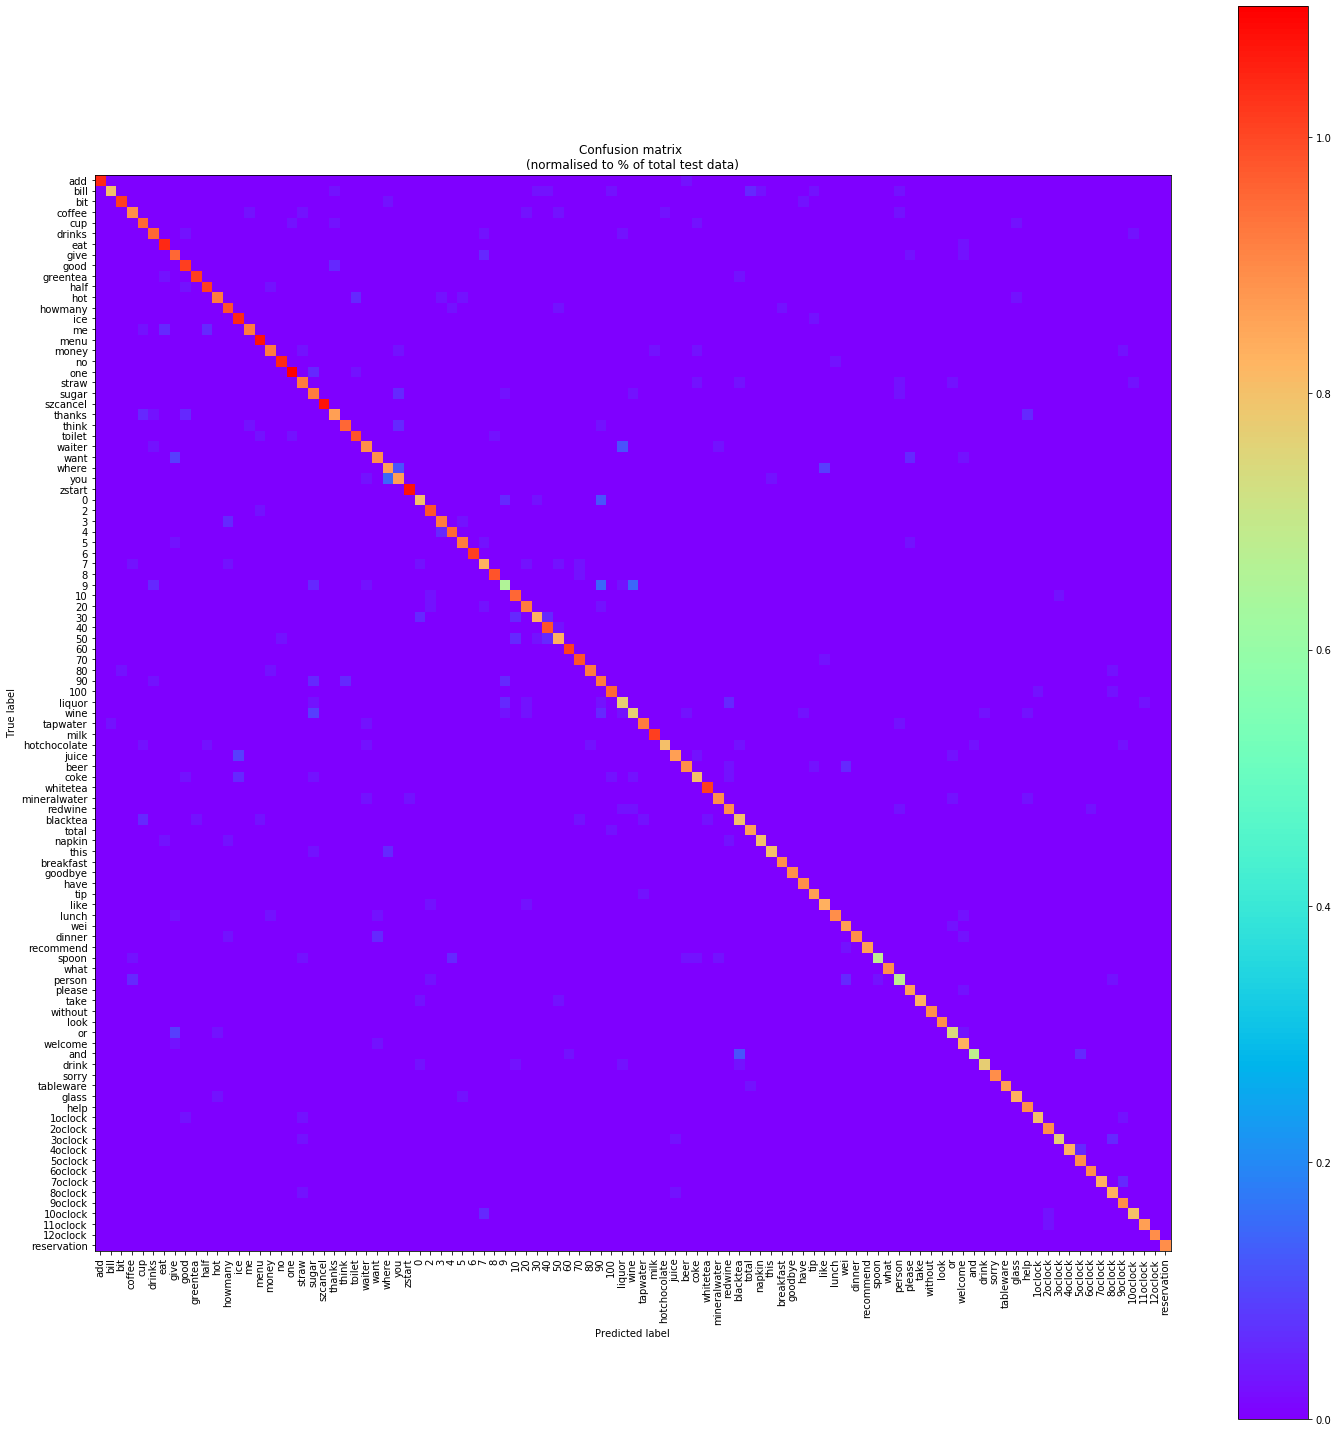

In [8]:
# Results

predictions = one_hot_predictions.argmax(1)

print("Testing Accuracy: {}%".format(100*accuracy))

print("")
print("Precision: {}%".format(100*metrics.precision_score(y_test, predictions, average="weighted")))
print("Recall: {}%".format(100*metrics.recall_score(y_test, predictions, average="weighted")))
print("f1_score: {}%".format(100*metrics.f1_score(y_test, predictions, average="weighted")))

print("")
print("Confusion Matrix:")
confusion_matrix = metrics.confusion_matrix(y_test, predictions)
print(confusion_matrix)
normalised_confusion_matrix = np.array(confusion_matrix, dtype=np.float32)/np.sum(confusion_matrix)*100

print("")
print("Confusion matrix (normalised to % of total test data):")
print(normalised_confusion_matrix)
print("Note: training and testing data is not equally distributed amongst classes, ")
print("so it is normal that more than a 6th of the data is correctly classifier in the last category.")

# Plot Results: 
width = 20
height = 20
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix, 
    interpolation='nearest', 
    cmap=plt.cm.rainbow
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [9]:
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

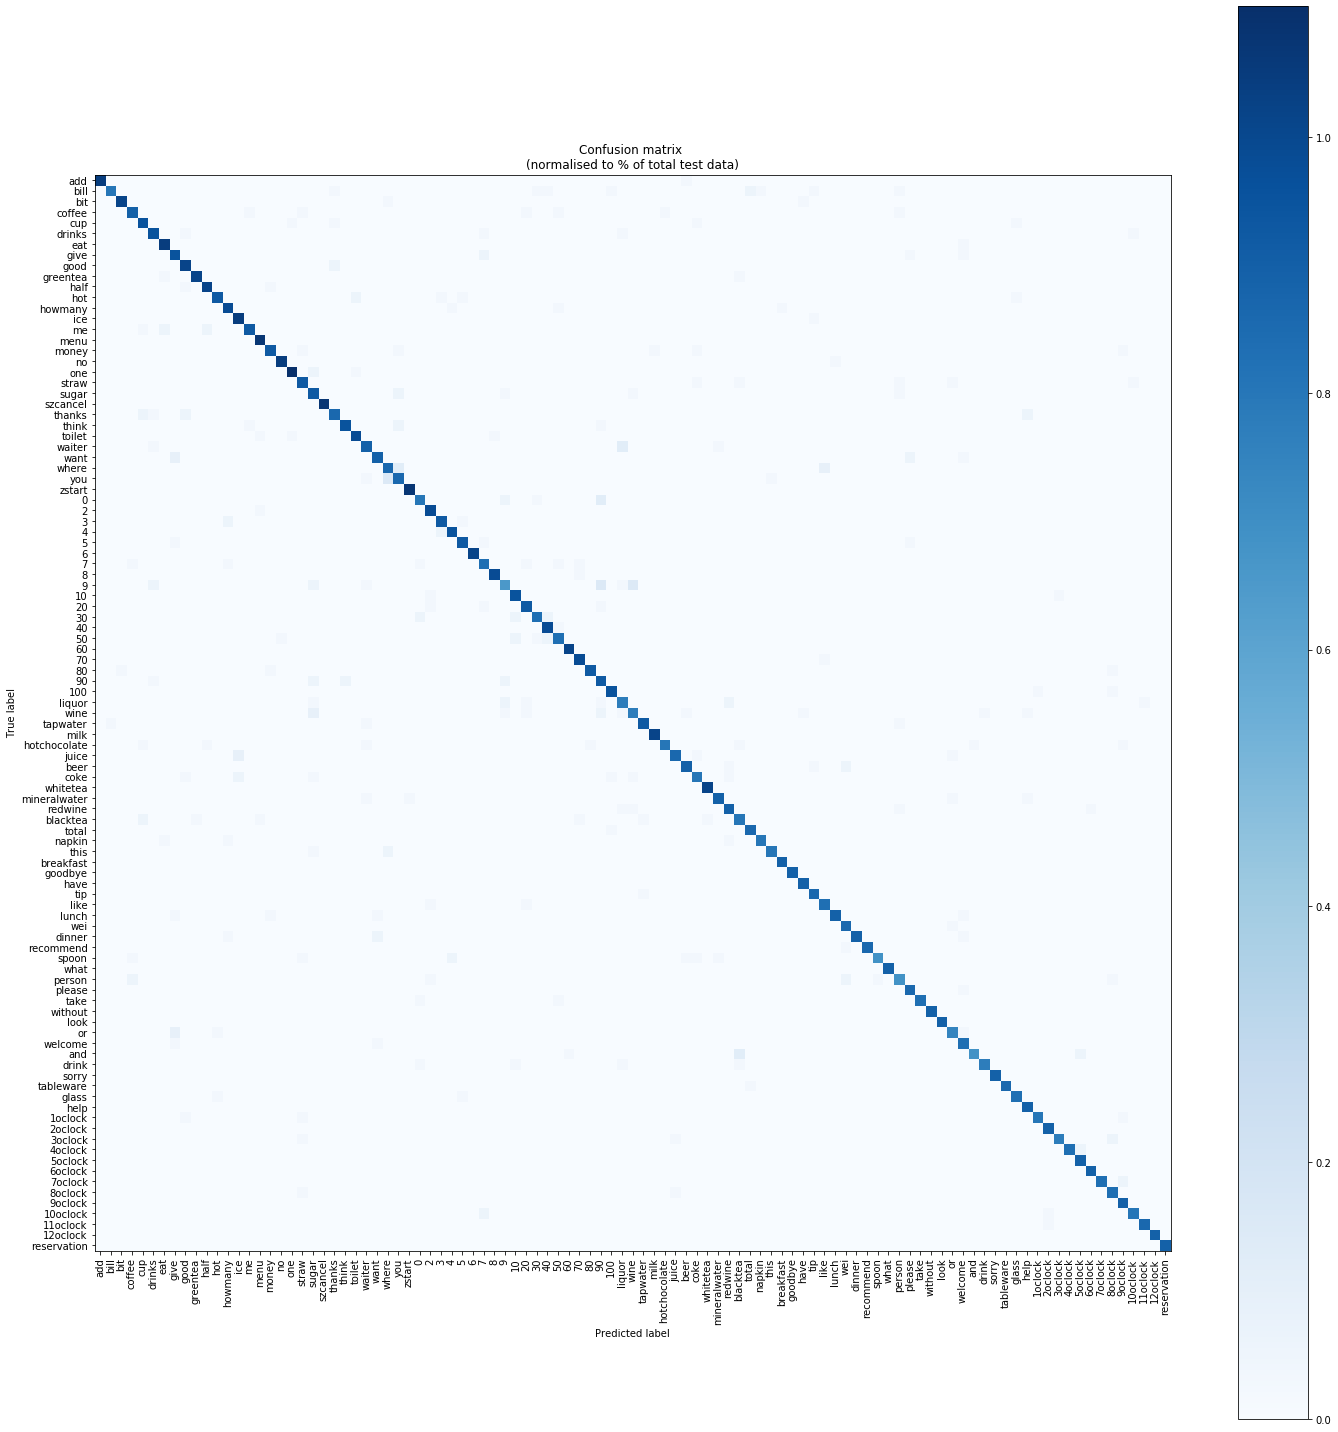

In [10]:
# Plot Results:
width = 20
height = 20
plt.figure(figsize=(width, height))
plt.imshow(
    normalised_confusion_matrix,
    interpolation='nearest',
    cmap=plt.cm.Blues
)
plt.title("Confusion matrix \n(normalised to % of total test data)")
plt.colorbar()
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks, LABELS, rotation=90)
plt.yticks(tick_marks, LABELS)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

model_path = "log_1_2_3/123model.ckpt"
saver=tf.train.Saver()
tf.add_to_collection('pred_network', pred)
saver.save(sess, model_path)

sess.close()

In [11]:
#sess.close()